#### Como primer paso deberiamos de Descargar las librerias necesarias con las cuales vamos a trabajar para ello lo mas rapido y eficiente seria descargar las librerias desde la consola directamente

In [2]:
print("Librerías instaladas correctamente.\n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns
import unicodedata
from fuzzywuzzy import process
import re
from adjustText import adjust_text
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Librerías instaladas correctamente.



##### Procedemos con el Analisis Descriptivo de Ventas 

Iniciando el procesamiento de datos ventas para el modelo 2025...

Archivo 'Ventas_Sucursal_2025.csv' cargado exitosamente.
Número de registros de ventas: 48
Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.

Realizando la unión para obtener los nombres de sucursal...

✅ Unión inicial completada.

Iniciando limpieza y estandarización de nombres de sucursales...
- Se eliminaron 1 filas sin nombre de sucursal.
- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.
- Consolidando datos de ventas para sucursales unificadas...

INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025

--- Análisis Descriptivo de 'total_monto_trx' ---
Count: 42
Mean: $10,256,458,551
Std: $6,026,571,186
Min: $3,564,518,567
25%: $6,444,581,472
50% (Median): $8,340,195,146
75%: $12,723,429,656
Max: $29,493,062,872

Top 5 Sucursales por total_monto_trx:
                         Tienda  total_monto_trx  total_transacciones
18                Marina Arauco  $29,493,062,872               526106

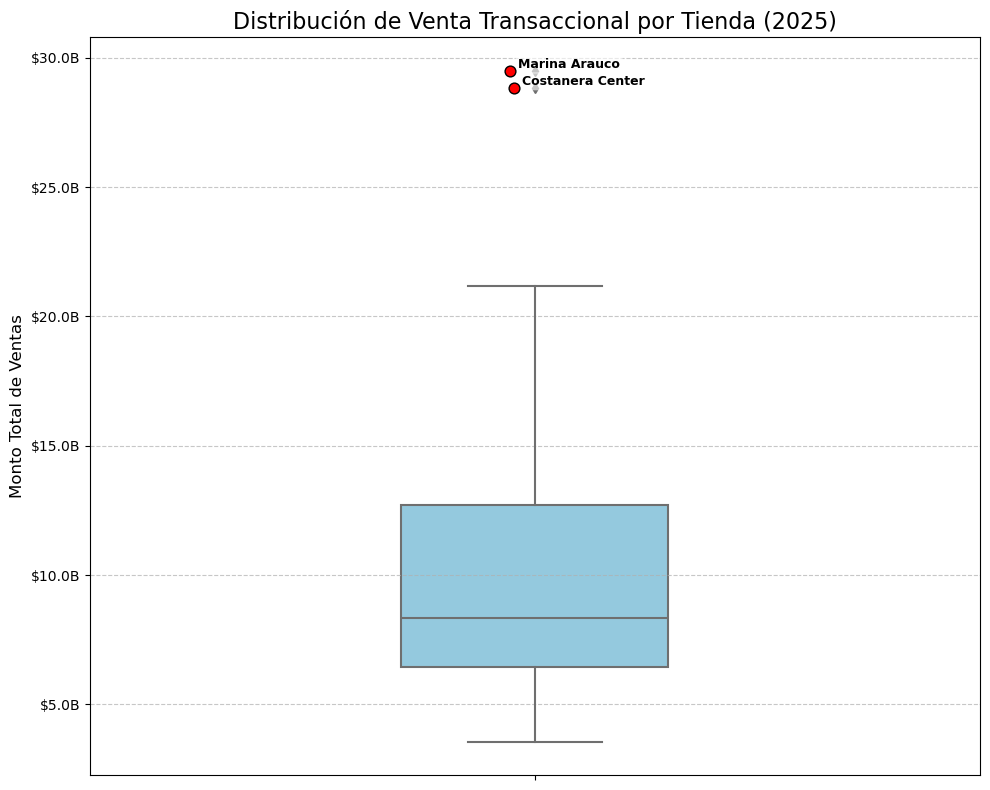

In [3]:
print("Iniciando el procesamiento de datos ventas para el modelo 2025...")

try:
    Ventas_2025 = pd.read_csv("Ventas_Sucursal_2025.csv")
    print("\nArchivo 'Ventas_Sucursal_2025.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Ventas_2025)}")

    Detalle_sucursales = pd.read_excel("Detalle sucursales (1).xlsx")
    print("Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.")

    columna_id_ventas = 'sucursal'
    columna_id_detalle = 'Nº Suc.'
    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Ventas_sucusal_2025 = pd.merge(
        left=Ventas_2025,
        right=Detalle_sucursales,
        left_on=columna_id_ventas,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes = Ventas_sucusal_2025['Tienda'].isnull().sum()
    if filas_nulas_antes > 0:
        Ventas_sucusal_2025.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes} filas sin nombre de sucursal.")

    # 2. Unificar los Outlets con sus sucursales principales
    mapeo_outlets = {
        'Outlet La Serena': 'La Serena',
        'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente',
        'Outlet Iquique': 'Iquique',
        'Outlet Parque Arauco': 'Parque Arauco'
    }

    # Usamos el método .replace() para aplicar el mapeo
    Ventas_sucusal_2025['Tienda'] = Ventas_sucusal_2025['Tienda'].replace(mapeo_outlets)
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")
    
    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    columnas_a_sumar = ['total_monto_trx', 'total_transacciones']
    
    Ventas_sucusal_2025 = Ventas_sucusal_2025.groupby('Tienda')[columnas_a_sumar].sum().reset_index()




except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar = 'total_monto_trx'
    columna_sucursal = 'Tienda'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    desc_ventas = Ventas_sucusal_2025[variable_a_analizar].describe()
    print(f"Count: {desc_ventas['count']:.0f}")
    print(f"Mean: ${desc_ventas['mean']:,.0f}")
    print(f"Std: ${desc_ventas['std']:,.0f}")
    print(f"Min: ${desc_ventas['min']:,.0f}")
    print(f"25%: ${desc_ventas['25%']:,.0f}")
    print(f"50% (Median): ${desc_ventas['50%']:,.0f}")
    print(f"75%: ${desc_ventas['75%']:,.0f}")
    print(f"Max: ${desc_ventas['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Ventas_sucusal_2025.nlargest(5, variable_a_analizar)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Ventas_sucusal_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1_ventas = desc_ventas['25%']
    Q3_ventas = desc_ventas['75%']
    IQR_ventas = Q3_ventas - Q1_ventas
    lower_ventas = Q1_ventas - 1.5 * IQR_ventas
    upper_ventas = Q3_ventas + 1.5 * IQR_ventas
    outliers_ventas = Ventas_sucusal_2025[(Ventas_sucusal_2025[variable_a_analizar] < lower_ventas) | (Ventas_sucusal_2025[variable_a_analizar] > upper_ventas)]

    print(f"  Q1: ${Q1_ventas:,.2f}")
    print(f"  Q3: ${Q3_ventas:,.2f}")
    print(f"  IQR: ${IQR_ventas:,.2f}")
    print(f"  Límite Inferior: ${lower_ventas:,.2f}")
    print(f"  Límite Superior: ${upper_ventas:,.2f}")

    if not outliers_ventas.empty:
        print(f"  Outliers detectados ({len(outliers_ventas)}):")
        print(format_numeric_columns_for_display_ventas(outliers_ventas))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Ventas_sucusal_2025[variable_a_analizar], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones 
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de Venta Transaccional por Tienda (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    try:
        if not outliers_ventas.empty:
            y_vals = outliers_ventas[variable_a_analizar].values
            x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
            ax.scatter(x_jitter, y_vals, color='red', zorder=5, s=60, edgecolor='black')
            for xi, yi, lbl in zip(x_jitter, y_vals, outliers_ventas.get('Tienda', outliers_ventas.index).astype(str)):
                ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                            fontsize=9, weight='bold', color='black', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))
    except NameError:
        pass
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")


##### Procedemos con cargar los las ventas Retail de 2025

In [4]:
print("Cargamos las ventas retail para analisis del modelo 2025...")

try:
    Venta_Retail_2025 = pd.read_csv("_select_gcspd_cod_suc_sum_gcspd_vta_tot_gcspd_fin_tot_as_venta_r_202509231718.csv")
    print("\nArchivo 'Venta_Retail_2025.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Venta_Retail_2025)}")

    Detalle_sucursales = pd.read_excel("Detalle sucursales (1).xlsx")
    print("Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.")

    print(f"\nLimpiando la columna Sucursal para extraer el ID correcto...")
    Venta_Retail_2025['gcspd_cod_suc'] = Venta_Retail_2025["gcspd_cod_suc"].astype(str).str.replace('^100', '', regex=True)
    Venta_Retail_2025['gcspd_cod_suc'] = pd.to_numeric(Venta_Retail_2025['gcspd_cod_suc'], errors='coerce')
    Venta_Retail_2025.dropna(subset=['gcspd_cod_suc'], inplace=True)
    Venta_Retail_2025['gcspd_cod_suc'] = Venta_Retail_2025['gcspd_cod_suc'].astype(int)
    print("Limpieza de IDs completada.")

    columna_id_ventas_retail = 'gcspd_cod_suc'
    columna_id_detalle = 'Nº Suc.'
    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Venta_Retail_2025 = pd.merge(
        left=Venta_Retail_2025,
        right=Detalle_sucursales,
        left_on=columna_id_ventas_retail,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes_retail = Venta_Retail_2025['Tienda'].isnull().sum()
    if filas_nulas_antes_retail > 0:
        Venta_Retail_2025.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes_retail} filas sin nombre de sucursal.")

    # 2. Unificar los Outlets con sus sucursales principales
    mapeo_outlets = {
        'Outlet La Serena': 'La Serena',
        'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente',
        'Outlet Iquique': 'Iquique',
        'Outlet Parque Arauco': 'Parque Arauco'
    }

    # Usamos el método .replace() para aplicar el mapeo
    Venta_Retail_2025['Tienda'] = Venta_Retail_2025['Tienda'].replace(mapeo_outlets)
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")
    
    # --- PASO ADICIONAL Y CRÍTICO: CONSOLIDACIÓN DE DATOS ---

    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    # Identificar columnas numéricas para sumar (excluyendo IDs)
    columnas_a_sumar_retaul = ['venta_retail'] 
    
    Venta_Retail_2025 = Venta_Retail_2025.groupby('Tienda')[columnas_a_sumar_retaul].sum().reset_index()




except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

Cargamos las ventas retail para analisis del modelo 2025...

Archivo 'Venta_Retail_2025.csv' cargado exitosamente.
Número de registros de ventas: 59
Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.

Limpiando la columna Sucursal para extraer el ID correcto...
Limpieza de IDs completada.

Realizando la unión para obtener los nombres de sucursal...

✅ Unión inicial completada.

Iniciando limpieza y estandarización de nombres de sucursales...
- Se eliminaron 12 filas sin nombre de sucursal.
- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.
- Consolidando datos de ventas para sucursales unificadas...


##### Procedemos con el Analisis Descriptivo de Notas de Credito 

Iniciando el procesamiento de datos Notas de Credito para el modelo 2025...

Archivo 'Notas_Credito__Sucursal_2025.csv' cargado exitosamente.
Número de registros de ventas: 48

Realizando la unión para obtener los nombres de sucursal...

✅ Unión inicial completada.

Iniciando limpieza y estandarización de nombres de sucursales...
- Se eliminaron 2 filas sin nombre de sucursal.
- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.
- Consolidando datos de ventas para sucursales unificadas...

INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025

--- Análisis Descriptivo de 'total_monto_trx' ---
Count: 42
Mean: $316,677,118
Std: $186,082,865
Min: $64,929,345
25%: $178,664,181
50% (Median): $261,494,068
75%: $427,148,816
Max: $825,562,038

Top 5 Sucursales por total_monto_trx:
              Tienda total_monto_trx  total_transacciones
6   Costanera Center    $825,562,038                14584
19     Parque Arauco    $780,554,108                12734
18     Marina Arauco 

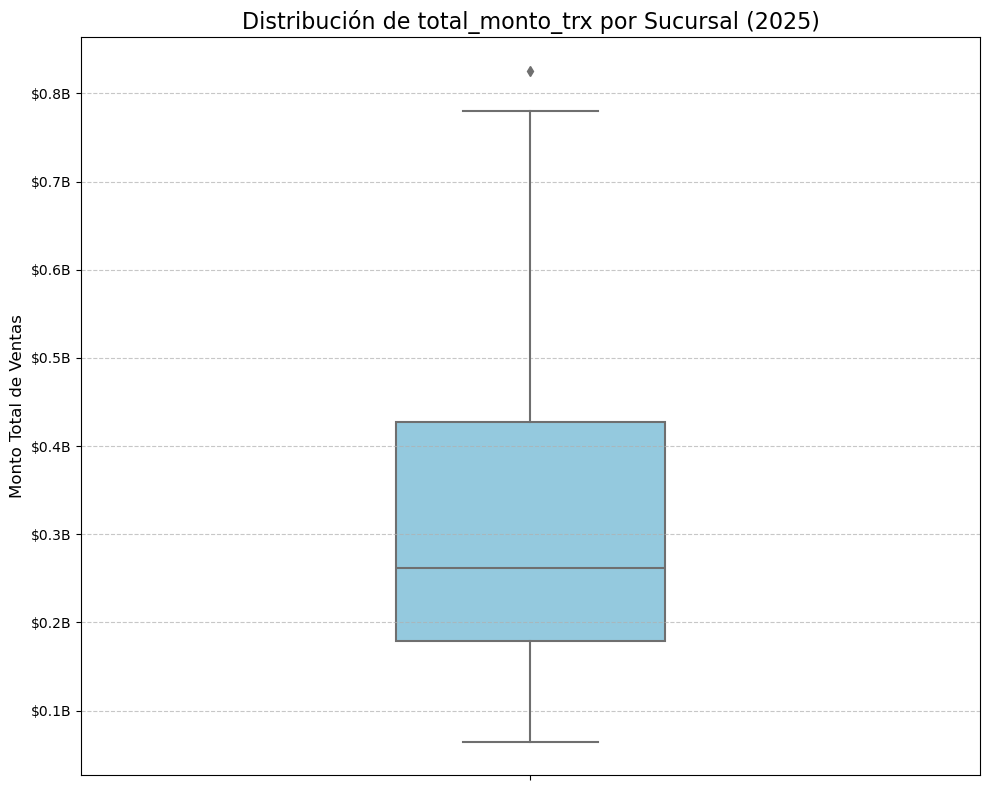

In [5]:
print("Iniciando el procesamiento de datos Notas de Credito para el modelo 2025...")

try:
    Notas_Credito_2025 = pd.read_csv("Notas_Credito__Sucursal_2025.csv")
    print("\nArchivo 'Notas_Credito__Sucursal_2025.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Notas_Credito_2025)}")

    columna_id_NC = 'sucursal'    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Notas_Credito_Sucursal_2025 = pd.merge(
        left=Notas_Credito_2025,
        right=Detalle_sucursales,
        left_on=columna_id_NC,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes_NC = Notas_Credito_Sucursal_2025['Tienda'].isnull().sum()
    if filas_nulas_antes_NC > 0:
        Notas_Credito_Sucursal_2025.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes_NC} filas sin nombre de sucursal.")

    Notas_Credito_Sucursal_2025['Tienda'] = Notas_Credito_Sucursal_2025['Tienda'].replace(mapeo_outlets)
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")
    
    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    columnas_a_sumar = ['total_monto_trx', 'total_transacciones'] 
    
    Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.groupby('Tienda')[columnas_a_sumar].sum().reset_index()




except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar = 'total_monto_trx'
    columna_sucursal = 'Tienda'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    desc_NC = Notas_Credito_Sucursal_2025[variable_a_analizar].describe()
    print(f"Count: {desc_NC['count']:.0f}")
    print(f"Mean: ${desc_NC['mean']:,.0f}")
    print(f"Std: ${desc_NC['std']:,.0f}")
    print(f"Min: ${desc_NC['min']:,.0f}")
    print(f"25%: ${desc_NC['25%']:,.0f}")
    print(f"50% (Median): ${desc_NC['50%']:,.0f}")
    print(f"75%: ${desc_NC['75%']:,.0f}")
    print(f"Max: ${desc_NC['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Sucursal_2025.nlargest(5, variable_a_analizar)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Sucursal_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1_NC = desc_NC['25%']
    Q3_NC = desc_NC['75%']
    IQR_NC = Q3_NC - Q1_NC
    lower_NC = Q1_NC - 1.5 * IQR_NC
    upper_NC = Q3_NC + 1.5 * IQR_NC
    outliers_NC = Notas_Credito_Sucursal_2025[(Notas_Credito_Sucursal_2025[variable_a_analizar] < lower_NC) | (Notas_Credito_Sucursal_2025[variable_a_analizar] > upper_NC)]

    print(f"  Q1: ${Q1_NC:,.2f}")
    print(f"  Q3: ${Q3_NC:,.2f}")
    print(f"  IQR: ${IQR_NC:,.2f}")
    print(f"  Límite Inferior: ${lower_NC:,.2f}")
    print(f"  Límite Superior: ${upper_NC:,.2f}")

    if not outliers_NC.empty:
        print(f"  Outliers detectados ({len(outliers_NC)}):")
        print(format_numeric_columns_for_display_ventas(outliers_NC))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y = Notas_Credito_Sucursal_2025[variable_a_analizar], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones 
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")


##### Procedemos con el Analisis Descriptivo de Reclamos

In [6]:
# --- Cargamos los datos de Reclamos que nos entregaron que contienen los tickets de Reclamos de 2024 y 2025 ---

Reclamos_Tienda = pd.read_excel("Reclamos-Mala-Atencion-Tienda-2024-2025 (original).xlsx")
print(f"Archivo de reclamos cargado con {len(Reclamos_Tienda)} registros totales.")

# --- Realizamos un filtro para solo quedarnos con el año 2025 y eliminar los valores nulos para comenzar con los Match ---

Reclamos_2025 = Reclamos_Tienda[Reclamos_Tienda['Año'] == 2025].copy()
Reclamos_2025 = Reclamos_2025.dropna(subset=["Tienda"]).reset_index(drop=True)
print(f"Se filtraron {len(Reclamos_2025)} reclamos correspondientes al año 2025.")

# --- Agrupamos los Tickets Reclamos por sucursal para conseguir los Reclamos por Sucursal del año 2025 ---

Reclamos_Sucursal_2025 = Reclamos_2025.groupby('Tienda').agg(
    Reclamos_Cantidad_2025=('Ticket', 'count')
    ).reset_index()
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
print(f"Se agruparon los reclamos para {len(Reclamos_Sucursal_2025)} sucursales con registros.")

# =========================
# 🔤 Aplicamos una FUNCIÓN PARA NORMALIZAR el nombre de sucursales (Solo eliminamos los tildes) para un mejor trabajo
# =========================
def eliminar_tildes(texto):
    texto = str(texto)
    return ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    ).strip()

# =========================
# 🔍 CREAR DICCIONARIO DE NOMBRES OFICIALES NORMALIZADOS y utilizamos la funcion para encontrar el mejor Macth combinado con el excel Detalle Sucursal (1) que tiene los nombres oficiales
# =========================
nombres_oficiales = Detalle_sucursales["Tienda"].dropna().unique().tolist()
nombres_oficiales_normalizados = {
    eliminar_tildes(nombre): nombre for nombre in nombres_oficiales
}

def encontrar_nombre_oficial_mejorado(nombre_original, lista_dict, umbral=85):
    nombre_norm = eliminar_tildes(nombre_original)
    mejor_match, score = process.extractOne(nombre_norm, list(lista_dict.keys()))
    if score >= umbral:
        return lista_dict[mejor_match]
    else:
        return None
# 🔍 Aplicamos la Funcion para encontrar el mejor Macth posible para tener un listado de Nombres Sucursales lo mas similar posible
Reclamos_Sucursal_2025["Nombre_Oficial_Match"] = Reclamos_Sucursal_2025["Nombre_Sucursal"].apply(
    lambda x: encontrar_nombre_oficial_mejorado(x, nombres_oficiales_normalizados)
)

# 🔍 Debemos realizar algunas correcciones de forma manual dado que algunos nombres son dificiles de encontrar el Match correspondiente y las aplicamos


Archivo de reclamos cargado con 1670 registros totales.
Se filtraron 470 reclamos correspondientes al año 2025.
Se agruparon los reclamos para 46 sucursales con registros.



INICIANDO PROCESAMIENTO DE DATOS DE RECLAMOS 2025
Archivo de reclamos cargado con 1670 registros totales.
Se filtraron 470 reclamos correspondientes al año 2025.
Se agruparon los reclamos para 46 sucursales con registros.

INICIANDO ANÁLISIS DESCRIPTIVO DE RECLAMOS 2025

--- Análisis Descriptivo de 'Reclamos_Cantidad_2025' ---
Count: 42
Mean: 10.98
Std: 10.41
Min: 1
25%: 4
50% (Median): 8
75%: 14
Max: 42

Top 5 Sucursales por Reclamos_Cantidad_2025:
   Nombre_Oficial_Match Reclamos_Cantidad_2025
39           Valparaíso                     42
40        Vivo Rancagua                     40
26          Plaza Oeste                     37
19        Parque Arauco                     30
36                Talca                     21

Bottom 5 Sucursales por Reclamos_Cantidad_2025:
   Nombre_Oficial_Match Reclamos_Cantidad_2025
14            Los Andes                      1
21         Plaza Calama                      1
33         Punta Arenas                      1
3             Castellón   

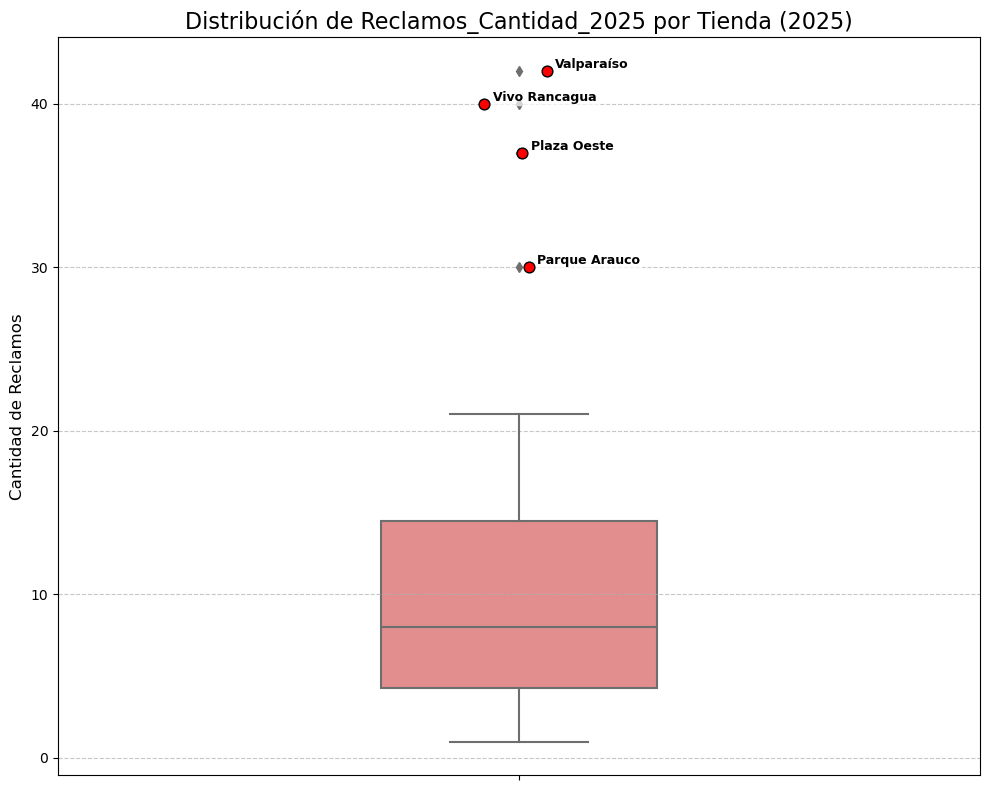

In [7]:
# --- PROCESAMIENTO DE DATOS DE RECLAMOS 2025 ---

print("\n" + "="*80)
print("INICIANDO PROCESAMIENTO DE DATOS DE RECLAMOS 2025")
print("="*80)

# --- Cargamos los datos de Reclamos que nos entregaron que contienen los tickets de Reclamos de 2024 y 2025 ---

Reclamos_Tienda = pd.read_excel("Reclamos-Mala-Atencion-Tienda-2024-2025 (original).xlsx")
print(f"Archivo de reclamos cargado con {len(Reclamos_Tienda)} registros totales.")

# --- Realizamos un filtro para solo quedarnos con el año 2025 y eliminar los valores nulos para comenzar con los Match ---

Reclamos_2025 = Reclamos_Tienda[Reclamos_Tienda['Año'] == 2025].copy()
Reclamos_2025 = Reclamos_2025.dropna(subset=["Tienda"]).reset_index(drop=True)
print(f"Se filtraron {len(Reclamos_2025)} reclamos correspondientes al año 2025.")

# --- Agrupamos los Tickets Reclamos por sucursal para conseguir los Reclamos por Sucursal del año 2025 ---

Reclamos_Sucursal_2025 = Reclamos_2025.groupby('Tienda').agg(
    Reclamos_Cantidad_2025=('Ticket', 'count')
    ).reset_index()
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
print(f"Se agruparon los reclamos para {len(Reclamos_Sucursal_2025)} sucursales con registros.")

# =========================
# 🔤 Aplicamos una FUNCIÓN PARA NORMALIZAR el nombre de sucursales (Solo eliminamos los tildes) para un mejor trabajo
# =========================
def eliminar_tildes(texto):
    texto = str(texto)
    return ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    ).strip()

# =========================
# 🔍 CREAR DICCIONARIO DE NOMBRES OFICIALES NORMALIZADOS y utilizamos la funcion para encontrar el mejor Macth combinado con el excel Detalle Sucursal (1) que tiene los nombres oficiales
# =========================
nombres_oficiales = Detalle_sucursales["Tienda"].dropna().unique().tolist()
nombres_oficiales_normalizados = {
    eliminar_tildes(nombre): nombre for nombre in nombres_oficiales
}

def encontrar_nombre_oficial_mejorado(nombre_original, lista_dict, umbral=85):
    nombre_norm = eliminar_tildes(nombre_original)
    mejor_match, score = process.extractOne(nombre_norm, list(lista_dict.keys()))
    if score >= umbral:
        return lista_dict[mejor_match]
    else:
        return None
# 🔍 Aplicamos la Funcion para encontrar el mejor Macth posible para tener un listado de Nombres Sucursales lo mas similar posible
Reclamos_Sucursal_2025["Nombre_Oficial_Match"] = Reclamos_Sucursal_2025["Nombre_Sucursal"].apply(
    lambda x: encontrar_nombre_oficial_mejorado(x, nombres_oficiales_normalizados)
)

# 🔍 Debemos realizar algunas correcciones de forma manual dado que algunos nombres son dificiles de encontrar el Match correspondiente y las aplicamos

correcciones_manuales = {
    "Concepcion 2": "Castellón",
    "Huechuraba": "Plaza Norte",
    "Puerto Montt Costanera": "Costanera Pto Montt",
    "San Bernardo": "Plaza Sur",
}

Reclamos_Sucursal_2025["Nombre_Oficial_Match"] = Reclamos_Sucursal_2025.apply(
    lambda row: correcciones_manuales.get(row["Nombre_Sucursal"], row["Nombre_Oficial_Match"]),
    axis=1
)
# Eliminamos los Valores nulos (dado que corresponde a sucursal Alto Las Condes) y Concepcion 1 que corresponde a sucursal Barros Arana
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025[Reclamos_Sucursal_2025["Nombre_Oficial_Match"].notnull()].copy()
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025[Reclamos_Sucursal_2025["Nombre_Sucursal"] != "Concepcion 1"]

# =========================
# 📊 AGRUPAR RECLAMOS POR SUCURSAL OFICIAL para eliminar problema de repeticion de Sucursales Valparaíso y Puerto Montt
# =========================
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.groupby("Nombre_Oficial_Match", as_index=False).agg({
    "Reclamos_Cantidad_2025": "sum"
})

Reclamos_Sucursal_2025.drop_duplicates(subset=['Nombre_Oficial_Match'], inplace=True)

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE RECLAMOS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_reclamos = 'Reclamos_Cantidad_2025'
    columna_sucursal_match = 'Nombre_Oficial_Match'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_reclamos(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_reclamos in df_formatted.columns:
            df_formatted[variable_reclamos] = df_formatted[variable_reclamos].apply(lambda x: f"{x:,}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_reclamos}' ---")
    desc_reclamos = Reclamos_Sucursal_2025[variable_reclamos].describe()
    print(f"Count: {desc_reclamos['count']:.0f}")
    print(f"Mean: {desc_reclamos['mean']:,.2f}")
    print(f"Std: {desc_reclamos['std']:,.2f}")
    print(f"Min: {desc_reclamos['min']:,.0f}")
    print(f"25%: {desc_reclamos['25%']:,.0f}")
    print(f"50% (Median): {desc_reclamos['50%']:,.0f}")
    print(f"75%: {desc_reclamos['75%']:,.0f}")
    print(f"Max: {desc_reclamos['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_reclamos}:")
    print(format_numeric_columns_for_display_reclamos(Reclamos_Sucursal_2025.nlargest(5, variable_reclamos)))

    print(f"\nBottom 5 Sucursales por {variable_reclamos}:")
    print(format_numeric_columns_for_display_reclamos(Reclamos_Sucursal_2025.nsmallest(5, variable_reclamos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_reclamos}) ---")
    Q1_reclamos = desc_reclamos['25%']
    Q3_reclamos = desc_reclamos['75%']
    IQR_reclamos = Q3_reclamos - Q1_reclamos
    lower_bound_reclamos = Q1_reclamos - 1.5 * IQR_reclamos
    upper_bound_reclamos = Q3_reclamos + 1.5 * IQR_reclamos
    outliers_reclamos = Reclamos_Sucursal_2025[
        (Reclamos_Sucursal_2025[variable_reclamos] < lower_bound_reclamos) |
        (Reclamos_Sucursal_2025[variable_reclamos] > upper_bound_reclamos)
    ]

    print(f"  Q1: {Q1_reclamos:,.2f}")
    print(f"  Q3: {Q3_reclamos:,.2f}")
    print(f"  IQR: {IQR_reclamos:,.2f}")
    print(f"  Límite Inferior: {lower_bound_reclamos:,.2f}")
    print(f"  Límite Superior: {upper_bound_reclamos:,.2f}")

    if not outliers_reclamos.empty:
        print(f"  Outliers detectados ({len(outliers_reclamos)}):")
        print(format_numeric_columns_for_display_reclamos(outliers_reclamos))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Reclamos_Sucursal_2025[variable_reclamos], color='lightcoral', width=0.3, ax=ax)

    ax.set_title(f'Distribución de {variable_reclamos} por Tienda (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Reclamos', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if not outliers_reclamos.empty:
        y_vals = outliers_reclamos[variable_reclamos].values
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
        ax.scatter(x_jitter, y_vals, color='red', zorder=5, s=60, edgecolor='black')
        for xi, yi, lbl in zip(x_jitter, y_vals, outliers_reclamos[columna_sucursal_match].astype(str)):
            ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                        fontsize=9, weight='bold', color='black',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Reclamos_Sucursal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")





##### Vamos con el analisis descriptivo de Merma de Inventario


INICIANDO PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025
El archivo contiene 42 registros para las 42 sucursales.
Se seleccionaron y renombraron las columnas de interés.

PROCESO COMPLETADO
El DataFrame final de Merma de Inventario contiene 42 sucursales.

--- Vista Previa del Resultado Final (Merma de Inventario 2025) ---
  Nombre_Sucursal  Desviacion_Meta_Merma
0     Antofagasta                 0.0037
1    Arauco Maipú                -0.0001
2           Arica                 0.0007
3       Castellón                -0.0031
4         Chillán                 0.0006

--- Sucursales con Peor Desempeño (Mayor Desviación Negativa) ---
Nombre_Sucursal  Desviacion_Meta_Merma
 Plaza Vespucio                -0.0055
  Plaza Alameda                -0.0055
    Plaza Norte                -0.0052
    Plaza Egaña                -0.0042
      Castellón                -0.0031

INICIANDO ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma'

--- Análisis Descriptivo de 'Desviacion_Meta_Merma' ---
Count: 

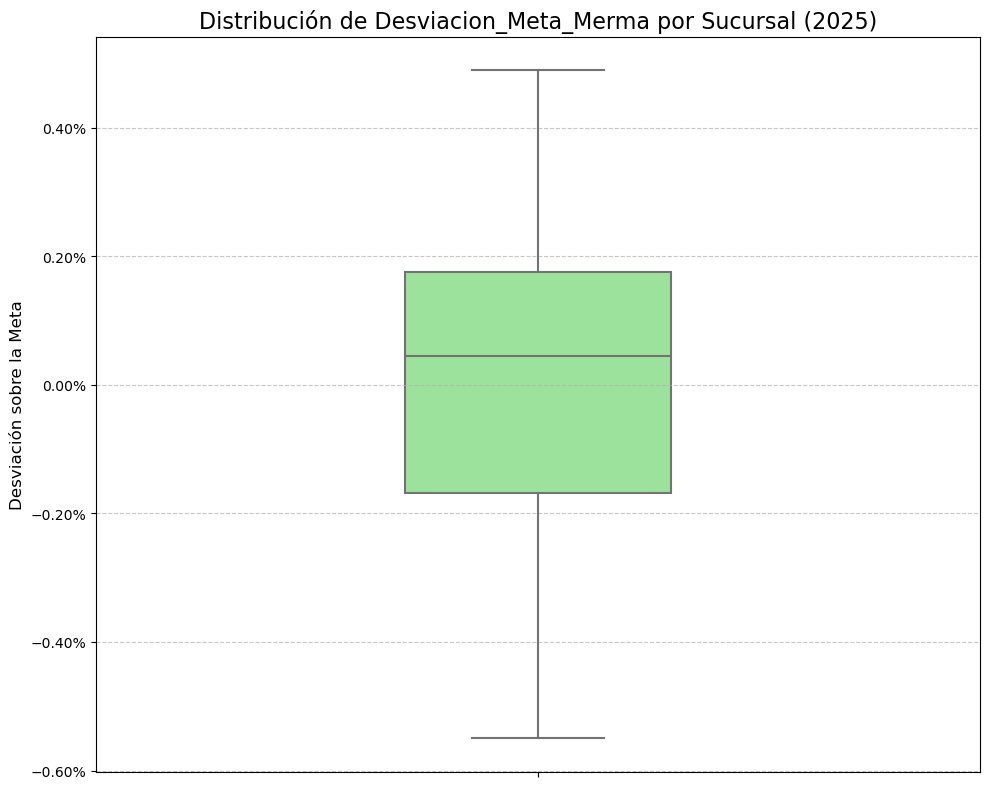

In [8]:
# --- PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025 (VERSIÓN CORREGIDA) ---

print("\n" + "="*80)
print("INICIANDO PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025")
print("="*80)

try:

    Merma_inventario_2025  = pd.read_excel("Indice_Meta_Merma_Inventario_2024.xlsx", sheet_name="2025")
    Merma_inventario_2025 = Merma_inventario_2025.dropna(subset=['Desviacion_Meta_Merma'])
    print(f"El archivo contiene {len(Merma_inventario_2025)} registros para las 42 sucursales.")

    # --- 2. Seleccionar y Renombrar las Columnas Clave ---
    # Nos quedamos solo con las columnas que necesitamos para el modelo.
    # La variable clave es 'Desviacion_Meta_Merma'.
    Desviacion_Meta_Merma_2025 = Merma_inventario_2025[['Tienda', 'Desviacion_Meta_Merma']].copy()
    
    # Renombramos la columna 'Tienda' para que sea consistente con los otros DataFrames
    Desviacion_Meta_Merma_2025 = Desviacion_Meta_Merma_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
    print("Se seleccionaron y renombraron las columnas de interés.")

    # --- Verificación Final ---
    print("\n" + "="*80)
    print("PROCESO COMPLETADO")
    print("="*80)
    print(f"El DataFrame final de Merma de Inventario contiene {len(Desviacion_Meta_Merma_2025)} sucursales.")
    print("\n--- Vista Previa del Resultado Final (Merma de Inventario 2025) ---")
    print(Desviacion_Meta_Merma_2025.head().to_string())
    print("\n--- Sucursales con Peor Desempeño (Mayor Desviación Negativa) ---")
    print(Desviacion_Meta_Merma_2025.nsmallest(5, 'Desviacion_Meta_Merma').to_string(index=False))

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Merma_inventario_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except ValueError as e:
    # Este error ocurre si la hoja "2025" no existe en el archivo
    print(f"\n❌ ERROR: {e}")
    print(f"Asegúrate de que el archivo de Excel contenga una hoja llamada exactamente '2025'.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'Desviacion_Meta_Merma')")
    print("coincidan exactamente con los de tu archivo de Excel.")

# --- ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma' ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma'")
print("="*80)

try:
    # La variable que vamos a analizar
    variable_a_analizar = 'Desviacion_Meta_Merma'
    
    # --- Formato para visualización ---
    def format_as_percentage(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:.2%}")
        return df_formatted

    # --- Estadísticas descriptivas ---
    # Usamos el DataFrame 'Desviacion_Meta_Merma_2025' que creaste
    desc_merma = Desviacion_Meta_Merma_2025[variable_a_analizar].describe()
    
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    print(f"Count: {desc_merma['count']:.0f}")
    print(f"Mean: {desc_merma['mean']:.5%}")
    print(f"Std: {desc_merma['std']:.2%}")
    print(f"Min: {desc_merma['min']:.2%}")
    print(f"25%: {desc_merma['25%']:.2%}")
    print(f"50% (Median): {desc_merma['50%']:.2%}")
    print(f"75%: {desc_merma['75%']:.2%}")
    print(f"Max: {desc_merma['max']:.2%}")

    print("\nTop 5 Sucursales (Mejor Desempeño vs Meta):")
    print(format_as_percentage(Desviacion_Meta_Merma_2025.nlargest(5, variable_a_analizar)))

    print("\nBottom 5 Sucursales (Peor Desempeño vs Meta):")
    print(format_as_percentage(Desviacion_Meta_Merma_2025.nsmallest(5, variable_a_analizar)))

    # --- Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1 = desc_merma['25%']
    Q3 = desc_merma['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Desviacion_Meta_Merma_2025[(Desviacion_Meta_Merma_2025[variable_a_analizar] < lower) | (Desviacion_Meta_Merma_2025[variable_a_analizar] > upper)]

    print(f"  Q1: {Q1:.2%}")
    print(f"  Q3: {Q3:.2%}")
    print(f"  IQR: {IQR:.2%}")
    print(f"  Límite Inferior: {lower:.2%}")
    print(f"  Límite Superior: {upper:.2%}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_as_percentage(outliers))
    else:
        print("  No se detectaron outliers.")

    # --- Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Desviacion_Meta_Merma_2025[variable_a_analizar], color='lightgreen', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Desviación sobre la Meta', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Desviacion_Meta_Merma_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga de datos de merma antes de esta celda.")




##### Procedamos con el analisis descriptivo del numero de Accidentes


INICIANDO ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' PARA 2025
Archivo '                         Tienda  N° Accidentes
0                   Antofagasta           16.0
1                  Arauco Maipú           40.0
2                         Arica            8.0
3                     Castellón            8.0
4                       Chillán           10.0
5                      Coquimbo           14.0
6              Costanera Center           25.0
7           Costanera Pto Montt           37.0
8                       Crillón           21.0
9                     El Trébol           46.0
10               Florida Center           13.0
11                      Iquique           12.0
12                    La Calera           14.0
13                    La Serena           20.0
14                    Los Andes           13.0
15                Los Dominicos            7.0
16              Mall Concepción           24.0
17                  Mall Curicó           17.0
18                Marina Arauco      

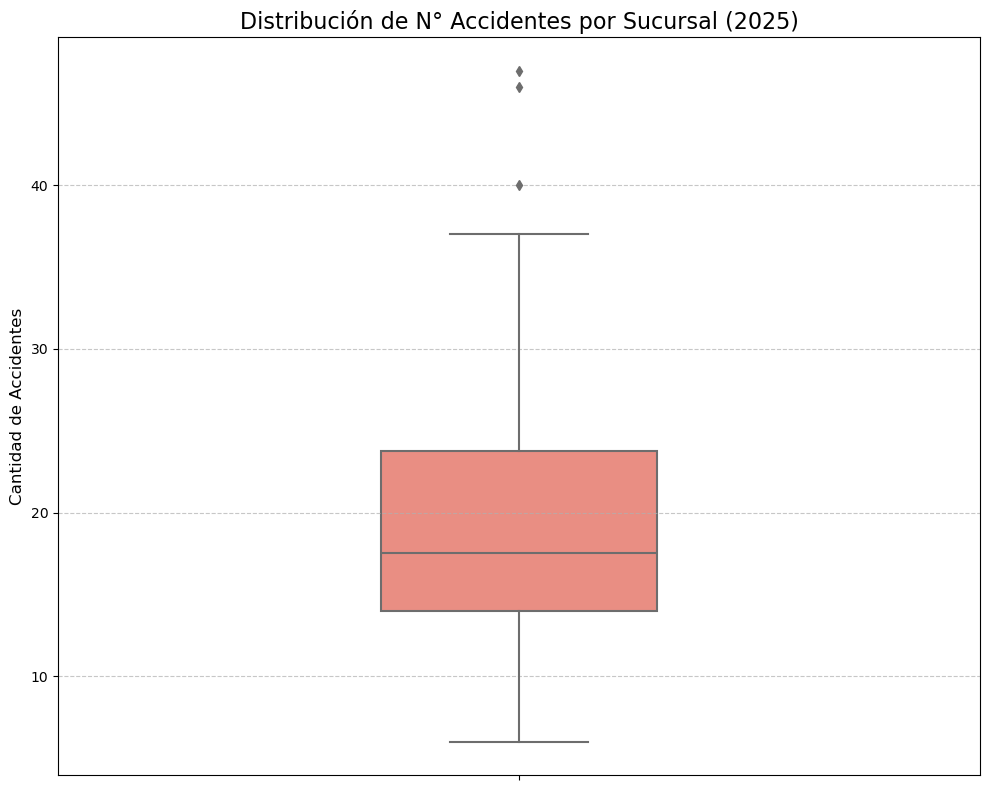

In [9]:
# --- ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' PARA 2025")
print("="*80)

try:
    Accidentes_2025 = pd.read_excel("Accidentes_Sucursal_2024.xlsx", sheet_name="2025")

    # Convertimos la columna a tipo numérico para asegurar los cálculos
    Accidentes_2025['N° Accidentes'] = pd.to_numeric(Accidentes_2025['N° Accidentes'])
    Accidentes_2025 = Accidentes_2025.dropna(subset=['N° Accidentes'])

    print(f"Archivo '{Accidentes_2025}' cargado exitosamente.")
    print(f"El archivo contiene {len(Accidentes_2025)} registros para el análisis.")
    variable_a_analizar = 'N° Accidentes'    
    # --- Formato para visualización ---
    def format_as_integer(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    desc_accidentes = Accidentes_2025[variable_a_analizar].describe()
    
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    print(f"Count: {desc_accidentes['count']:.0f}")
    print(f"Mean: {desc_accidentes['mean']:.1f}")
    print(f"Std: {desc_accidentes['std']:.1f}")
    print(f"Min: {desc_accidentes['min']:.0f}")
    print(f"25%: {desc_accidentes['25%']:.0f}")
    print(f"50% (Median): {desc_accidentes['50%']:.0f}")
    print(f"75%: {desc_accidentes['75%']:.0f}")
    print(f"Max: {desc_accidentes['max']:.0f}")

    print("\nTop 5 Sucursales (Mayor N° de Accidentes):")
    print(format_as_integer(Accidentes_2025.nlargest(5, variable_a_analizar)))

    print("\nBottom 5 Sucursales (Menor N° de Accidentes):")
    print(format_as_integer(Accidentes_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1 = desc_accidentes['25%']
    Q3 = desc_accidentes['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Accidentes_2025[(Accidentes_2025[variable_a_analizar] < lower) | (Accidentes_2025[variable_a_analizar] > upper)]

    print(f"  Q1: {Q1:.1f}")
    print(f"  Q3: {Q3:.1f}")
    print(f"  IQR: {IQR:.1f}")
    print(f"  Límite Inferior: {lower:.1f}")
    print(f"  Límite Superior: {upper:.1f}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_as_integer(outliers))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Accidentes_2025[variable_a_analizar], color='salmon', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Accidentes', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Accidentes_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'N° Accidentes')")
    print("coincidan exactamente con los de tu archivo de Excel.")


##### Realizamos el Analisis Descriptivo por Productos Dañados 


INICIANDO ANÁLISIS DE DESCUENTO POR PRODUCTOS DAÑADOS 2025
Archivo APRE 2025 cargado con 22616 registros.

Limpiando la columna 'Código Sucursal' para extraer solo el ID numérico...

Se agruparon los descuentos para 43 códigos de sucursal.
Se unificaron los nombres de tienda y se consolidaron los datos.

--- Análisis Descriptivo de 'Productos_Dañados_Descuento' ---
Count: 42
Mean: $17,157,834
Std: $17,012,211
Min: $19,990
25%: $3,090,755
50% (Median): $12,757,580
75%: $24,213,755
Max: $72,982,616

Top 5 Sucursales por Productos_Dañados_Descuento:
             Tienda  Productos_Dañados_Descuento
      Marina Arauco                     72982616
        Antofagasta                     56665208
   Costanera Center                     53786474
Costanera Pto Montt                     42253286
            Quilpué                     36586613

Bottom 5 Sucursales por Productos_Dañados_Descuento:
      Tienda  Productos_Dañados_Descuento
San Fernando                        19990
 Plaza Oeste  

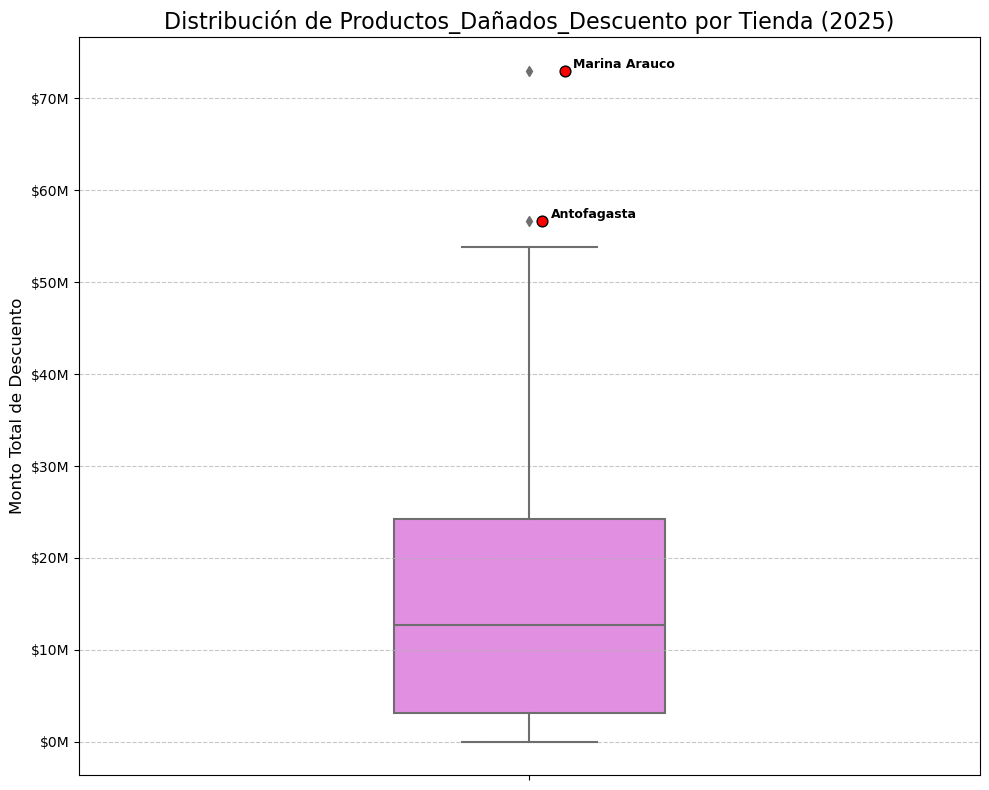

In [10]:
# --- ANÁLISIS DESCRIPTIVO DE DESCUENTO POR PRODUCTOS DAÑADOS 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE DESCUENTO POR PRODUCTOS DAÑADOS 2025")
print("="*80)
# Cargar el archivo con los datos de Productos Dañados de 2025
try:
    Productos_Dañados_2025 = pd.read_excel("APRE 2025.xlsx", sheet_name= "Reporte_Ventas (37)")
    print(f"Archivo APRE 2025 cargado con {len(Productos_Dañados_2025)} registros.")

    # --- Para esta base de datos, dado como esta escrito Codigo Sucursal debemos hacer una limpieza de la columna para obtener los nombres de las sucursales ---
    columna_codigo_sucursal = 'Código Sucursal'
    print(f"\nLimpiando la columna '{columna_codigo_sucursal}' para extraer solo el ID numérico...")
    Productos_Dañados_2025['Numero_Sucursal'] = Productos_Dañados_2025['Código Sucursal'].astype(str).str.extract(r'^(\d+)') 

    # --- Convertimos la columna que creamos a tipo numérico para asegurar los cálculos ---    
    Productos_Dañados_2025['Numero_Sucursal'] = pd.to_numeric(Productos_Dañados_2025['Numero_Sucursal'], errors='coerce')
    Productos_Dañados_2025['Numero_Sucursal'] = Productos_Dañados_2025['Numero_Sucursal'].astype(int)

    # --- Realizamos la agrupacion por sucursal para determinar la cantidad de descuento por productos dañados por Sucursal ---
    Descuento_Productos_Dañados_2025 = Productos_Dañados_2025.groupby('Numero_Sucursal').agg(
        Productos_Dañados_Descuento=('Descto', 'sum')
    ).reset_index()
    print(f"\nSe agruparon los descuentos para {len(Descuento_Productos_Dañados_2025)} códigos de sucursal.")

    # --- Realizamos la union con el excel Detalle Sucursales (1) para que nos entregue el nombre de las sucursales ---
    Descuento_Productos_Dañados_2025 = pd.merge(
    left=Descuento_Productos_Dañados_2025,
    right=Detalle_sucursales,
    left_on='Numero_Sucursal', 
    right_on='Nº Suc.',
    how='left'
    )
    # --- Realizamos una agrupacion para trabajar con las columnas necesarias ---
    Descuento_Productos_Dañados_2025 = Descuento_Productos_Dañados_2025.groupby('Tienda')['Productos_Dañados_Descuento'].sum().reset_index()
    print("Se unificaron los nombres de tienda y se consolidaron los datos.")

   # --- 5. Análisis Descriptivo ---
    Variable_Productos_Dañados_Descuento = 'Productos_Dañados_Descuento'
    columna_tienda = 'Tienda'
    
    # Estadísticas, Rankings, Outliers y Boxplot... (código de análisis descriptivo)
    desc_danados = Descuento_Productos_Dañados_2025["Productos_Dañados_Descuento"].describe()
    print(f"\n--- Análisis Descriptivo de '{Variable_Productos_Dañados_Descuento}' ---")
    print(f"Count: {desc_danados['count']:.0f}")
    print(f"Mean: ${desc_danados['mean']:,.0f}")
    print(f"Std: ${desc_danados['std']:,.0f}")
    print(f"Min: ${desc_danados['min']:,.0f}")
    print(f"25%: ${desc_danados['25%']:,.0f}")
    print(f"50% (Median): ${desc_danados['50%']:,.0f}")
    print(f"75%: ${desc_danados['75%']:,.0f}")
    print(f"Max: ${desc_danados['max']:,.0f}")
    
    print(f"\nTop 5 Sucursales por {Variable_Productos_Dañados_Descuento}:")
    print(Descuento_Productos_Dañados_2025.nlargest(5, Variable_Productos_Dañados_Descuento).to_string(index=False))
    
    print(f"\nBottom 5 Sucursales por {Variable_Productos_Dañados_Descuento}:")
    print(Descuento_Productos_Dañados_2025.nsmallest(5, Variable_Productos_Dañados_Descuento).to_string(index=False))
    
    Q1_descuento = desc_danados['25%']
    Q3_descuento = desc_danados['75%']
    IQR_descuento = Q3_descuento - Q1_descuento
    outliers_descuento = Descuento_Productos_Dañados_2025[
        (Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento] < (Q1_descuento - 1.5 * IQR_descuento)) |
        (Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento] > (Q3_descuento + 1.5 * IQR_descuento))
    ]
    print(f"\n--- Detección de Outliers ({Variable_Productos_Dañados_Descuento}) ---")
    if not outliers_descuento.empty:
        print(f"  Outliers detectados ({len(outliers_descuento)}):")
        print(outliers_descuento.to_string(index=False))
    else:
        print("  No se detectaron outliers.")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento], color='violet', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x/1e6:,.0f}M'))
    ax.set_title(f'Distribución de {Variable_Productos_Dañados_Descuento} por Tienda (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Descuento', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if not outliers_descuento.empty:
        y_vals = outliers_descuento[Variable_Productos_Dañados_Descuento].values
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
        ax.scatter(x_jitter, y_vals, color='red', zorder=5, s=60, edgecolor='black')
        for xi, yi, lbl in zip(x_jitter, y_vals, outliers_descuento[columna_tienda].astype(str)):
            ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                        fontsize=9, weight='bold', color='black',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'. Revisa los nombres en el código.")


##### Realizamos el Analisis Descriptivo para la Merma de Destruccion del año 2025



INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Archivo de Merma por Destrucción 2025 cargado con 73517 registros.

Limpiando la columna Sucursal para extraer el ID correcto...
Limpieza de IDs completada.

Se agruparon los datos de merma para 47 sucursales.
Se unificaron los nombres de tienda y se consolidaron los datos.

--- Análisis Descriptivo de 'Merma_Destruccion_Costo' ---
Count: 42
Mean: $-25,421,924
Std: $14,619,597
Min: $-72,181,860
25%: $-32,459,070
50% (Median): $-21,657,863
75%: $-15,884,468
Max: $-4,110,547

Top 5 Sucursales por Merma_Destruccion_Costo:
   Nombre_Sucursal Merma_Destruccion_Costo  Merma_Destruccion_Unidades
20   Plaza Alameda             $-4,110,547                      -464.0
2            Arica             $-4,336,070                      -664.0
15   Los Dominicos             $-6,721,316                      -743.0
5         Coquimbo             $-8,896,266                     -1169.0
35    San Fernando            $-11,177,362                     -1427.0

Bottom 5 Sucursales por Merma_Destruccion_Costo:

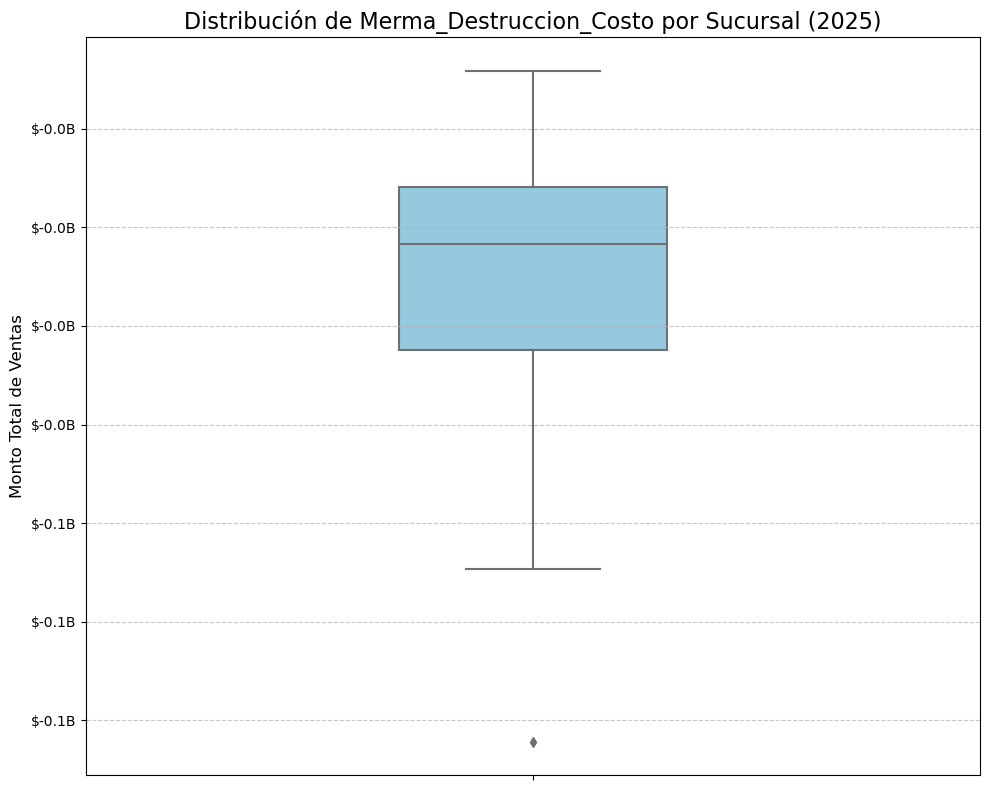

In [11]:
# --- ANÁLISIS DESCRIPTIVO DE MERMA POR DESTRUCCIÓN 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025")
print("="*80)

Merma_Destruccion_2025 = pd.read_excel("Detalle merma (18).xlsx", sheet_name="Export")
print(f"Archivo de Merma por Destrucción 2025 cargado con {len(Merma_Destruccion_2025)} registros.")

### --- Limpiamos la columna "Sucursal" para extraer solo el ID numérico ---
print(f"\nLimpiando la columna Sucursal para extraer el ID correcto...")
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = Merma_Destruccion_2025["Sucursal"].astype(str).str.replace('^100', '', regex=True)
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = pd.to_numeric(Merma_Destruccion_2025['ID_Sucursal_Limpio'], errors='coerce')
Merma_Destruccion_2025.dropna(subset=['ID_Sucursal_Limpio'], inplace=True)
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = Merma_Destruccion_2025['ID_Sucursal_Limpio'].astype(int)
print("Limpieza de IDs completada.")


### --- Agrupamos los datos por ID de sucursal y sumamos las columnas de Costo Merma y Unidades Merma ---    
Merma_Destruccion_2025 = Merma_Destruccion_2025.groupby('ID_Sucursal_Limpio').agg(
    Merma_Destruccion_Costo=('Costo_Merma', 'sum'),
    Merma_Destruccion_Unidades=('Unidades_Merma', 'sum')
).reset_index()
print(f"\nSe agruparon los datos de merma para {len(Merma_Destruccion_2025)} sucursales.")

Merma_Destruccion_2025 = pd.merge(Merma_Destruccion_2025, Detalle_sucursales, left_on='ID_Sucursal_Limpio', right_on= 'Nº Suc.', how='left')
Merma_Destruccion_2025.dropna(subset=['Tienda'], inplace=True)
Merma_Destruccion_2025['Nombre_Sucursal'] = Merma_Destruccion_2025['Tienda'].str.strip()

mapeo_outlets = {
        'Outlet La Serena': 'La Serena', 'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente', 'Outlet Iquique': 'Iquique', 'Outlet Parque Arauco': 'Parque Arauco'
    }
    
Merma_Destruccion_2025['Nombre_Sucursal'] = Merma_Destruccion_2025['Nombre_Sucursal'].replace(mapeo_outlets)

Merma_Destruccion_2025 = Merma_Destruccion_2025.groupby('Nombre_Sucursal')[['Merma_Destruccion_Costo', 'Merma_Destruccion_Unidades']].sum().reset_index()
print("Se unificaron los nombres de tienda y se consolidaron los datos.")


# --- 2. Formato para visualización de columnas numéricas para una visualizacion comercial ---
try: 
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if Variable_descuento_dañdos in df_formatted.columns:
            df_formatted[Variable_descuento_dañdos] = df_formatted[Variable_descuento_dañdos].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    Variable_descuento_dañdos = 'Merma_Destruccion_Costo'
    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{Variable_descuento_dañdos}' ---")
    desc_dañados = Merma_Destruccion_2025[Variable_descuento_dañdos].describe()
    print(f"Count: {desc_dañados['count']:.0f}")
    print(f"Mean: ${desc_dañados['mean']:,.0f}")
    print(f"Std: ${desc_dañados['std']:,.0f}")
    print(f"Min: ${desc_dañados['min']:,.0f}")
    print(f"25%: ${desc_dañados['25%']:,.0f}")
    print(f"50% (Median): ${desc_dañados['50%']:,.0f}")
    print(f"75%: ${desc_dañados['75%']:,.0f}")
    print(f"Max: ${desc_dañados['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {Variable_descuento_dañdos}:")
    print(format_numeric_columns_for_display_ventas(Merma_Destruccion_2025.nlargest(5, Variable_descuento_dañdos)))

    print(f"\nBottom 5 Sucursales por {Variable_descuento_dañdos}:")
    print(format_numeric_columns_for_display_ventas(Merma_Destruccion_2025.nsmallest(5, Variable_descuento_dañdos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({Variable_descuento_dañdos}) ---")
    Q1_Dañados = desc_dañados['25%']
    Q3_Dañdos = desc_dañados['75%']
    IQR_Dañados = Q3_Dañdos - Q1_Dañados
    lower_Dañados = Q1_Dañados - 1.5 * IQR_Dañados
    upper_Dañados = Q3_Dañdos + 1.5 * IQR_Dañados
    outliers_Dañados = Merma_Destruccion_2025[(Merma_Destruccion_2025[Variable_descuento_dañdos] < lower_Dañados) | (Merma_Destruccion_2025[Variable_descuento_dañdos] > upper_Dañados)]

    print(f"  Q1: ${Q1_Dañados:,.2f}")
    print(f"  Q3: ${Q3_Dañdos:,.2f}")
    print(f"  IQR: ${IQR_Dañados:,.2f}")
    print(f"  Límite Inferior: ${lower_Dañados:,.2f}")
    print(f"  Límite Superior: ${upper_Dañados:,.2f}")

    if not outliers_Dañados.empty:
        print(f"  Outliers detectados ({len(outliers_Dañados)}):")
        print(format_numeric_columns_for_display_ventas(outliers_Dañados))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y = Merma_Destruccion_2025[Variable_descuento_dañdos], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {Variable_descuento_dañdos} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")

##### Realizamos el Analisis Descriptivo del numero de Multas del 2025
###### Para esto solicitamos el Informe de Juicios Retal del 2025 y realizamos el respectivo cruce con los respectivos Centros de Costos


INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025
Archivo '    Estudio a cargo              Sociedad     Fecha de Ingreso  \
0               VBG  COMERCIAL ECCSA S.A.                  NaN   
1               VBG  COMERCIAL ECCSA S.A.                  NaN   
2               VBG  COMERCIAL ECCSA S.A.                  NaN   
3               VBG  COMERCIAL ECCSA S.A.                  NaN   
4               VBG  COMERCIAL ECCSA S.A.                  NaN   
..              ...                   ...                  ...   
206             VBG  COMERCIAL ECCSA S.A.  2025-02-27 00:00:00   
207             VBG  COMERCIAL ECCSA S.A.  2025-06-16 00:00:00   
208             VBG  COMERCIAL ECCSA S.A.  2025-06-23 00:00:00   
209             VBG  COMERCIAL ECCSA S.A.  2025-06-24 00:00:00   
210             VBG  COMERCIAL ECCSA S.A.  2025-06-30 00:00:00   

             Ciudad Tribunal            ROL                          Materia  \
0         Peñalolen       1°  24449-1-2016   Ley de Protección al Co

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


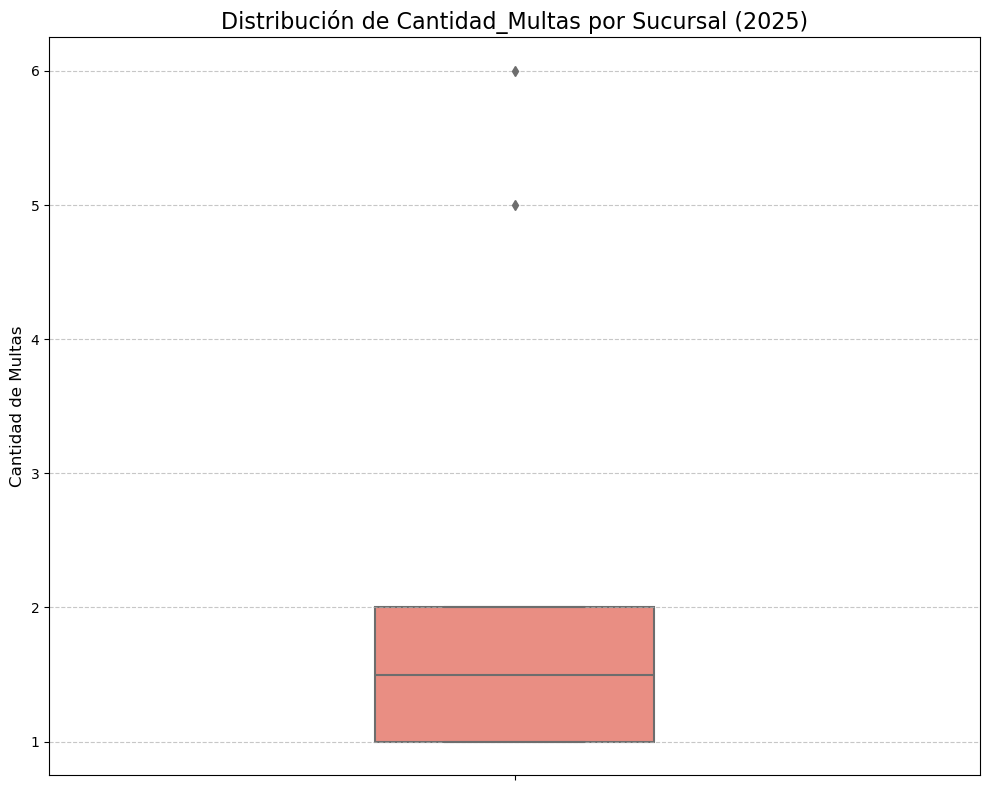

In [12]:
# --- ANÁLISIS DESCRIPTIVO DE Numero de Multas 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025")
print("="*80)

try:
    Multas_2025 = pd.read_excel("202506 Informe de Juicios Retail - Consolidado 1.xlsx", sheet_name="JPL", header=3, engine="openpyxl")
    Multas_Sucursal_2025 = Multas_2025['Nombre_Sucursal'].value_counts().reset_index()
    Multas_Sucursal_2025.columns = ['Nombre_Sucursal', 'Cantidad_Multas']
    ## -> Eliminamos las respectivas sucursales que no nos interesan que serian Marketplace y Barros Arana que cerro
    Multas_Sucursal_2025 = Multas_Sucursal_2025[Multas_Sucursal_2025["Nombre_Sucursal"] != "Marketplace"]
    Multas_Sucursal_2025 = Multas_Sucursal_2025[Multas_Sucursal_2025["Nombre_Sucursal"] != "Barros Arana"]
    Multas_Sucursal_2025 = Multas_Sucursal_2025.groupby('Nombre_Sucursal')['Cantidad_Multas'].sum().reset_index()

    Multas_Sucursal_2025['Cantidad_Multas'] = pd.to_numeric(Multas_Sucursal_2025['Cantidad_Multas'])

    print(f"Archivo '{Multas_2025}' cargado exitosamente.")
    print(f"El archivo contiene {len(Multas_2025)} registros para el análisis.")
    Variable_Analisis_Multas = 'Cantidad_Multas'    
    # --- Formato para visualización ---
    def format_as_integer(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    Desc_Multas = Multas_Sucursal_2025[Variable_Analisis_Multas].describe()
    
    print(f"\n--- Análisis Descriptivo de '{Variable_Analisis_Multas}' ---")
    print(f"Count: {Desc_Multas['count']:.0f}")
    print(f"Mean: {Desc_Multas['mean']:.1f}")
    print(f"Std: {Desc_Multas['std']:.1f}")
    print(f"Min: {Desc_Multas['min']:.0f}")
    print(f"25%: {Desc_Multas['25%']:.0f}")
    print(f"50% (Median): {Desc_Multas['50%']:.0f}")
    print(f"75%: {Desc_Multas['75%']:.0f}")
    print(f"Max: {Desc_Multas['max']:.0f}")

    print("\nTop 5 Sucursales (Mayor N° de Multas):")
    print(format_as_integer(Multas_Sucursal_2025.nlargest(5, Variable_Analisis_Multas)))

    print("\nBottom 5 Sucursales (Menor N° de Accidentes):")
    print(format_as_integer(Multas_Sucursal_2025.nsmallest(5, Variable_Analisis_Multas)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({Variable_Analisis_Multas}) ---")
    Q1_Multas = Desc_Multas['25%']
    Q3_Multas = Desc_Multas['75%']
    IQR_Multas = Q3_Multas - Q1_Multas
    lower_Multas = Q1_Multas - 1.5 * IQR_Multas
    upper_Multas = Q3_Multas + 1.5 * IQR_Multas
    outliers_Multas = Multas_Sucursal_2025[(Multas_Sucursal_2025[Variable_Analisis_Multas] < lower_Multas) | (Multas_Sucursal_2025[Variable_Analisis_Multas] > upper_Multas)]

    print(f"  Q1: {Q1_Multas:.1f}")
    print(f"  Q3: {Q3_Multas:.1f}")
    print(f"  IQR: {IQR_Multas:.1f}")
    print(f"  Límite Inferior: {lower_Multas:.1f}")
    print(f"  Límite Superior: {upper_Multas:.1f}")

    if not outliers_Multas.empty:
        print(f"  Outliers detectados ({len(outliers_Multas)}):")
        print(format_as_integer(outliers_Multas))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Multas_Sucursal_2025[Variable_Analisis_Multas], color='salmon', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.set_title(f'Distribución de {Variable_Analisis_Multas} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Multas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Multas_Sucursal_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'N° Accidentes')")
    print("coincidan exactamente con los de tu archivo de Excel.")



##### Realizamos el Analisis Descriptivo del numero de Recuperos del 2025



INICIANDO ANÁLISIS DE Numero de Recuperos del 2025

ANÁLISIS DESCRIPTIVO: 'NC / Ventas'

--- Estadísticas de 'N° Recuperos 2025' ---
Count: 42
Mean: 23457.14%
Std: 26448.75%
Min: 2400.00%
25%: 8125.00%
50% (Median): 12850.00%
75%: 26200.00%
Max: 121500.00%

Top 5 por 'N° Recuperos 2025':
 Nombre_Sucursal  N° Recuperos 2025
  Plaza Vespucio               1215
     Plaza Oeste               1133
Costanera Center                655
   Plaza Alameda                534
     Plaza Egaña                533

Bottom 5 por 'N° Recuperos 2025':
Nombre_Sucursal  N° Recuperos 2025
   San Fernando                 24
  Los Dominicos                 40
      Los Andes                 45
          Arica                 50
       Coquimbo                 57

  Q1: 81.25
  Q3: 262.0
  IQR: 180.75
  Límite Inferior: -189.875
  Límite Superior: 533.125
  Outliers detectados (4):
 Nombre_Sucursal  N° Recuperos 2025
Costanera Center                655
   Plaza Alameda                534
     Plaza Oeste    

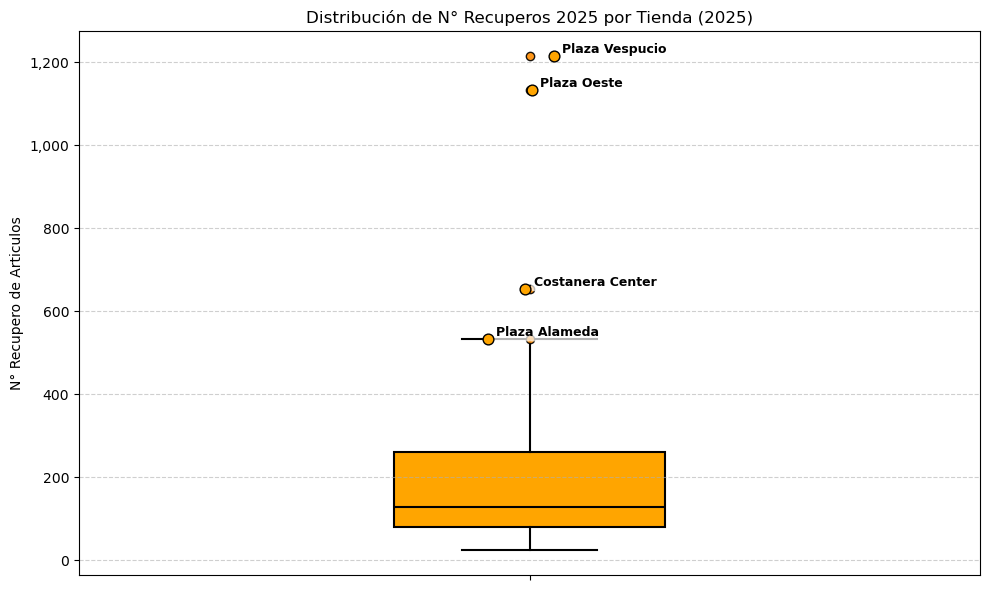

In [13]:
# --- ANÁLISIS DESCRIPTIVO DEL Numero de Recuperos 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE Numero de Recuperos del 2025")
print("="*80)

Actividad_Criminal = pd.read_excel("Actividad Criminal.xlsx", sheet_name="query")
Actividad_Criminal['Fecha_Evento'] = pd.to_datetime(Actividad_Criminal['Fecha_Evento'], errors='coerce',dayfirst=True, infer_datetime_format=True)
Actividad_Criminal["Año"] = Actividad_Criminal["Fecha_Evento"].dt.year

Actividad_Criminal_2025 = Actividad_Criminal['Año'].notna() & (Actividad_Criminal['Año'] == 2025)
Actividad_Criminal_2025 = Actividad_Criminal.loc[Actividad_Criminal_2025].copy().reset_index(drop=True)

Actividad_Criminal_Sucursal_2025 = (
    Actividad_Criminal_2025
        .groupby('Título', dropna=False)
        .size()
        .reset_index(name='N° Recuperos 2025')
        .sort_values('N° Recuperos 2025', ascending=False)
)
Actividad_Criminal_Sucursal_2025["N° Recuperos 2025"] = Actividad_Criminal_Sucursal_2025["N° Recuperos 2025"].astype(int)
Actividad_Criminal_Sucursal_2025.rename(columns={"Título": "Nombre_Sucursal"}, inplace=True)

Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2025['Nombre_Sucursal']
        .astype(str)
        # Quita "Ripley" al comienzo (con posibles guiones/espacios/después de dos puntos)
        .str.replace(r'(?i)^\s*Tienda[\s\-–:]*', '', regex=True)
        # Quita "Tda" o "Tda." en cualquier parte (insensible a mayúsculas)
        .str.replace(r'(?i)\btda\.?\b', '', regex=True)
        .str.replace(r'(?i)^\s*ripley[\s\-–:]*', '', regex=True)
        .str.replace(r'(?i)^\s*Comercial /[\s\-–:]*', '', regex=True)
        .str.replace(r'^\s*\.+\s*', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
)

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.groupby('Nombre_Sucursal', as_index=False)['N° Recuperos 2025'].sum()

# Eliminar "Alto Las Condes" y "Mall Alto las Condes"
Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025[
    ~Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'].str.strip().str.casefold().isin(
        {'alto las condes', 'mall alto las condes', "ofi cerro colorado 5240", "nan"}
    )
].reset_index(drop=True)

Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'].str.strip().replace({
        'Mall Plaza Trebol': 'El Trébol',
        'Plaza Huechuraba': 'Plaza Norte',
        'Concepcion Castellon': 'Castellón',
        'Pto. Montt Costanera': 'Costanera Pto Montt',
        'Copiapó': 'Plaza Copiapó',
        'Curicó': 'Mall Curicó',
        'Pta Arenas': 'Punta Arenas',
        'San Bernardo': 'Plaza Sur',
        'Mall del Centro Rancagua': 'Vivo Rancagua',
        'Rancagua': 'Vivo Rancagua',
        'Mall Del Centro': 'Puente',
        'Viña Sucre': 'Viña del Mar',
        'Concepcion': 'Castellón',
        'Mall Castellón': 'Castellón',
        'Maipu': 'Arauco Maipú',
        'Los Angeles': 'Plaza Los Ángeles',
        'Mall Calama': 'Plaza Calama',
        'Nueva Valdivia': 'Valdivia',
        'Mall Costanera': 'Costanera Pto Montt',
        'Mall Plaza Alameda': 'Plaza Alameda',
        'Mall del Centro': 'Puente',
        "Mall Temuco" : "Portal Temuco (Mall Temuco)",
        "Marina Arauco - Seguridad": "Marina Arauco",
        "Chillan" : "Chillán",
        "Crillon": "Crillón",
        "Mall Concepcion": "Mall Concepción",
        "Quilpue": "Quilpué",
        "Valparaiso" : "Valparaíso",
        "Arauco Maipu" : "Arauco Maipú",
    })
)

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.groupby('Nombre_Sucursal', as_index=False)['N° Recuperos 2025'].sum()
Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.dropna(subset=['N° Recuperos 2025'])
##### Realizamos el Analisis Descriptivo del numero de Recuperos del 2025
print("\n" + "="*60)
print("ANÁLISIS DESCRIPTIVO: 'NC / Ventas'")
print("="*60)

try:
    variable_a_analizar_actividad_criminal = 'N° Recuperos 2025'
    columna_sucursal = 'Nombre_Sucursal'

    if variable_a_analizar_actividad_criminal not in Actividad_Criminal_Sucursal_2025.columns:
        raise KeyError(variable_a_analizar_actividad_criminal)

    # Estadísticas descriptivas
    desc_actividad_criminal = Actividad_Criminal_Sucursal_2025[variable_a_analizar_actividad_criminal].describe()
    print(f"\n--- Estadísticas de '{variable_a_analizar_actividad_criminal}' ---")
    print(f"Count: {desc_actividad_criminal['count']:.0f}")
    print(f"Mean: {desc_actividad_criminal['mean']:.2%}")
    print(f"Std: {desc_actividad_criminal['std']:.2%}")
    print(f"Min: {desc_actividad_criminal['min']:.2%}")
    print(f"25%: {desc_actividad_criminal['25%']:.2%}")
    print(f"50% (Median): {desc_actividad_criminal['50%']:.2%}")
    print(f"75%: {desc_actividad_criminal['75%']:.2%}")
    print(f"Max: {desc_actividad_criminal['max']:.2%}")

    print(f"\nTop 5 por '{variable_a_analizar_actividad_criminal}':")
    top5 = Actividad_Criminal_Sucursal_2025.nlargest(5, variable_a_analizar_actividad_criminal)[[columna_sucursal, variable_a_analizar_actividad_criminal]]
    print(top5.to_string(index=False))

    print(f"\nBottom 5 por '{variable_a_analizar_actividad_criminal}':")
    bottom5 = Actividad_Criminal_Sucursal_2025.nsmallest(5, variable_a_analizar_actividad_criminal)[[columna_sucursal, variable_a_analizar_actividad_criminal]]
    print(bottom5.to_string(index=False))

    # Detección de outliers por IQR
    Q1_actividad_criminal = desc_actividad_criminal['25%']
    Q3_actividad_criminal = desc_actividad_criminal['75%']
    IQR_actividad_criminal = Q3_actividad_criminal - Q1_actividad_criminal
    lower_actividad_criminal = Q1_actividad_criminal - 1.5 * IQR_actividad_criminal
    upper_actividad_criminal = Q3_actividad_criminal + 1.5 * IQR_actividad_criminal
    outliers_actividad_criminal = Actividad_Criminal_Sucursal_2025[(Actividad_Criminal_Sucursal_2025[variable_a_analizar_actividad_criminal] < lower_actividad_criminal) | (Actividad_Criminal_Sucursal_2025[variable_a_analizar_actividad_criminal] > upper_actividad_criminal)].copy()

    print(f"\n  Q1: {Q1_actividad_criminal}")
    print(f"  Q3: {Q3_actividad_criminal}")
    print(f"  IQR: {IQR_actividad_criminal}")
    print(f"  Límite Inferior: {lower_actividad_criminal}")
    print(f"  Límite Superior: {upper_actividad_criminal}")

    if not outliers_actividad_criminal.empty:
        print(f"  Outliers detectados ({len(outliers_actividad_criminal)}):")
        # Mostrar el DataFrame de outliers correctamente (evitar crear una tupla)
        print(outliers_actividad_criminal[[columna_sucursal, variable_a_analizar_actividad_criminal]].to_string(index=False))
    else:
        print("  No se detectaron outliers.")

    # Boxplot y etiquetado de outliers
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(
        y=Actividad_Criminal_Sucursal_2025[variable_a_analizar_actividad_criminal],
        color='#FFA500',
        width=0.3,
        ax=ax,
        flierprops=dict(marker='o', markerfacecolor='#FF8C00', markeredgecolor='black', markersize=6, alpha=0.9),
        medianprops=dict(color='black'),
        boxprops=dict(facecolor='#FFA500', edgecolor='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )
    # Formatear ticks del eje Y como enteros (con separador de miles)
    try:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
    except Exception:
        
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%g"))

    ax.set_title(f'Distribución de {variable_a_analizar_actividad_criminal} por Tienda (2025)')
    ax.set_ylabel('N° Recupero de Articulos')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    if not outliers_actividad_criminal.empty:
        y_vals = outliers_actividad_criminal[variable_a_analizar_actividad_criminal].values
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
        ax.scatter(x_jitter, y_vals, color='#FFA500', zorder=5, s=60, edgecolor='black')
        for xi, yi, lbl in zip(x_jitter, y_vals, outliers_actividad_criminal[columna_sucursal].astype(str)):
            ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                        fontsize=9, weight='bold', color='black',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    plt.tight_layout()
    plt.show()
except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")


##### Realizamos la incorporacion de la Matriz BHT junto a su respectivo Indice y su Indice de Seguridad

In [14]:
Matriz_BHT = pd.read_excel("Matriz BHT.xlsx")
Matriz_BHT = Matriz_BHT.dropna()

In [15]:
Metros_Cuadrados = pd.read_excel("Metros Cuadrados Sucursal.xlsx")

#### Incorporamos Rotacion de Personal

In [16]:
Rotacion_Personal_2024_2025 = pd.read_excel("Rotación por tienda 24-25.xlsx",
                                            sheet_name="Rot. Total", header=None)

headers = Rotacion_Personal_2024_2025.iloc[1].astype(str).str.strip()
Rotacion_Personal_2024_2025 = Rotacion_Personal_2024_2025.iloc[2:].copy()
Rotacion_Personal_2024_2025.columns = headers

Rotacion_Personal_2024_2025 = Rotacion_Personal_2024_2025.dropna(axis=1, how="all")
Rotacion_Personal_2024_2025 = Rotacion_Personal_2024_2025.loc[:, ~Rotacion_Personal_2024_2025.columns.duplicated()]

def _pick(colnames, options):
    for c in colnames:
        if str(c).strip().lower() in options:
            return c
    return None

c_suc   = _pick(Rotacion_Personal_2024_2025.columns, {"lugar de trabajo","sucursal","nombre_sucursal","tienda"})
c_rot24 = "Rot. 2024" if "Rot. 2024" in Rotacion_Personal_2024_2025.columns else next((c for c in Rotacion_Personal_2024_2025.columns if "2024" in str(c)), None)
c_rot25 = "Rot. 2025" if "Rot. 2025" in Rotacion_Personal_2024_2025.columns else next((c for c in Rotacion_Personal_2024_2025.columns if "2025" in str(c)), None)

if c_suc and c_rot24 and c_rot25:
    Rotacion_Personal = Rotacion_Personal_2024_2025[[c_suc, c_rot24, c_rot25]].copy()
    Rotacion_Personal.columns = ["Nombre_Sucursal", "Rot_2024", "Rot_2025"]
    Rotacion_Personal = Rotacion_Personal[
        Rotacion_Personal["Nombre_Sucursal"].astype(str).str.strip().str.lower() != "total"
    ]
else:
    raise ValueError("One or more required columns (c_suc, c_rot24, c_rot25) are missing.")

# --- 2) Parser de porcentajes (igual que tenías) ---
def _parse_percent_column(series):
    s_raw = series.astype(str)
    had_percent = s_raw.str.contains("%")
    s_norm = (s_raw.str.replace("%","",regex=False)
                    .str.replace(",",".",regex=False)
                    .str.strip())
    vals = pd.to_numeric(s_norm, errors="coerce")
    vals = np.where(had_percent, vals/100.0, vals)
    mask_fix = (~had_percent) & pd.notna(vals) & (vals > 3)
    vals = np.where(mask_fix, vals/100.0, vals)
    return pd.to_numeric(vals, errors="coerce")

raw24 = Rotacion_Personal["Rot_2024"].copy()
raw25 = Rotacion_Personal["Rot_2025"].copy()

Rotacion_Personal["Rot_2024"] = _parse_percent_column(raw24)
Rotacion_Personal["Rot_2025"] = _parse_percent_column(raw25)

Rotacion_Personal["Nombre_Sucursal"] = (
    Rotacion_Personal["Nombre_Sucursal"]
      .str.replace(r"^Tda\.\s*", "", regex=True)
      .str.strip()
)

# Chequeo rápido
print(Rotacion_Personal.loc[
    Rotacion_Personal["Nombre_Sucursal"].str.contains("Calama", case=False, na=False),
    ["Nombre_Sucursal","Rot_2024","Rot_2025"]
])

# 🔍 Aplicamos la Funcion para encontrar el mejor Macth posible para tener un listado de Nombres Sucursales lo mas similar posible
Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal["Nombre_Sucursal"].apply(
    lambda x: encontrar_nombre_oficial_mejorado(x, nombres_oficiales_normalizados)
)

correcciones_manuales_rotacion_personal = {
    "Estación Central": "Plaza Alameda",
    "Huechuraba": "Plaza Norte",
    "Puerto Montt Costanera": "Costanera Pto Montt",
    "San Bernardo": "Plaza Sur",
    "Viña Plaza Sucre" : "Viña del Mar",
    "Mall Calama" : "Plaza Calama",
    "Mall del Centro" : "Puente",
    "Plaza Huechuraba" : "Plaza Norte",
}

Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal.apply(
    lambda row: correcciones_manuales_rotacion_personal.get(row["Nombre_Sucursal"], row["Nombre_Oficial_Match"]),
    axis=1
)

Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal["Nombre_Oficial_Match"].dropna()
Rotacion_Personal["Nombre_Sucursal"] = Rotacion_Personal["Nombre_Oficial_Match"]
Rotacion_Personal = Rotacion_Personal.drop(columns=["Nombre_Oficial_Match"])

print("Numero de sucursales con rotación válida en 2024 o 2025:", Rotacion_Personal["Nombre_Sucursal"].nunique())

   Nombre_Sucursal  Rot_2024  Rot_2025
19     Mall Calama  1.112971  0.645161
Numero de sucursales con rotación válida en 2024 o 2025: 42


##### Habiendo ya realizado todos los Analisis Descriptivo de nuestras variables a utilizar, renombramos las columnas necesarias para realizar los cruces y establcer un DataFrame Consolidado 

In [17]:
print("\n" + "="*130)
print("Renombramos las columnas de los DataFrame para posibles Merge y una mejor comprension del Contenido para el DataFrame Consolidado")
print("="*130)

Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'total_monto_trx': 'Total_Ventas'})
Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'total_transacciones': 'Total_Transacciones_Ventas'})

Venta_Retail_2025 = Venta_Retail_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})

Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'total_monto_trx': 'Total_Notas_Credito'})
Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'total_transacciones': 'Total_Transacciones_Notas_Credito'})

Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Nombre_Oficial_Match': 'Nombre_Sucursal'})
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Reclamos_Cantidad_2025': 'Total_Reclamos'})

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.rename(columns ={'Tienda': 'Nombre_Sucursal'})
Matriz_BHT = Matriz_BHT.rename(columns= {"Tienda":"Nombre_Sucursal"})
Metros_Cuadrados = Metros_Cuadrados.rename(columns={"Tienda": "Nombre_Sucursal"})


# Desviacion_Meta_Merma_2025 y Merma_Destruccion_2025 no es necesario renombrar porque ya tiene el nombre correcto
Merma_Destruccion_2025 = Merma_Destruccion_2025.rename(columns={'Merma_Destruccion_Costo': 'Costo_Merma_Destruccion'})


Accidentes_2025 = Accidentes_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Descuento_Productos_Dañados_2025 = Descuento_Productos_Dañados_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})

Multas_Sucursal_2025 = Multas_Sucursal_2025.rename(columns= {"Cantidad_Multas": "N° Multas"})



Renombramos las columnas de los DataFrame para posibles Merge y una mejor comprension del Contenido para el DataFrame Consolidado


In [18]:
print("Librerías cargadas.")
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns
import unicodedata
from fuzzywuzzy import process
import re
from adjustText import adjust_text
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("Creamos carpetas input y output si no existen.")
BASE_DIR = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
INPUT_DIR = os.path.join(BASE_DIR, "input")
OUTPUT_DIR = os.path.join(BASE_DIR, "output")
os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

Detalle_sucursales = pd.read_excel(os.path.join(INPUT_DIR, "Detalle sucursales (1).xlsx"))


def procesar_base_sucursal(
    archivo_principal,
    detalle_sucursales=None,
    columna_id_principal=None,
    columna_id_detalle=None,
    columnas_a_sumar=None,
    mapeo_outlets=None,
    nombre_columna_sucursal='Tienda',
    columnas_seleccion=None,
    rename_dict=None,
    dropna_col=None,
    agrupacion=None,
    sheet_name=None,
    handle_productos_danados=False,
    handle_merma_destruccion=False,
    merma_cols=None,
    handle_multas=False,
    multas_sheet='JPL',
    multas_header=3,
    multas_nombre_col='Nombre_Sucursal',
    exclude_multas=None,
    multas_fecha_col=None,
    multas_year=None,
    handle_actividad_criminal=False,
    actividad_sheet='query',
    actividad_nombre_cols=None,
    manual_name_map=None,
    dropna_all=False,
    post_rename=None,
    fillna_0 = False,
    fillna_0_cols=None,
    collect_for_merge = False,
    exclude_names=None,
    exclude_regex=None,
    handle_rotacion=False,
    rotacion_sheet='Rot. Total',
    handle_reclamos=False,               
    reclamos_year_col='Año',             
    reclamos_ticket_col='Ticket',        
    reclamos_store_col='Tienda', 
    handle_juicios_laborales=False,
    juicios_sheet=None,
    juicios_header=None,
    juicios_nombre_col='División de Personal',
    juicios_fecha_col='Fecha Audiencia',
    juicios_year=None,

    ):
    """
    Procesamiento de bases de datos 
    - Ventas Tienda y Notas de Credito Tienda
    - Desviacion Inventario / Accidentes
    - Descuento Productos Dañados
    - Merma de Destruccion
    - Multas
    - Matriz BHT / Metros Cuadrado
    - Actividad Criminal (Recuperos)
    """

    # declarar la variable global MERGE_DFS al comienzo de la función para evitar errores
    global MERGE_DFS

    # Cargar archivo principal (soporta CSV o Excel con sheet_name)
    fname = str(archivo_principal)
    if fname.lower().endswith('.csv'):
        df = pd.read_csv(fname)
        print(f"Archivo CSV '{fname}' cargado. Registros: {len(df)}")
    elif fname.lower().endswith(('.xls', '.xlsx', '.xlsm', '.xlsb')):
        # si se indicó sheet_name, forzar lectura de esa hoja; si no, leer la primer hoja por defecto
        try:
            if sheet_name is not None:
                df = pd.read_excel(fname, sheet_name=sheet_name)
                print(f"Archivo Excel '{fname}' cargado (hoja: '{sheet_name}'). Registros: {len(df)}")
            else:
                df = pd.read_excel(fname)
                print(f"Archivo Excel '{fname}' cargado (hoja por defecto). Registros: {len(df)}")
        except ValueError as e:
            # hoja no encontrada u otro error de sheet
            raise ValueError(f"No se pudo leer la hoja '{sheet_name}' en '{fname}': {e}")
    else:
        # intentamos leer como Excel por defecto si extensión desconocida
        df = pd.read_excel(fname, sheet_name=sheet_name) if sheet_name is not None else pd.read_excel(fname)
        print(f"Archivo '{fname}' cargado. Registros: {len(df)}")

    if dropna_all:
        n_before = len(df)
        df = df.dropna().reset_index(drop=True)
        print(f"- dropna() aplicado a '{fname}': filas {n_before} -> {len(df)}")

    # ...existing code...
    # Merge con detalle de sucursales (si corresponde)
    if detalle_sucursales is not None and columna_id_principal and columna_id_detalle:
        df = pd.merge(
            left=df,
            right=detalle_sucursales,
            left_on=columna_id_principal,
            right_on=columna_id_detalle,
            how='left'
        )
        print("✅ Unión inicial completada.")

    # Flujo especial para 'Productos Dañados' (si corresponde)

    if handle_productos_danados or ('Código Sucursal' in df.columns and 'Descto' in df.columns):
        col_codigo = 'Código Sucursal'
        col_desc = 'Descto'
        print(f"\nAplicando flujo de 'Productos Dañados' (columnas detectadas: '{col_codigo}', '{col_desc}')...")

        # Extraer ID numérico del código de sucursal (prefijo de dígitos)
        df['Numero_Sucursal'] = df[col_codigo].astype(str).str.extract(r'^(\d+)')
        df['Numero_Sucursal'] = pd.to_numeric(df['Numero_Sucursal'], errors='coerce')
        df = df.dropna(subset=['Numero_Sucursal']).copy()
        df['Numero_Sucursal'] = df['Numero_Sucursal'].astype(int)
        print(f"- Se extrajeron {df['Numero_Sucursal'].nunique()} códigos de sucursal numéricos.")

        # Asegurar que 'Descto' sea numérico y agrupar por Numero_Sucursal
        df[col_desc] = pd.to_numeric(df[col_desc], errors='coerce').fillna(0)
        descuento_por_id = df.groupby('Numero_Sucursal').agg(Productos_Dañados_Descuento=(col_desc, 'sum')).reset_index()
        print(f"- Agrupado descuento por {len(descuento_por_id)} códigos de sucursal.")

        # Unir con detalle de sucursales si se proporcionó para obtener nombres
        if detalle_sucursales is not None:
            descuento_por_id = pd.merge(
                left=descuento_por_id,
                right=detalle_sucursales,
                left_on='Numero_Sucursal',
                right_on='Nº Suc.',
                how='left'
            )
            # Algunas hojas usan 'Tienda' como nombre; protegemos la existencia
            if 'Tienda' in descuento_por_id.columns:
                descuento_por_id = descuento_por_id.groupby('Tienda', as_index=False)['Productos_Dañados_Descuento'].sum()
                descuento_por_id = descuento_por_id.rename(columns={'Tienda': 'Nombre_Sucursal'})
                print("- Merge con Detalle_sucursales realizado y consolidado por 'Tienda'.")
            else:
                # si no hay columna Tienda, devolvemos por Numero_Sucursal
                descuento_por_id = descuento_por_id.rename(columns={'Numero_Sucursal': 'Numero_Sucursal_Id'})
                print("⚠ Detalle_sucursales no contenía columna 'Tienda'; se devuelve por ID de sucursal.")
        else:
            # si no hay detalle, devolvemos por Numero_Sucursal
            descuento_por_id = descuento_por_id.rename(columns={'Numero_Sucursal': 'Numero_Sucursal_Id'})
            print("⚠ No se proporcionó Detalle_sucursales; se devuelve resultado por ID de sucursal.")
        
        if collect_for_merge and 'Nombre_Sucursal' in descuento_por_id.columns:
            MERGE_DFS.append(descuento_por_id[['Nombre_Sucursal','Productos_Dañados_Descuento']].copy())

        return descuento_por_id
    
    # --- Flujo: Rotación de Personal (24-25) ---
    if handle_rotacion:
        try:
            rot_df = pd.read_excel(fname, sheet_name=rotacion_sheet, header=None)
        except Exception as e:
            raise FileNotFoundError(f"No se pudo leer hoja '{rotacion_sheet}' en '{fname}': {e}")

        # reconstruir headers y tabla a partir del layout dado
        headers = rot_df.iloc[1].astype(str).str.strip()
        rot_df = rot_df.iloc[2:].copy()
        rot_df.columns = headers
        rot_df = rot_df.dropna(axis=1, how="all")
        rot_df = rot_df.loc[:, ~rot_df.columns.duplicated()]

        def _pick(cols, opts):
            for c in cols:
                if str(c).strip().lower() in opts:
                    return c
            return None

        c_suc   = _pick(rot_df.columns, {"lugar de trabajo","sucursal","nombre_sucursal","tienda"})
        c_rot24 = "Rot. 2024" if "Rot. 2024" in rot_df.columns else next((c for c in rot_df.columns if "2024" in str(c)), None)
        c_rot25 = "Rot. 2025" if "Rot. 2025" in rot_df.columns else next((c for c in rot_df.columns if "2025" in str(c)), None)

        if not (c_suc and c_rot24 and c_rot25):
            raise ValueError("Rotación: faltan columnas requeridas (sucursal/2024/2025) en la hoja")

        Rotacion_Personal = rot_df[[c_suc, c_rot24, c_rot25]].copy()
        Rotacion_Personal.columns = ["Nombre_Sucursal", "Rot_2024", "Rot_2025"]
        Rotacion_Personal = Rotacion_Personal[Rotacion_Personal["Nombre_Sucursal"].astype(str).str.strip().str.lower() != "total"]

        def _parse_percent_column(series):
            s_raw = series.astype(str)
            had_percent = s_raw.str.contains("%")
            s_norm = (s_raw.str.replace("%","",regex=False)
                            .str.replace(",",".",regex=False)
                            .str.strip())
            vals = pd.to_numeric(s_norm, errors="coerce")
            vals = np.where(had_percent, vals/100.0, vals)
            mask_fix = (~had_percent) & pd.notna(vals) & (vals > 3)
            vals = np.where(mask_fix, vals/100.0, vals)
            return pd.to_numeric(vals, errors="coerce")

        raw24 = Rotacion_Personal["Rot_2024"].copy()
        raw25 = Rotacion_Personal["Rot_2025"].copy()
        Rotacion_Personal["Rot_2024"] = _parse_percent_column(raw24)
        Rotacion_Personal["Rot_2025"] = _parse_percent_column(raw25)

        Rotacion_Personal["Nombre_Sucursal"] = (
            Rotacion_Personal["Nombre_Sucursal"]
              .astype(str)
              .str.replace(r"^Tda\.\s*", "", regex=True)
              .str.strip()
        )

        _map_rotacion = map_manual_default.copy() if 'map_manual_default' in globals() else {}

        if 'encontrar_nombre_oficial_mejorado' in globals() and 'nombres_oficiales_normalizados' in globals():
            Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal["Nombre_Sucursal"].apply(
                lambda x: encontrar_nombre_oficial_mejorado(x, nombres_oficiales_normalizados)
            )
        else:
            Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal["Nombre_Sucursal"]

        Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal.apply(
            lambda row: _map_rotacion.get(row["Nombre_Sucursal"], row["Nombre_Oficial_Match"]),
            axis=1
        )



        Rotacion_Personal["Nombre_Oficial_Match"] = Rotacion_Personal["Nombre_Oficial_Match"].fillna(Rotacion_Personal["Nombre_Sucursal"])
        Rotacion_Personal["Nombre_Sucursal"] = Rotacion_Personal["Nombre_Oficial_Match"]
        Rotacion_Personal = Rotacion_Personal.drop(columns=["Nombre_Oficial_Match"])

        if 'Nombre_Sucursal' in Rotacion_Personal.columns:
            # excluir por lista exacta (normalizando espacios)
            if exclude_names:
                excl_set = {str(x).strip() for x in exclude_names}
                Rotacion_Personal = Rotacion_Personal[
                    ~Rotacion_Personal["Nombre_Sucursal"].astype(str).str.strip().isin(excl_set)
                ].copy()
            # excluir por patrón regex
            if exclude_regex:
                Rotacion_Personal = Rotacion_Personal[
                    ~Rotacion_Personal["Nombre_Sucursal"].astype(str).str.contains(exclude_regex, na=False)
                ].copy()

        print(f"Rotacion_Personal procesada. Sucursales válidas: {Rotacion_Personal['Nombre_Sucursal'].nunique()}")

        if collect_for_merge:
            try:
                MERGE_DFS.append(Rotacion_Personal[['Nombre_Sucursal','Rot_2024','Rot_2025']].drop_duplicates().copy())
                print("- Rotacion_Personal añadida a MERGE_DFS")
            except Exception as e:
                print("⚠ No se pudo añadir Rotacion_Personal a MERGE_DFS:", e)

        return Rotacion_Personal
    

    # --- Flujo: Reclamos 2025 ---
    if handle_reclamos or 'reclamos' in fname.lower():
        # Reclamos: soporta archivo con columnas año, tienda, ticket
        if reclamos_store_col not in df.columns and archivo_principal:
            pass

        # filtrar año 2025 (configurable)
        if reclamos_year_col in df.columns:
            recl_2025 = df[df[reclamos_year_col] == 2025].copy()
        else:
            recl_2025 = df.copy()

        # eliminar filas sin tienda
        if reclamos_store_col in recl_2025.columns:
            recl_2025 = recl_2025.dropna(subset=[reclamos_store_col]).reset_index(drop=True)
            recl_2025[reclamos_store_col] = recl_2025[reclamos_store_col].astype(str).str.strip()
        else:
            raise KeyError(f"No se encontró columna de tienda '{reclamos_store_col}' en archivo de reclamos.")

        # contar tickets por tienda
        if reclamos_ticket_col in recl_2025.columns:
            recl_sum = recl_2025.groupby(reclamos_store_col).agg(
                Reclamos_Cantidad_2025=(reclamos_ticket_col, 'count')
            ).reset_index()
        else:
            recl_sum = recl_2025.groupby(reclamos_store_col).size().reset_index(name='Reclamos_Cantidad_2025')

        recl_sum = recl_sum.rename(columns={reclamos_store_col: 'Nombre_Sucursal'})

        # normalizador simple (eliminar tildes)
        def _eliminar_tildes(texto):
            texto = str(texto)
            return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn').strip()

        # construir diccionario de correcciones: usar map_manual_default + manual_name_map (si existe)
        correcciones = {}
        if 'map_manual_default' in globals():
            correcciones.update(map_manual_default)
        if manual_name_map:
            correcciones.update(manual_name_map)

        # fixes explícitos adicionales para casos conocidos
        correcciones.update({
            "Concepcion 2": "Castellón",
            "Concepción 2": "Castellón",
        })

        # normalizar claves del diccionario (sin tildes, trimmed)
        correcciones_norm = { _eliminar_tildes(k).strip(): v for k, v in correcciones.items() }

        # aplicar mapping únicamente por coincidencia en diccionario normalizado
        def _map_nombre(nombre_orig):
            clave = _eliminar_tildes(nombre_orig).strip()
            if clave in correcciones_norm:
                return correcciones_norm[clave]
            return nombre_orig  # si no hay mapping, conservar original

        recl_sum['Nombre_Sucursal'] = recl_sum['Nombre_Sucursal'].astype(str).apply(lambda x: _map_nombre(x).strip())

        # eliminar filas no deseadas explícitas (ej: "Concepcion 1" si aplica)
        try:
            recl_sum = recl_sum[recl_sum['Nombre_Sucursal'].astype(str).str.strip().astype(bool)].copy()
        except Exception:
            pass

        # agrupar por nombre final y consolidar cantidades
        recl_final = recl_sum.groupby('Nombre_Sucursal', as_index=False).agg({'Reclamos_Cantidad_2025': 'sum'})

        # excluir por lista o regex si se pidió
        if 'Nombre_Sucursal' in recl_final.columns:
            if exclude_names:
                excl_set = {str(x).strip() for x in exclude_names}
                recl_final = recl_final[~recl_final['Nombre_Sucursal'].astype(str).str.strip().isin(excl_set)].copy()
            if exclude_regex:
                recl_final = recl_final[~recl_final['Nombre_Sucursal'].astype(str).str.contains(exclude_regex, na=False)].copy()

        print(f"Reclamos procesados. Sucursales con reclamos 2025: {len(recl_final)}")

        # añadir a MERGE_DFS si se solicitó
        if collect_for_merge and 'Nombre_Sucursal' in recl_final.columns:
            MERGE_DFS.append(recl_final[['Nombre_Sucursal','Reclamos_Cantidad_2025']].copy())
            print("- Reclamos añadidos a MERGE_DFS")

        return recl_final


 # --- Flujo: Merma de Destrucción (celda 20) ---
    # Detecta si la tabla parece merma o forzar con handle_merma_destruccion=True
    if handle_merma_destruccion or ('Sucursal' in df.columns and (('Costo_Merma' in df.columns) or ('Unidades_Merma' in df.columns))):
        # configuración por defecto de nombres de columnas (se puede pasar merma_cols)
        mc = {'sucursal_col': 'Sucursal', 'costo_col': 'Costo_Merma', 'unidades_col': 'Unidades_Merma'}
        if isinstance(merma_cols, dict):
            mc.update(merma_cols)

        s_col = mc['sucursal_col']
        costo_col = mc['costo_col']
        unidades_col = mc['unidades_col']

        print(f"Aplicando flujo 'Merma de Destrucción' (sucursal='{s_col}', costo='{costo_col}', unidades='{unidades_col}')")

        # limpiar la columna de sucursal (eliminar prefijo '100' si existe)
        if s_col not in df.columns:
            raise KeyError(f"No se encontró la columna esperada de sucursal: '{s_col}'")
        df['ID_Sucursal_Limpio'] = df[s_col].astype(str).str.replace(r'^100', '', regex=True)
        df['ID_Sucursal_Limpio'] = pd.to_numeric(df['ID_Sucursal_Limpio'], errors='coerce')
        df = df.dropna(subset=['ID_Sucursal_Limpio']).copy()
        df['ID_Sucursal_Limpio'] = df['ID_Sucursal_Limpio'].astype(int)
        print(f"- Se obtuvieron {df['ID_Sucursal_Limpio'].nunique()} IDs de sucursal numéricos.")

        # asegurar columnas numéricas
        if costo_col in df.columns:
            df[costo_col] = pd.to_numeric(df[costo_col], errors='coerce').fillna(0)
        else:
            df[costo_col] = 0
            print(f"⚠ No se encontró columna '{costo_col}', se usará 0.")

        if unidades_col in df.columns:
            df[unidades_col] = pd.to_numeric(df[unidades_col], errors='coerce').fillna(0)
        else:
            df[unidades_col] = 0
            print(f"⚠ No se encontró columna '{unidades_col}', se usará 0.")

        # agrupar por ID limpio
        merma_agg = df.groupby('ID_Sucursal_Limpio').agg(
            Merma_Destruccion_Costo=(costo_col, 'sum'),
            Merma_Destruccion_Unidades=(unidades_col, 'sum')
        ).reset_index()
        print(f"- Agrupadas merma para {len(merma_agg)} sucursales (por ID).")

        # unir con detalle_sucursales para obtener nombre de tienda si se entregó
        if detalle_sucursales is not None:
            merma_agg = pd.merge(merma_agg, detalle_sucursales, left_on='ID_Sucursal_Limpio', right_on='Nº Suc.', how='left')
            if 'Tienda' in merma_agg.columns:
                merma_agg['Nombre_Sucursal'] = merma_agg['Tienda'].astype(str).str.strip()
                mask_no_match = (
                    merma_agg['Nombre_Sucursal'].isnull() |
                    merma_agg['Nombre_Sucursal'].str.strip().str.lower().isin(['', 'nan', 'none'])
                )
                n_no_match = int(mask_no_match.sum())
                if n_no_match > 0:
                    merma_agg = merma_agg.loc[~mask_no_match].copy()
                    print(f"- Se eliminaron {n_no_match} filas sin correspondencia en Detalle_sucursales (ID sin match).")

                # aplicar mapeo outlets si se entregó
                if mapeo_outlets:
                    merma_agg['Nombre_Sucursal'] = merma_agg['Nombre_Sucursal'].replace(mapeo_outlets)
                merma_agg = merma_agg.groupby('Nombre_Sucursal')[['Merma_Destruccion_Costo', 'Merma_Destruccion_Unidades']].sum().reset_index()
                print("- Merge con Detalle_sucursales realizado y consolidado por 'Tienda'.")
            else:
                # si no hay columna 'Tienda' dejamos por ID
                merma_agg = merma_agg.rename(columns={'ID_Sucursal_Limpio': 'ID_Sucursal_Limpio_Id'})
                print("⚠ Detalle_sucursales no contenía columna 'Tienda'; resultado devuelto por ID de sucursal.")
        else:
            merma_agg = merma_agg.rename(columns={'ID_Sucursal_Limpio': 'ID_Sucursal_Limpio_Id'})
            print("⚠ No se proporcionó Detalle_sucursales; resultado devuelto por ID de sucursal.")

        merma_agg = merma_agg.rename(columns={
            'Merma_Destruccion_Costo': 'Costo_Merma_Destruccion',
            'Merma_Destruccion_Unidades': 'Merma_Destruccion_Unidades'
        })

        if collect_for_merge and 'Nombre_Sucursal' in merma_agg.columns:
            MERGE_DFS.append(merma_agg[['Nombre_Sucursal','Costo_Merma_Destruccion','Merma_Destruccion_Unidades']].copy())

        return merma_agg
    
     # --- Flujo: Multas (celda 22) ---
    # --- Flujo: Multas (celda 22) ---
    if handle_multas or fname.lower().startswith('202506 informe de juicios'):            # lee hoja y header configurables (por defecto JPL, header=3)
            try:
                multas_df = pd.read_excel(fname, sheet_name=multas_sheet, header=multas_header)
            except Exception:
                # fallback a lectura sin header si falla
                multas_df = pd.read_excel(fname, sheet_name=multas_sheet)
            print(f"Archivo de Multas '{fname}' (hoja: {multas_sheet}) cargado con {len(multas_df)} registros.")
    
            # columna con nombre de sucursal (por defecto "Nombre_Sucursal")
            if multas_nombre_col not in multas_df.columns:
                # intentar variantes comunes (coincidencia exacta ignorando mayúsculas/minúsculas)
                found_col = None
                candidates = ['Nombre_Sucursal', 'Nombre Sucursal', 'Nombre', 'Sucursal', 'Tienda', 'División de Personal', 'Division de Personal']
                for c_try in candidates:
                    for col in multas_df.columns:
                        try:
                            if str(col).strip().casefold() == str(c_try).strip().casefold():
                                found_col = col
                                break
                        except Exception:
                            continue
                    if found_col:
                        break
    
                # si no se encontró con igualdad, intentar buscar por palabras clave contenidas
                if found_col is None:
                    keywords = ['nombre', 'sucursal', 'tienda', 'división', 'division']
                    for col in multas_df.columns:
                        col_str = str(col)
                        if any(k in col_str.casefold() for k in keywords):
                            found_col = col
                            break
    
                if found_col is None:
                    raise KeyError(f"No se encontró columna de nombre de sucursal en archivo de multas (intentadas incl.: {multas_nombre_col}).")
                multas_nombre_col = found_col
    
            print(f"Usando columna de nombre para Multas: '{multas_nombre_col}'")
    
            # Si la columna detectada es tipo "División de Personal" (o contiene 'division'), contar filas por esa columna
            try:
                col_lower = str(multas_nombre_col).casefold()
            except Exception:
                col_lower = ''
    
            if 'division' in col_lower or 'división' in col_lower:
                # normalizar valores, eliminar blancos y nulos, contar ocurrencias
                s = multas_df[multas_nombre_col].astype(str).str.strip()
                s = s.replace({'nan': None, 'none': None, '': None})
                cnt = s.dropna().value_counts().reset_index()
                cnt.columns = ['Nombre_Sucursal', 'N° Multas']
                cnt['N° Multas'] = cnt['N° Multas'].astype(int)
                print(f"Conteo por '{multas_nombre_col}' realizado. Sucursales con registros: {len(cnt)}")
                if collect_for_merge:
                    MERGE_DFS.append(cnt.copy())
                    print("- Conteo de Multas por División añadido a MERGE_DFS")
                return cnt
    
            # conteo por sucursal
            Multas_Sucursal = multas_df[multas_nombre_col].value_counts().reset_index()
            Multas_Sucursal.columns = ['Nombre_Sucursal', 'N° Multas']
    
            # Excluir sucursales no deseadas (Marketplace, Barros Arana, etc.)
            if exclude_multas is None:
                exclude_multas = ["Marketplace", "Barros Arana"]
            Multas_Sucursal = Multas_Sucursal[~Multas_Sucursal['Nombre_Sucursal'].isin(exclude_multas)].reset_index(drop=True)
    
            # consolidar (suma por nombre)
            Multas_Sucursal = Multas_Sucursal.groupby('Nombre_Sucursal', as_index=False)['N° Multas'].sum()
            Multas_Sucursal['N° Multas'] = pd.to_numeric(Multas_Sucursal['N° Multas'], errors='coerce').fillna(0).astype(int)
    
            print(f"Se agruparon las multas para {len(Multas_Sucursal)} sucursales con registros.")
    
            if collect_for_merge and 'Nombre_Sucursal' in Multas_Sucursal.columns:
                MERGE_DFS.append(Multas_Sucursal[['Nombre_Sucursal','N° Multas']].copy())
    
            return Multas_Sucursal
        # --- Flujo: Juicios Laborales (conteo por División de Personal, filtrable por año de Fecha Audiencia) ---
    # --- Flujo: Juicios Laborales (conteo por División de Personal, filtrable por año de Fecha Audiencia) ---
    if handle_juicios_laborales:
        # 1) Lectura controlada
        try:
            jl_df = pd.read_excel(fname, sheet_name=juicios_sheet, header=juicios_header)
        except Exception:
            jl_df = pd.read_excel(fname)

        print(f"Juicios Laborales: '{fname}' (hoja={juicios_sheet}, header={juicios_header}) cargado con {len(jl_df)} registros.")

        # 2) Detectar columna de división si no viene exacta
        if juicios_nombre_col not in jl_df.columns:
            def _norm_col(s):
                s = ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')
                return re.sub(r'\s+', ' ', s).strip().casefold()
            norm_map = {_norm_col(c): c for c in jl_df.columns}
            candidatos = ['division de personal','division personal','división de personal','división personal','division']
            hit = None
            for k in candidatos:
                if k in norm_map:
                    hit = norm_map[k]; break
            if not hit:
                for k, orig in norm_map.items():
                    if 'division' in k and ('personal' in k or 'persona' in k or 'perso' in k):
                        hit = orig; break
            if hit:
                juicios_nombre_col = hit
        if juicios_nombre_col not in jl_df.columns:
            raise KeyError(f"Juicios Laborales: no se encontró columna de división (intentado: '{juicios_nombre_col}'). Columnas: {list(jl_df.columns)[:30]}")

        # 3) Filtro por año usando 'Fecha Audiencia'
        if juicios_year is not None:
            col_fecha = juicios_fecha_col if juicios_fecha_col in jl_df.columns else None
            if col_fecha is None:
                def _norm_txt(s):
                    s = ''.join(c for c in unicodedata.normalize('NFD', str(s)) if unicodedata.category(c) != 'Mn')
                    return re.sub(r'\s+', ' ', s).strip().casefold()
                for c in jl_df.columns:
                    n = _norm_txt(c)
                    if ('fecha' in n) and ('audien' in n):
                        col_fecha = c; break
                if col_fecha is None:
                    for c in jl_df.columns:
                        try:
                            _ = pd.to_datetime(jl_df[c].dropna().iloc[:10], errors='raise', dayfirst=True)
                            col_fecha = c; break
                        except Exception:
                            continue
            if col_fecha:
                fechas = pd.to_datetime(jl_df[col_fecha], errors='coerce', dayfirst=True, infer_datetime_format=True)
                jl_df = jl_df.loc[fechas.dt.year == int(juicios_year)].copy()
                print(f"- Filtro año aplicado sobre '{col_fecha}': {int(juicios_year)} -> filas {len(jl_df)}")
            else:
                print("⚠ Juicios Laborales: no se detectó columna de fecha; no se aplicó filtro por año.")

        # 4) Limpieza y exclusiones en División/Nombre_Sucursal
        excl_raw = {
            "Ag 21 de Mayo","Ag Rancagua","Back Office","Contact Center","Estado 91","Externo",
            "Huérfanos","Of Estado 91","Of Miraflores","Reservada","Tda Alto las Condes","VARIAS", "nan"
        }
        def _norm_val(x):
            s = ''.join(c for c in unicodedata.normalize('NFD', str(x)) if unicodedata.category(c) != 'Mn')
            s = re.sub(r'\s+', ' ', s).strip()
            s = re.sub(r'(?i)^\s*(tda\.?\s*|cd\.?\s*)', '', s)  # quita prefijos al inicio
            return s.casefold()

        excl_norm = {_norm_val(v) for v in excl_raw}

        col_div = juicios_nombre_col

        # quitar prefijos "Tda"/"CD" al inicio de los valores de la columna y limpiar espacios
        jl_df[col_div] = (
            jl_df[col_div]
            .astype(str)
            .str.replace(r'(?i)^\s*(tda\.?\s*|cd\.?\s*)', '', regex=True)
            .str.replace(r'\s+', ' ', regex=True)
            .str.strip()
        )

        # excluir vacíos
        jl_df = jl_df[jl_df[col_div].notna() & (jl_df[col_div].str.len() > 0)].copy()

        # excluir lista indicada (comparación robusta tras normalizar y quitar prefijos)
        jl_df = jl_df[~jl_df[col_div].apply(lambda v: _norm_val(v) in excl_norm)].copy()

        # 5) Mapeo manual (usa el global map_manual_default) + opcional manual_name_map
        base_map = globals().get('map_manual_default', {})
        if base_map:
            jl_df[col_div] = jl_df[col_div].replace(base_map)
        if manual_name_map:
            jl_df[col_div] = jl_df[col_div].replace(manual_name_map)

        # 6) Conteo y renombre a 'Nombre_Sucursal'
        out_col = f"Juicios_Laborales" if juicios_year is not None else "Juicios_Laborales"
        out = (
            jl_df.groupby(col_div, dropna=False)
                 .size()
                 .reset_index(name=out_col)
            .rename(columns={col_div: "Nombre_Sucursal"})
        )

        # 7) Integración opcional al MERGE_DFS (para merge maestro por 'Nombre_Sucursal')
        if collect_for_merge and 'Nombre_Sucursal' in out.columns:
            MERGE_DFS.append(out[['Nombre_Sucursal', out_col]].copy())
            print(f"- Juicios Laborales añadidos a MERGE_DFS (columna '{out_col}')")

        print(f"Juicios Laborales: conteo realizado. Filas resultado: {len(out)}")
        return out


        
        # Flujo: Actividad Criminal (Recuperos)

    if handle_actividad_criminal or ('actividad criminal' in fname.lower()) or ('recuperos' in fname.lower()):
        ac_file_candidates = []
        if 'actividad criminal' in fname.lower() or 'recuperos' in fname.lower():
            ac_file_candidates.append(fname)
        ac_file_candidates.append(os.path.join(os.getcwd(), "Actividad Criminal.xlsx"))
        ac_file_candidates.append("Actividad Criminal.xlsx")

        act_df = None
        for af in ac_file_candidates:
            try:
                act_df = pd.read_excel(af, sheet_name=actividad_sheet) if actividad_sheet is not None else pd.read_excel(af)
                print(f"Actividad Criminal: archivo '{af}' cargado. Registros: {len(act_df)}")
                break
            except FileNotFoundError:
                continue
            except Exception:
                continue
        if act_df is None:
            raise FileNotFoundError("No se encontró 'Actividad Criminal.xlsx' ni el archivo indicado en archivo_principal.")

        # detectar columna de fecha y preparar año
        fecha_col = 'Fecha_Evento' if 'Fecha_Evento' in act_df.columns else None
        if fecha_col is None:
            for c in act_df.columns:
                try:
                    _ = pd.to_datetime(act_df[c].dropna().iloc[:10], dayfirst=True, errors='raise')
                    fecha_col = c
                    break
                except Exception:
                    continue
        if fecha_col:
            act_df['Fecha_Evento'] = pd.to_datetime(act_df[fecha_col], errors='coerce', dayfirst=True, infer_datetime_format=True)
        else:
            act_df['Fecha_Evento'] = pd.NaT

        act_df['Año'] = act_df['Fecha_Evento'].dt.year
        act_2025 = act_df[act_df['Año'] == 2025].copy()

        # columna de nombre (permitir variantes)
        name_col = None
        if actividad_nombre_cols:
            for c in actividad_nombre_cols:
                if c in act_2025.columns:
                    name_col = c
                    break
        if name_col is None:
            for c_try in ['Título', 'Nombre_Sucursal', 'Nombre Sucursal', 'Sucursal', 'Tienda']:
                if c_try in act_2025.columns:
                    name_col = c_try
                    break
        if name_col is None:
            raise KeyError("No se encontró columna de nombre de sucursal en 'Actividad Criminal' (se buscó 'Título' u otras variantes).")

        resumen_act = (
            act_2025
            .groupby(name_col, dropna=False)
            .size()
            .reset_index(name='N° Recuperos 2025')
        ).rename(columns={name_col: 'Nombre_Sucursal'})

        # limpieza básica de nombres
        resumen_act['Nombre_Sucursal'] = (
            resumen_act['Nombre_Sucursal'].astype(str)
            .str.replace(r'(?i)^\s*Tienda[\s\-\–:]*', '', regex=True)
            .str.replace(r'(?i)\btda\.?\b', '', regex=True)
            .str.replace(r'(?i)^\s*ripley[\s\-\–:]*', '', regex=True)
            .str.replace(r'(?i)^\s*Comercial /[\s\-\–:]*', '', regex=True)
            .str.replace(r'^\s*\.+\s*', '', regex=True)
            .str.replace(r'\s+', ' ', regex=True)
            .str.strip()
        )

        # mapeos manuales por defecto (incluye tus correcciones comunes)
        local_map_manual_default = {
            'Mall Plaza Trebol': 'El Trébol',
            'Plaza Huechuraba': 'Plaza Norte',
            'Concepcion Castellon': 'Castellón',
            'Pto. Montt Costanera': 'Costanera Pto Montt',
            'Copiapó': 'Plaza Copiapó',
            'Curicó': 'Mall Curicó',
            'Pta Arenas': 'Punta Arenas',
            'San Bernardo': 'Plaza Sur',
            'Mall del Centro Rancagua': 'Vivo Rancagua',
            'Rancagua': 'Vivo Rancagua',
            'Mall Del Centro': 'Puente',
            'Viña Sucre': 'Viña del Mar',
            'Concepcion': 'Castellón',
            'Mall Castellón': 'Castellón',
            'Maipu': 'Arauco Maipú',
            'Maipú': 'Arauco Maipú',
            'Los Angeles': 'Plaza Los Ángeles',
            'Mall Calama': 'Plaza Calama',
            'Nueva Valdivia': 'Valdivia',
            'Mall Costanera': 'Costanera Pto Montt',
            'Mall Plaza Alameda': 'Plaza Alameda',
            "Mall Temuco": "Portal Temuco (Mall Temuco)",
            "Marina Arauco - Seguridad": "Marina Arauco",
            "Chillan": "Chillán",
            "Crillon": "Crillón",
            "Mall Concepcion": "Mall Concepción",
            "Quilpue": "Quilpué",
            "Valparaiso": "Valparaíso",
            "Arauco Maipu": "Arauco Maipú",
            # entradas adicionales menores si se requieren pueden añadirse via manual_name_map
        }

        # combinar mapeos: si existe un map_manual_default a nivel global úsalo como base,
        # luego aplicar los locales, y por último el manual_name_map pasado por el caller.
        base_map = globals().get('map_manual_default', {})
        merged_map = {}
        merged_map.update(base_map)
        merged_map.update(local_map_manual_default)

        # aplicar mapeos: merged_map primero, luego manual_name_map si se entregó
        if merged_map:
            resumen_act['Nombre_Sucursal'] = resumen_act['Nombre_Sucursal'].replace(merged_map)
        if manual_name_map:
            resumen_act['Nombre_Sucursal'] = resumen_act['Nombre_Sucursal'].replace(manual_name_map)

        resumen_act = resumen_act.groupby('Nombre_Sucursal', as_index=False)['N° Recuperos 2025'].sum()
        resumen_act['N° Recuperos 2025'] = pd.to_numeric(resumen_act['N° Recuperos 2025'], errors='coerce').fillna(0).astype(int)

        resumen_act = resumen_act[~resumen_act['Nombre_Sucursal'].astype(str).str.strip().str.casefold().isin({'alto las condes','mall alto las condes','nan', "ofi cerro colorado 5240"})].reset_index(drop=True)

        print(f"Actividad Criminal: {len(resumen_act)} sucursales con recuperos en 2025 procesadas.")
        
        if collect_for_merge and 'Nombre_Sucursal' in resumen_act.columns:
            MERGE_DFS.append(resumen_act[['Nombre_Sucursal','N° Recuperos 2025']].copy())
        return resumen_act


    # Eliminar nulos en columna clave (si corresponde)
    if dropna_col:
        n_nulos = df[dropna_col].isnull().sum()
        if n_nulos > 0:
            df.dropna(subset=[dropna_col], inplace=True)
            print(f"- Se eliminaron {n_nulos} filas sin valor en '{dropna_col}'.")

    # Unificar nombres de outlets (si corresponde)
    if mapeo_outlets and nombre_columna_sucursal in df.columns:
        df[nombre_columna_sucursal] = df[nombre_columna_sucursal].replace(mapeo_outlets)
        print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")

    # Seleccionar columnas (si corresponde)
    if columnas_seleccion:
        df = df[columnas_seleccion].copy()

    # Renombrar columnas (si corresponde)
    if rename_dict:
        df = df.rename(columns=rename_dict)
        print("- Se renombraron las columnas según el diccionario.")

    # Agrupación y suma (si corresponde)
    if agrupacion and columnas_a_sumar:
        df = df.groupby(agrupacion)[columnas_a_sumar].sum().reset_index()
        print("- Consolidación por sucursal completada.")

    if post_rename:
        try:
            df = df.rename(columns=post_rename)
            print(f"- post_rename aplicado: {list(post_rename.keys())} -> {[post_rename[k] for k in post_rename]}")
        except Exception as e:
            print(f"⚠ Error aplicando post_rename: {e}")
    
    if fillna_0:
        if fillna_0_cols:
            cols_to_fill = [c for c in fillna_0_cols if c in df.columns]
            if cols_to_fill:
                df[cols_to_fill] = df[cols_to_fill].fillna(0)
                print(f"- fillna(0) aplicado a columnas: {cols_to_fill}")
            else:
                print("⚠ fillna_0_cols no contiene columnas existentes en el DataFrame; no se aplicó fillna.")
        else:
            num_cols = df.select_dtypes(include=['number']).columns.tolist()
            if num_cols:
                df[num_cols] = df[num_cols].fillna(0)
    if collect_for_merge:
        try:
            # asegurar Nombre_Sucursal disponible
            if 'Nombre_Sucursal' not in df.columns and nombre_columna_sucursal in df.columns:
                df = df.rename(columns={nombre_columna_sucursal: 'Nombre_Sucursal'})
            if 'Nombre_Sucursal' not in df.columns:
                print("⚠ collect_for_merge solicitado pero no se encontró 'Nombre_Sucursal' en el DataFrame; no se añadió.")
            else:
                MERGE_DFS.append(df.copy())
                print(f"- DataFrame añadido a MERGE_DFS (filas: {len(df)} columnas: {len(df.columns)})")
        except Exception as e:
            print(f"⚠ Error añadiendo a MERGE_DFS: {e}")
    
    if 'Nombre_Sucursal' in df.columns:
        if exclude_names:
            excl_set = set(exclude_names)  # coincidencia exacta
            df = df[~df["Nombre_Sucursal"].isin(excl_set)]
        if exclude_regex:
            df = df[~df["Nombre_Sucursal"].astype(str).str.contains(
            exclude_regex, na=False  # quita filas que hagan match
        )]
    return df
# ...existing code...
mapeo_outlets = {
    'Outlet La Serena': 'La Serena',
    'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
    'Outlet Puente': 'Puente',
    'Outlet Iquique': 'Iquique',
    'Outlet Parque Arauco': 'Parque Arauco'
}

# Mapeo por defecto usado en el flujo de "Actividad Criminal".
# Se define a nivel de notebook para poder pasarlo como argumento a la función.
map_manual_default = {
    'Mall Plaza Trebol': 'El Trébol',
    'Plaza Huechuraba': 'Plaza Norte',
    "Huechuraba": "Plaza Norte",
    'Concepcion Castellon': 'Castellón',
    'Pto. Montt Costanera': 'Costanera Pto Montt',
    "Puerto Montt Costanera": "Costanera Pto Montt",
    'Copiapó': 'Plaza Copiapó',
    'Curicó': 'Mall Curicó',
    'Pta Arenas': 'Punta Arenas',
    'San Bernardo': 'Plaza Sur',
    'Mall del Centro Rancagua': 'Vivo Rancagua',
    'Rancagua': 'Vivo Rancagua',
    'Mall Del Centro': 'Puente',
    "Mall del Centro": "Puente",
    "Mall del centro" : "Puente",
    'Viña Sucre': 'Viña del Mar',
    "Viña Plaza Sucre": "Viña del Mar",
    'Concepcion': 'Castellón',
    'Mall Castellón': 'Castellón',
    'Maipu': 'Arauco Maipú',
    "Maipú": 'Arauco Maipú',
    "Concepción Castellón": "Castellón",
    "Plaza El Trébol": "El Trébol",
    "Trebol": "El Trébol",
    "Puerto Montt Centro" : "Puerto Montt",
    "Alameda" : "Plaza Alameda",
    "los Angeles" : "Plaza Los Ángeles",
    'Los Angeles': 'Plaza Los Ángeles',
    "Los Ángeles": "Plaza Los Ángeles",
    'Mall Calama': 'Plaza Calama',
    'Nueva Valdivia': 'Valdivia',
    'Mall Costanera': 'Costanera Pto Montt',
    'Mall Plaza Alameda': 'Plaza Alameda',
    "Mall Temuco": "Portal Temuco (Mall Temuco)",
    "Marina Arauco - Seguridad": "Marina Arauco",
    "Chillan": "Chillán",
    "Crillon": "Crillón",
    "Calama" : "Plaza Calama",
    "Portal Temuco": "Portal Temuco (Mall Temuco)",
    "Mall Concepcion": "Mall Concepción",
    "Quilpue": "Quilpué",
    "Valparaiso": "Valparaíso",
    "Arauco Maipu": "Arauco Maipú",
    "Estación Central": "Plaza Alameda",
    "Estacion Central": "Plaza Alameda",
    "Plaza El Trebol" : "El Trébol",
    "Curico" : "Mall Curicó",

    # entradas adicionales menores si se requieren pueden añadirse via manual_name_map
}

MERGE_DFS = []

def merge_all_on_nombre_sucursal(dfs, how='outer', fillna_zero=False):
    import pandas as pd
    if not dfs:
        print("MERGE_DFS vacío: no hay DataFrames para mergear.")
        return pd.DataFrame()
    merged = dfs[0].copy()
    for d in dfs[1:]:
        merged = pd.merge(merged, d, on='Nombre_Sucursal', how=how)
    if fillna_zero:
        num_cols = merged.select_dtypes(include=['number']).columns.tolist()
        if num_cols:
            merged[num_cols] = merged[num_cols].fillna(0)
    return merged

Detalle_sucursales = pd.read_excel("Detalle sucursales (1).xlsx")

Juicios_Division_2025_final = procesar_base_sucursal(
    archivo_principal="Consolidado Juicios Negocio completo 1 (1).xlsx",
    handle_juicios_laborales=True,
    juicios_sheet="2024",
    juicios_header=0,
    juicios_nombre_col="División de Personal",
    juicios_fecha_col="Fecha Audiencia",
    juicios_year=2025,
    collect_for_merge=True  
)

Librerías cargadas.
Creamos carpetas input y output si no existen.
Archivo Excel 'Consolidado Juicios Negocio completo 1 (1).xlsx' cargado (hoja por defecto). Registros: 846
Juicios Laborales: 'Consolidado Juicios Negocio completo 1 (1).xlsx' (hoja=2024, header=0) cargado con 846 registros.
- Filtro año aplicado sobre 'Fecha Audiencia ': 2025 -> filas 352
- Juicios Laborales añadidos a MERGE_DFS (columna 'Juicios_Laborales')
Juicios Laborales: conteo realizado. Filas resultado: 36


In [19]:
Juicios_Division_2025_final

Nombre_Sucursal  Juicios_Laborales
0                   Antofagasta                  5
1                  Arauco Maipú                  5
2                         Arica                  2
3                     Castellón                  4
4                       Chillán                  2
5                      Coquimbo                  3
6              Costanera Center                  6
7           Costanera Pto Montt                  6
8                       Crillón                  7
9                     El Trébol                  1
10               Florida Center                  3
11                      Iquique                  7
12                    La Serena                  5
13                    Los Andes                  4
14                Los Dominicos                  3
15              Mall Concepción                  4
16                  Mall Curicó                  3
17                Marina Arauco                  2
18                Parque Arauco                 10
19                Plaza Alameda                  2
20                 Plaza Calama                  1
21                  Plaza Egaña                  9
22            Plaza Los Ángeles                  5
23                  Plaza Norte                  1
24                  Plaza Oeste                  4
25                    Plaza Sur                 10
26               Plaza Tobalaba                  3
27               Plaza Vespucio                  7
28  Portal Temuco (Mall Temuco)                  1
29                       Puente                 15
30                 San Fernando                  1
31                        Talca                  3
32                       Temuco                  3
33                     Valdivia                  2
34                   Valparaíso                  6
35                Vivo Rancagua                  1


ANÁLISIS DESCRIPTIVO: Juicios_Laborales

--- Estadísticas de 'Juicios_Laborales' ---
Count: 36
Mean: 433.33%
Std: 310.76%
Min: 100.00%
25%: 200.00%
50% (Median): 350.00%
75%: 600.00%
Max: 1500.00%

Top 5 por 'Juicios_Laborales':
Nombre_Sucursal  Juicios_Laborales
         Puente                 15
  Parque Arauco                 10
      Plaza Sur                 10
    Plaza Egaña                  9
        Crillón                  7

Bottom 5 por 'Juicios_Laborales':
            Nombre_Sucursal  Juicios_Laborales
                  El Trébol                  1
               Plaza Calama                  1
                Plaza Norte                  1
Portal Temuco (Mall Temuco)                  1
               San Fernando                  1

  Q1: 2.0
  Q3: 6.0
  IQR: 4.0
  Límite Inferior: -4.0
  Límite Superior: 12.0
  Outliers detectados (1):
Nombre_Sucursal  Juicios_Laborales
         Puente                 15


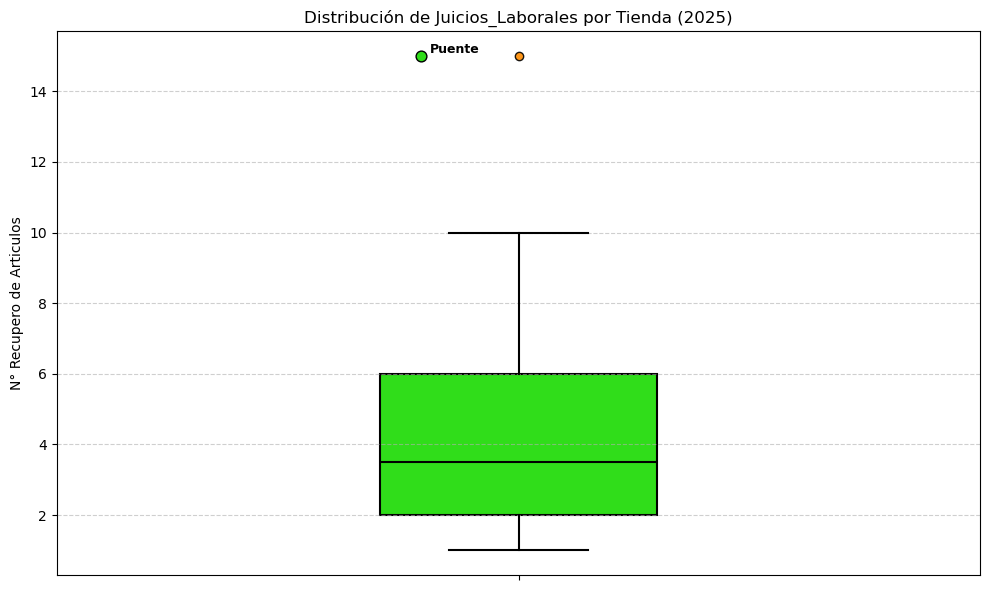

In [20]:
print("\n" + "="*60)
print("ANÁLISIS DESCRIPTIVO: Juicios_Laborales")
print("="*60)

try:
    variable_a_analizar_juicios_laborales = 'Juicios_Laborales'
    columna_sucursal = 'Nombre_Sucursal'

    if variable_a_analizar_juicios_laborales not in Juicios_Division_2025_final.columns:
        raise KeyError(variable_a_analizar_juicios_laborales)

    # Estadísticas descriptivas
    desc_juicios_laborales = Juicios_Division_2025_final[variable_a_analizar_juicios_laborales].describe()
    print(f"\n--- Estadísticas de '{variable_a_analizar_juicios_laborales}' ---")
    print(f"Count: {desc_juicios_laborales['count']:.0f}")
    print(f"Mean: {desc_juicios_laborales['mean']:.2%}")
    print(f"Std: {desc_juicios_laborales['std']:.2%}")
    print(f"Min: {desc_juicios_laborales['min']:.2%}")
    print(f"25%: {desc_juicios_laborales['25%']:.2%}")
    print(f"50% (Median): {desc_juicios_laborales['50%']:.2%}")
    print(f"75%: {desc_juicios_laborales['75%']:.2%}")
    print(f"Max: {desc_juicios_laborales['max']:.2%}")

    print(f"\nTop 5 por '{variable_a_analizar_juicios_laborales}':")
    top5 = Juicios_Division_2025_final.nlargest(5, variable_a_analizar_juicios_laborales)[[columna_sucursal, variable_a_analizar_juicios_laborales]]
    print(top5.to_string(index=False))

    print(f"\nBottom 5 por '{variable_a_analizar_juicios_laborales}':")
    bottom5 = Juicios_Division_2025_final.nsmallest(5, variable_a_analizar_juicios_laborales)[[columna_sucursal, variable_a_analizar_juicios_laborales]]
    print(bottom5.to_string(index=False))

    # Detección de outliers por IQR
    Q1_juicios_laborales = desc_juicios_laborales['25%']
    Q3_juicios_laborales = desc_juicios_laborales['75%']
    IQR_juicios_laborales = Q3_juicios_laborales - Q1_juicios_laborales
    lower_juicios_laborales = Q1_juicios_laborales - 1.5 * IQR_juicios_laborales
    upper_juicios_laborales = Q3_juicios_laborales + 1.5 * IQR_juicios_laborales
    outliers_juicios_laborales = Juicios_Division_2025_final[(Juicios_Division_2025_final[variable_a_analizar_juicios_laborales] < lower_juicios_laborales) | (Juicios_Division_2025_final[variable_a_analizar_juicios_laborales] > upper_juicios_laborales)].copy()

    print(f"\n  Q1: {Q1_juicios_laborales}")
    print(f"  Q3: {Q3_juicios_laborales}")
    print(f"  IQR: {IQR_juicios_laborales}")
    print(f"  Límite Inferior: {lower_juicios_laborales}")
    print(f"  Límite Superior: {upper_juicios_laborales}")

    if not outliers_juicios_laborales.empty:
        print(f"  Outliers detectados ({len(outliers_juicios_laborales)}):")
        # Mostrar el DataFrame de outliers correctamente (evitar crear una tupla)
        print(outliers_juicios_laborales[[columna_sucursal, variable_a_analizar_juicios_laborales]].to_string(index=False))
    else:
        print("  No se detectaron outliers.")

    # Boxplot y etiquetado de outliers
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(
        y=Juicios_Division_2025_final[variable_a_analizar_juicios_laborales],
        color='#FFA500',
        width=0.3,
        ax=ax,
        flierprops=dict(marker='o', markerfacecolor='#FF8C00', markeredgecolor='black', markersize=6, alpha=0.9),
        medianprops=dict(color='black'),
        boxprops=dict(facecolor='#30DD1A', edgecolor='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )
    # Formatear ticks del eje Y como enteros (con separador de miles)
    try:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{int(x):,}"))
    except Exception:
        # Fallback sencillo si algo falla en la conversión
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%g"))

    ax.set_title(f'Distribución de {variable_a_analizar_juicios_laborales} por Tienda (2025)')
    ax.set_ylabel('N° Recupero de Articulos')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    if not outliers_juicios_laborales.empty:
        y_vals = outliers_juicios_laborales[variable_a_analizar_juicios_laborales].values
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
        ax.scatter(x_jitter, y_vals, color="#30DD1A", zorder=5, s=60, edgecolor='black')
        for xi, yi, lbl in zip(x_jitter, y_vals, outliers_juicios_laborales[columna_sucursal].astype(str)):
            ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                        fontsize=9, weight='bold', color='black',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    plt.tight_layout()
    plt.show()
except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")


### 🧱 Procedemos a construir el DataFrame consolidado con todas las variables para su respectivo trabajo

In [21]:
# Consolidar todas las variables por sucursal
Df_Kmeans = Ventas_sucusal_2025.merge(
    Venta_Retail_2025[["Nombre_Sucursal", "venta_retail"]], on='Nombre_Sucursal', how='left'
).merge(
    Notas_Credito_Sucursal_2025[["Nombre_Sucursal", "Total_Notas_Credito"]], on='Nombre_Sucursal', how='left'
).merge(
    Reclamos_Sucursal_2025, on='Nombre_Sucursal', how='left'
).merge(
    Desviacion_Meta_Merma_2025, on='Nombre_Sucursal', how='left'
).merge(
    Merma_Destruccion_2025[['Nombre_Sucursal', 'Costo_Merma_Destruccion']], on='Nombre_Sucursal', how='left'
).merge(
    Accidentes_2025[['Nombre_Sucursal', 'N° Accidentes']], on='Nombre_Sucursal', how='left'
).merge(
    Descuento_Productos_Dañados_2025[['Nombre_Sucursal', 'Productos_Dañados_Descuento']], on='Nombre_Sucursal', how='left'
).merge(
    Multas_Sucursal_2025[["Nombre_Sucursal", "N° Multas"]], on="Nombre_Sucursal", how="left"
).merge(
    Actividad_Criminal_Sucursal_2025[['Nombre_Sucursal', 'N° Recuperos 2025']], on='Nombre_Sucursal', how='left'
).merge(
    Matriz_BHT[['Nombre_Sucursal', 'Indice BHT', "Indice Seguridad"]], on='Nombre_Sucursal', how='left'
).merge(
    Metros_Cuadrados[['Nombre_Sucursal', 'Mts. 2']], on='Nombre_Sucursal', how='left'
).merge(
    Rotacion_Personal[['Nombre_Sucursal', 'Rot_2025']], on='Nombre_Sucursal', how='left'
).merge(
    Juicios_Division_2025_final[['Nombre_Sucursal', 'Juicios_Laborales']], on='Nombre_Sucursal', how='left'
)
    

# Solo en caso de Multas Rellenamos los Valores Nulos con 0 
Sucursales_Sin_Multas = Df_Kmeans['N° Multas'].isnull().sum()
Df_Kmeans['N° Multas'] = Df_Kmeans['N° Multas'].fillna(0)
Df_Kmeans["Juicios_Laborales"] = Df_Kmeans["Juicios_Laborales"].fillna(0)
Df_Kmeans['N° Multas'] = Df_Kmeans['N° Multas'].astype(int)
Df_Kmeans['Juicios_Laborales'] = Df_Kmeans['Juicios_Laborales'].astype(int)

print(f"Se asignaron 0 multas a las {Sucursales_Sin_Multas} sucursales que no tenían registros.")

# Solo para el caso de Merma de Destruccion realizamos una aproximacion para mejor interpretacion y eliminar la notacion cientifica
Df_Kmeans['Costo_Merma_Destruccion'] = Df_Kmeans['Costo_Merma_Destruccion'].apply(lambda x: round(x, 2))
# Cambios el numero N° de Accidentes a Entero para una mejor lectura e interpretacion
Df_Kmeans['N° Accidentes'] = Df_Kmeans['N° Accidentes'].astype(int)

# Verificación rápida
print("✅ DataFrame Df_Kmeans construido con éxito. Vista previa:")
display(Df_Kmeans.head())


Se asignaron 0 multas a las 22 sucursales que no tenían registros.
✅ DataFrame Df_Kmeans construido con éxito. Vista previa:


Nombre_Sucursal  Total_Ventas  Total_Transacciones_Ventas  venta_retail  \
0     Antofagasta   12225941226                      262801  1.365925e+10   
1    Arauco Maipú    8261470852                      203774  9.811750e+09   
2           Arica    4293259111                      120657  4.055117e+09   
3       Castellón    6684447150                      172929  6.746875e+09   
4         Chillán    8418919439                      229856  1.035437e+10   

   Total_Notas_Credito  Total_Reclamos  Desviacion_Meta_Merma  \
0            270155106               5                 0.0037   
1            445783370               9                -0.0001   
2            105243768               8                 0.0007   
3            172889639               2                -0.0031   
4            339615984               9                 0.0006   

   Costo_Merma_Destruccion  N° Accidentes  Productos_Dañados_Descuento  \
0             -52372551.33             16                     56665208   
1             -26815074.52             40                      3078700   
2              -4336070.00              8                     10488116   
3             -18814280.81              8                      1564500   
4             -24601240.38             10                      2848150   

   N° Multas  N° Recuperos 2025  Indice BHT  Indice Seguridad  Mts. 2  \
0          6                138        0.69              0.49    9061   
1          0                358        0.65              0.81    6917   
2          2                 50        0.54              0.30    5000   
3          0                115        0.48              0.24    4311   
4          0                 59        0.57              0.13    5742   

   Rot_2025  Juicios_Laborales  
0  0.366013                  5  
1  0.353887                  5  
2  0.151786                  2  
3  0.153257                  4  
4  0.161383                  2

##### Habiendo creado el DataFrame consolidado con el que vamos a trabajar realizamos trabajo de Añadir Nuevas columnas para una mejor interpretacion tanto de Dañados por volumen de venta como la creacion de un Indice de Inseguridad

In [22]:
# --- 1) Ventas totales (si no la tienes, la reconstruimos con m²)
if 'Total_Ventas' in Df_Kmeans.columns:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Total_Ventas'], errors='coerce')
else:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Ventas / Mts. 2'], errors='coerce') * \
                         pd.to_numeric(Df_Kmeans['Mts. 2'], errors='coerce')

danados = pd.to_numeric(Df_Kmeans['Productos_Dañados_Descuento'], errors='coerce')

Df_Kmeans['Dañados_sobre_Ventas'] = (danados / ventas_total_proxy).replace([np.inf, -np.inf], np.nan)

# Winsorizar suave (1–99%) para que outliers extremos no dominen
q01, q99 = Df_Kmeans['Dañados_sobre_Ventas'].quantile([0.01, 0.99])
Df_Kmeans['Dañados_sobre_Ventas'] = Df_Kmeans['Dañados_sobre_Ventas'].clip(q01, q99)
Df_Kmeans['Dañados_sobre_Ventas'] = pd.to_numeric(Df_Kmeans['Dañados_sobre_Ventas'])

In [23]:
seg = pd.to_numeric(Df_Kmeans['Indice Seguridad'], errors='coerce')
seg01 = seg / 100.0 if seg.max() > 1.5 else seg
Df_Kmeans['Indice_Inseguridad'] = (1.0 - seg01).clip(0, 1)

In [24]:
Df_Kmeans['Ventas / Mts. 2'] = Df_Kmeans['Total_Ventas'] / Df_Kmeans['Mts. 2']
Df_Kmeans["Indice Merma de Destruccion"] = Df_Kmeans["Costo_Merma_Destruccion"] / Df_Kmeans["venta_retail"] * 100

In [25]:
# 1) división segura (evita div/0 y tipos)
den = Df_Kmeans["Total_Ventas"].astype(float)
num = Df_Kmeans["Total_Notas_Credito"].astype(float)

ratio = np.divide(num, den, out=np.full_like(num, np.nan, dtype=float), where=den>0)

# 2) limpiar valores imposibles
ratio[~np.isfinite(ratio)] = np.nan          # inf / -inf -> NaN
ratio[ratio < 0] = np.nan                    # NC negativas no deberían existir

# 3) winsorizar leve (estabiliza K-Means sin “aplanar” la señal)
p99 = np.nanpercentile(ratio, 99)
ratio = np.clip(ratio, 0, p99)

# 4) imputación simple (si necesitas cero para faltantes)
ratio = np.nan_to_num(ratio, nan=0.0)

Df_Kmeans["NC / Ventas"] = ratio

#### Realizamos Matriz de Correlacion para observar como se comportan

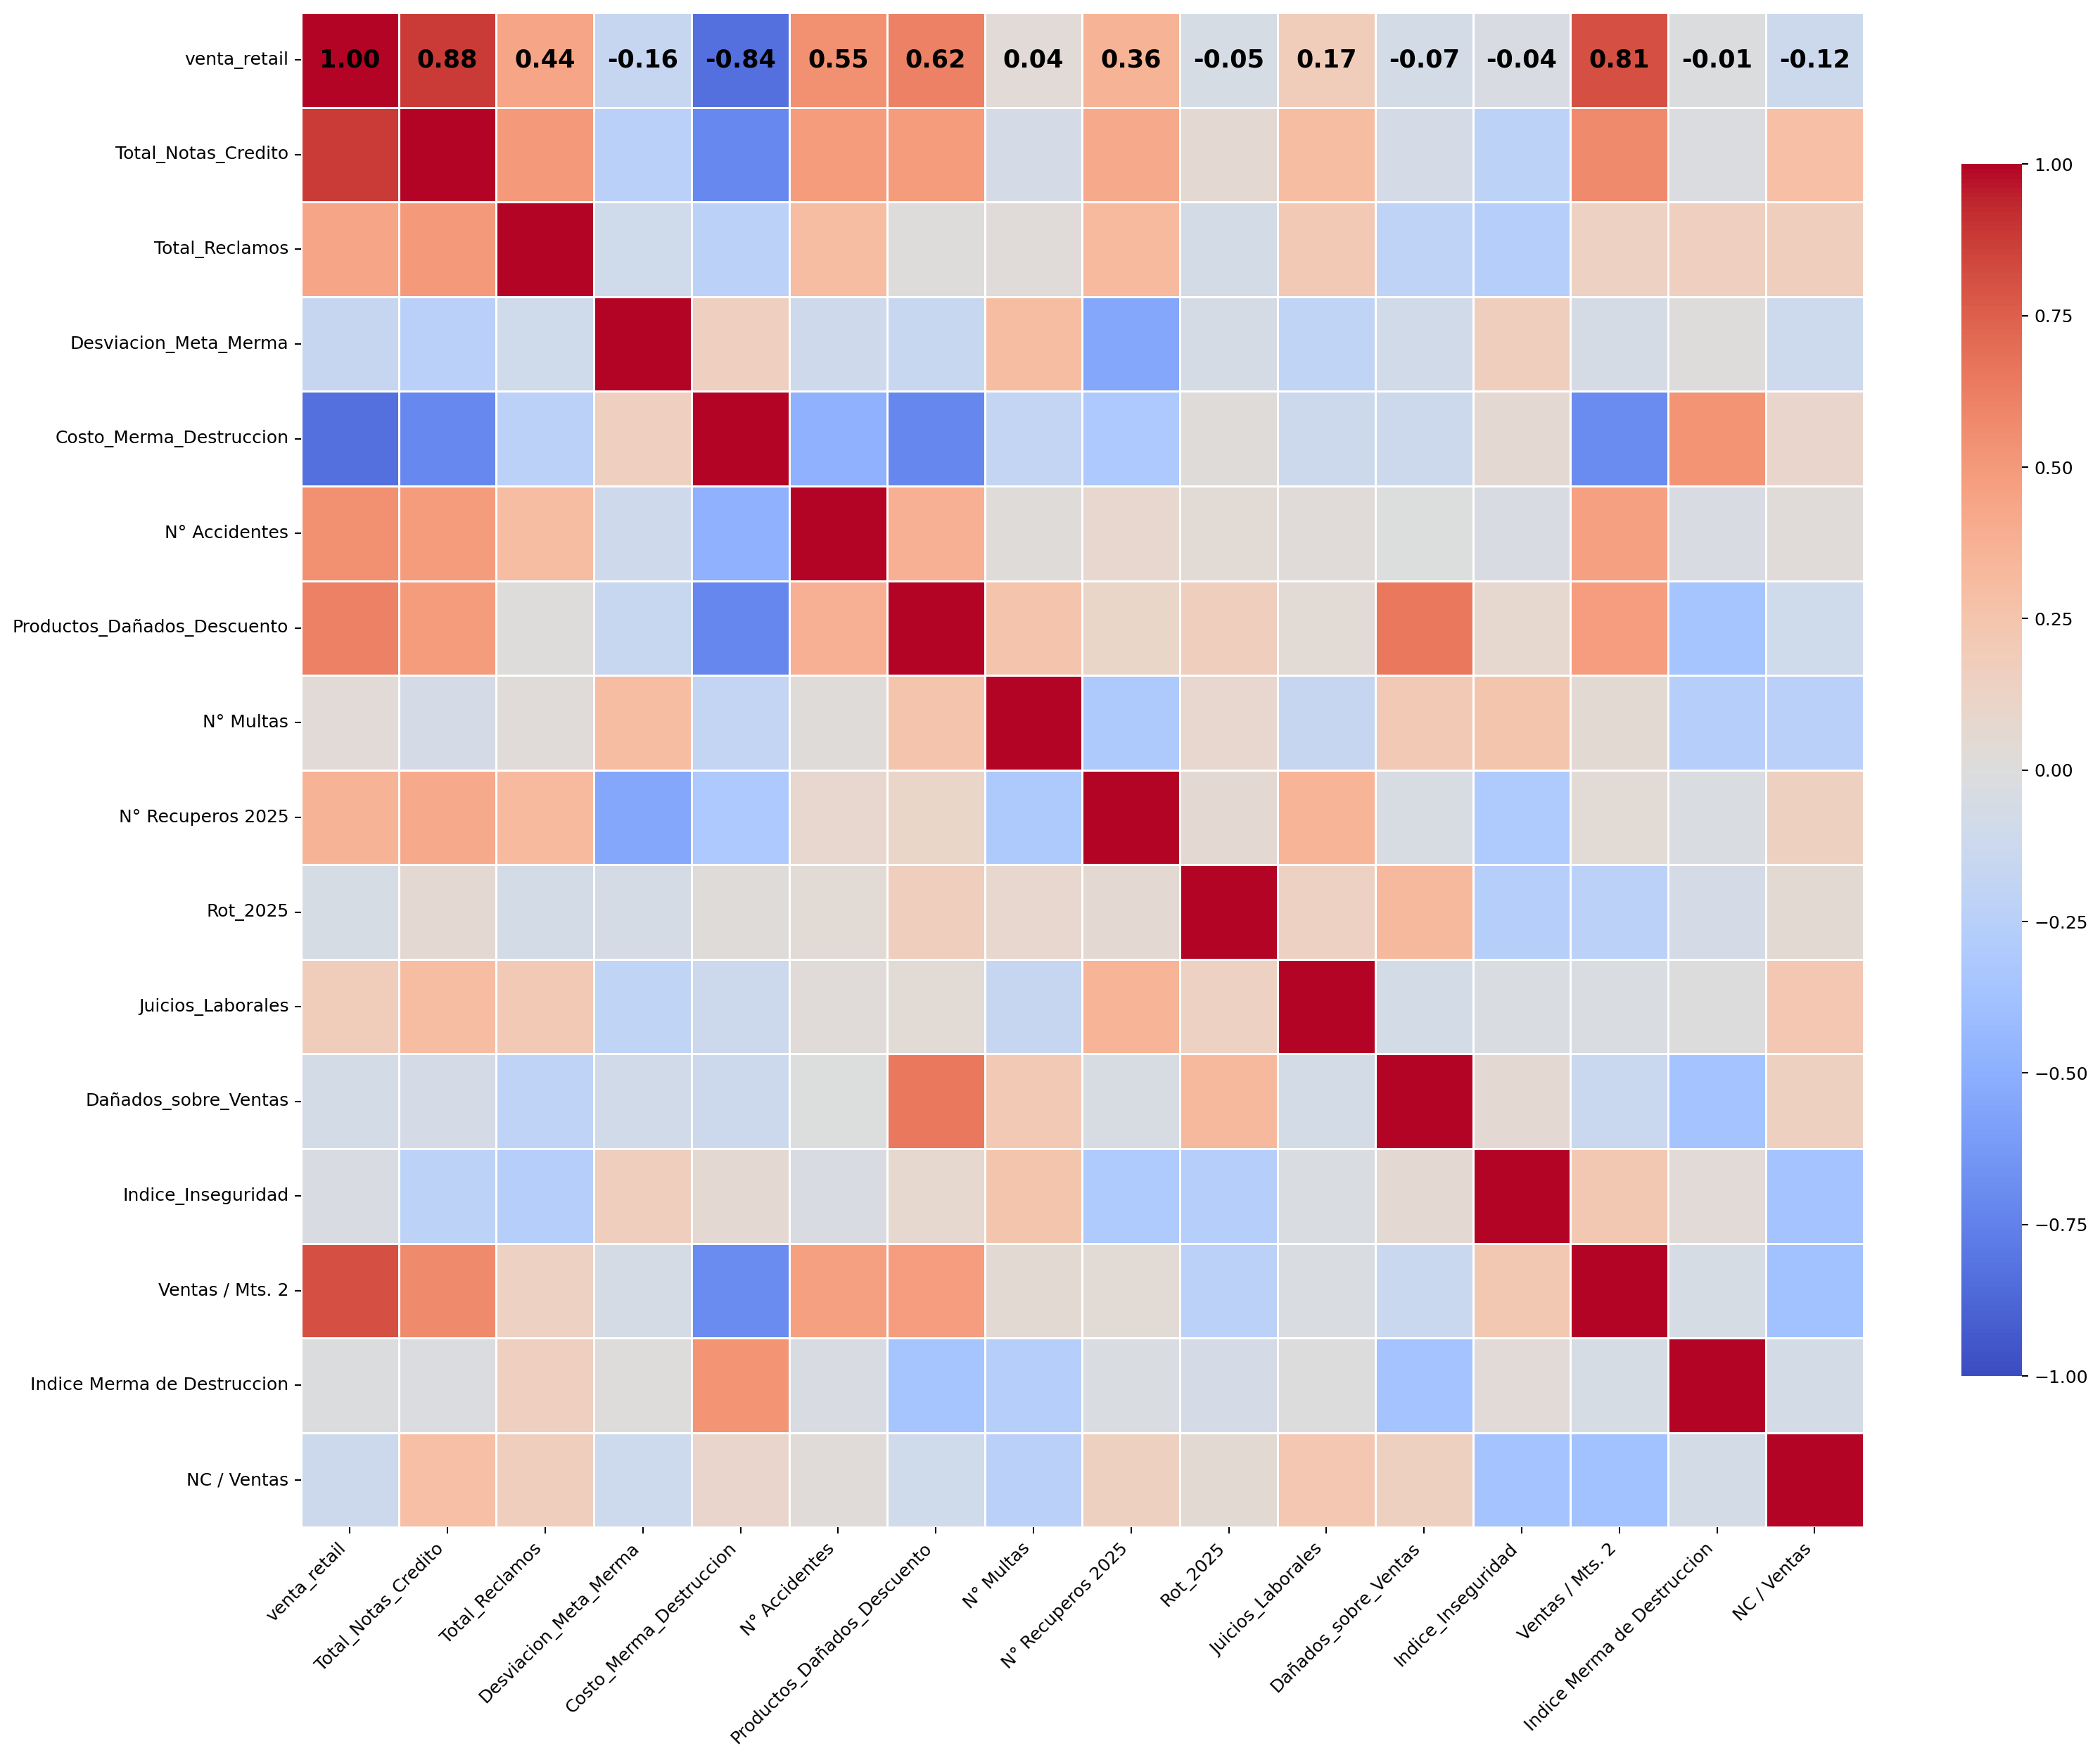

In [26]:
variables_numericas = Df_Kmeans.drop(
    columns=['Nombre_Sucursal', "Total_Ventas","Total_Transacciones_Ventas", "Total_Transacciones_Ventas",'Indice BHT','Indice Seguridad','Mts. 2'],
    errors='ignore'
).select_dtypes(include=[np.number])

corr = variables_numericas.corr()

plt.figure(figsize=(18, 14), dpi=180)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    annot=True, fmt='.2f',
    linewidths=.5,
    cbar_kws={'shrink': .8},
    annot_kws={'size':14, 'color':'black', 'weight':'bold'}  # 👈 fuerza color/tamaño
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


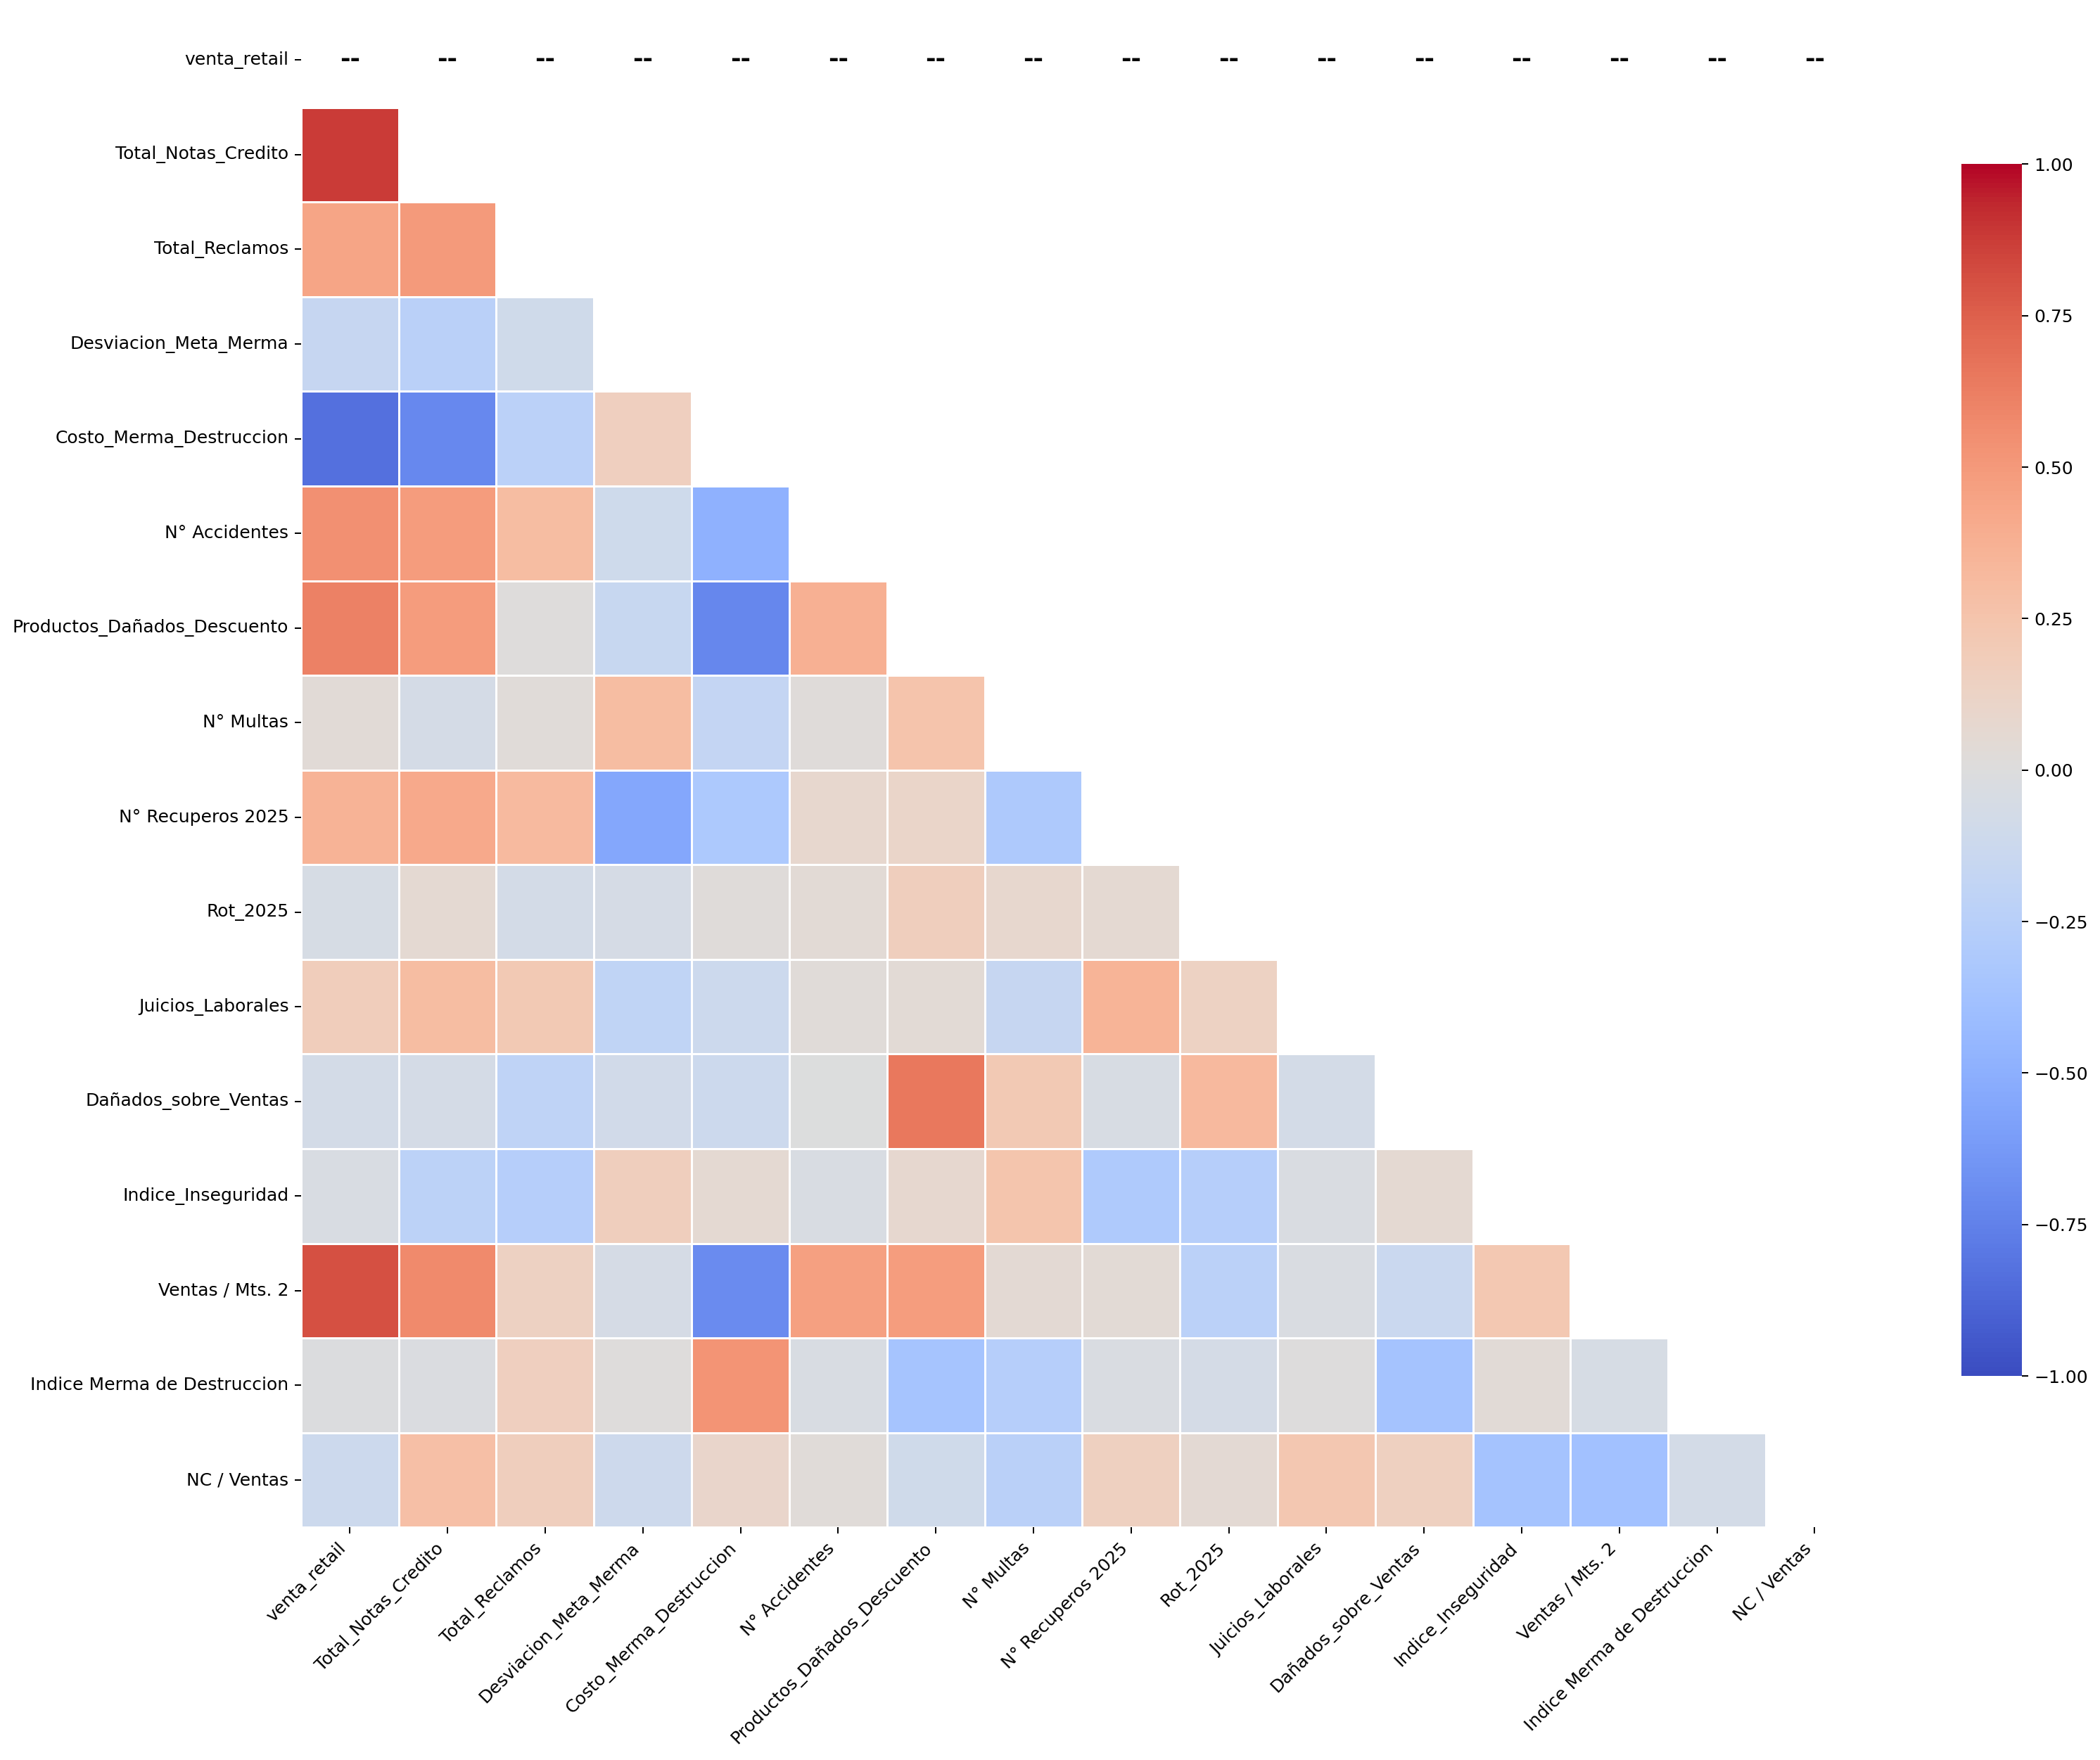

In [27]:
corr = variables_numericas.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo superior

plt.figure(figsize=(18, 14), dpi=180)
sns.heatmap(
    corr, mask=mask,
    vmin=-1, vmax=1, center=0, cmap='coolwarm',
    annot=True, fmt='.2f', linewidths=.5,
    cbar_kws={'shrink': .8},
    annot_kws={'size':14, 'color':'black', 'weight':'bold'}
)
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

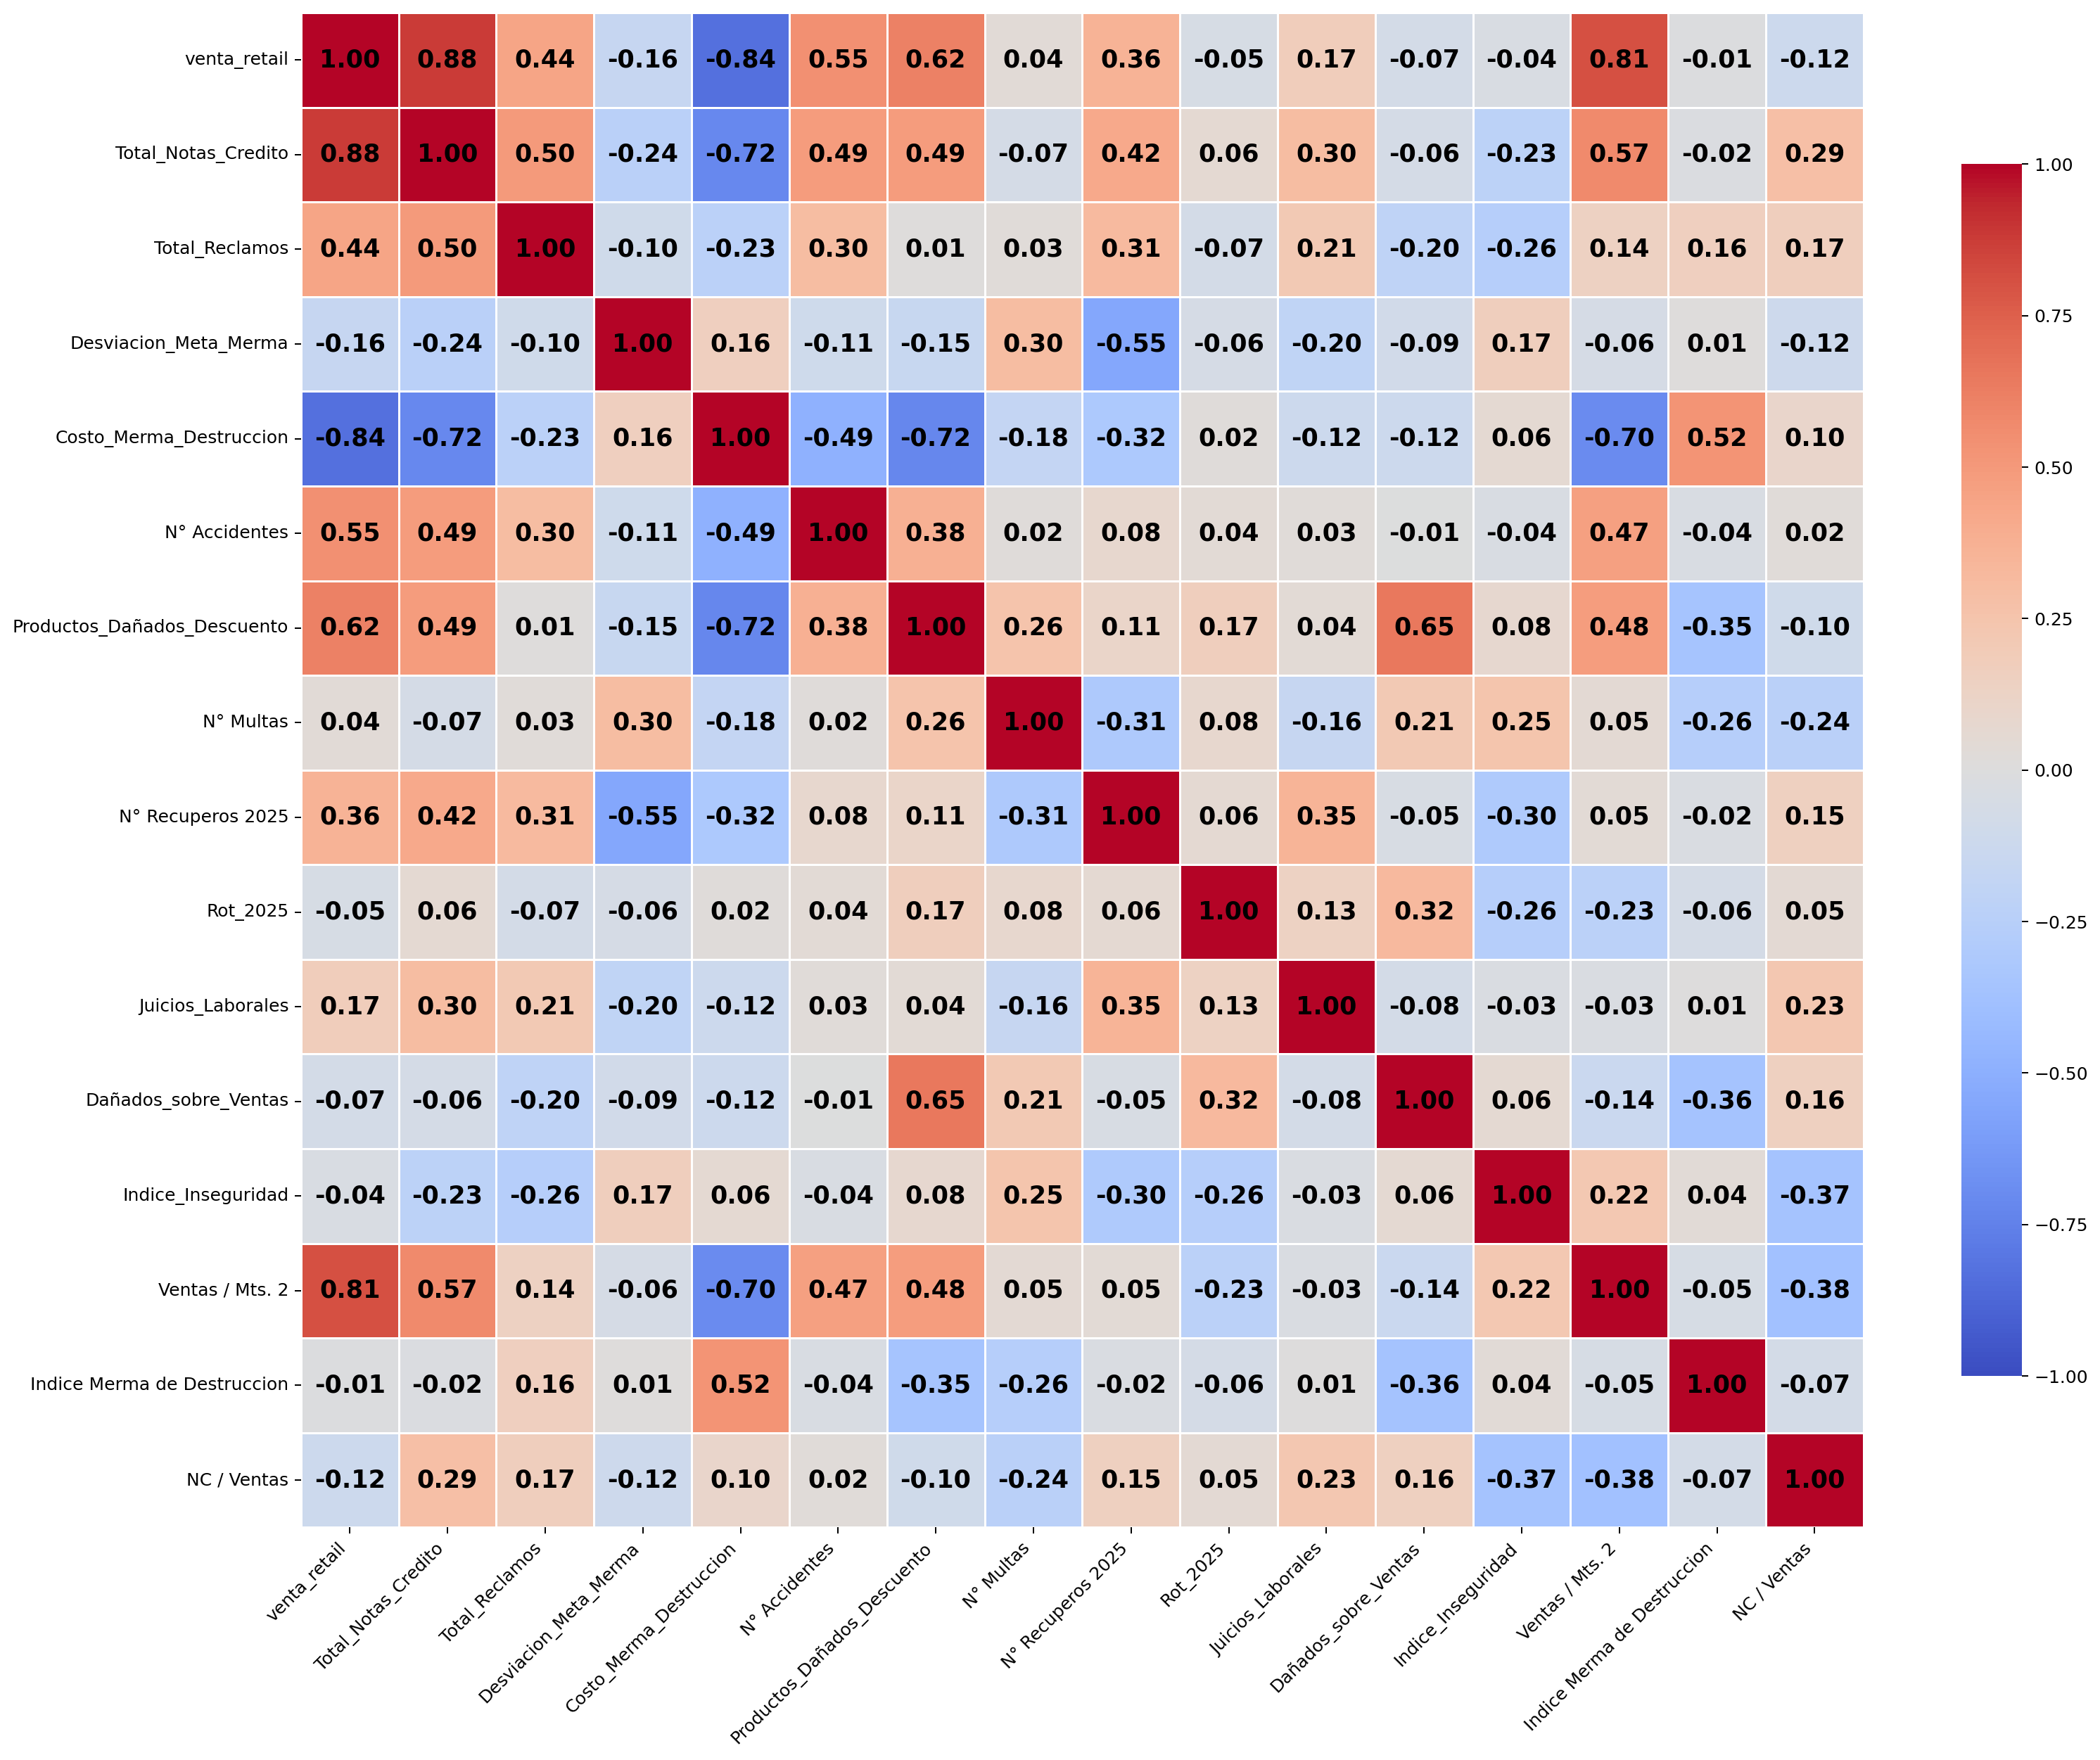

In [28]:
corr = variables_numericas.corr()

plt.figure(figsize=(18, 14), dpi=180)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=.5, cbar_kws={'shrink': .8})
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j+0.5, i+0.5, f"{val:.2f}", ha='center', va='center', color='black', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

In [29]:

from scipy.stats import chi2

# Parámetros de "adecuación"
cv_min = 0.01      # 1%: umbral mínimo de CV recomendado (ajústalo si quieres)
unique_min = 0.05  # 5%: mínimo de % de valores únicos (para evitar variables casi constantes)
exclude_cols = {"Nombre_Sucursal"}  # puedes añadir columnas tipo cluster/categóricas si quieres

# Selección de columnas numéricas útiles
num_cols = [c for c in Df_Kmeans.select_dtypes(include=[np.number]).columns if c not in exclude_cols]
# (Opcional) Excluir etiquetas de cluster si están como números:
num_cols = [c for c in num_cols if "cluster" not in c.lower()]

def evaluar_variable(s: pd.Series, cv_min: float, unique_min: float):
    x = pd.to_numeric(s, errors="coerce").dropna().values
    n = len(x)
    if n < 5:
        return {
            "n": n, "std": np.nan, "CV": np.nan, "%Únicos": np.nan,
            "p-valor_var_mín": np.nan, "Adecuada": False, "Motivo": "Muy pocos datos"
        }

    mean = float(np.mean(x))
    std = float(np.std(x, ddof=1))
    cv = (std / abs(mean)) if abs(mean) > 1e-12 else np.nan  # CV inestable si media≈0
    perc_unique = (pd.Series(x).nunique() / n)

    # Regla near-zero variance (heurística)
    near_zero = (std <= 1e-12) or (perc_unique < unique_min)

    # Test de varianza (H0: sigma^2 = (cv_min*|mean|)^2  vs  H1: sigma^2 < ...)
    # Si mean≈0, el CV no es útil. En ese caso, fijamos una sigma0 mínima absoluta.
    if abs(mean) > 1e-12:
        sigma0 = cv_min * abs(mean)
    else:
        # mínima varianza absoluta aceptable cuando la media ≈ 0 (ajústalo si quieres)
        sigma0 = 1e-6 * np.nanmax([abs(np.median(x)), 1.0])

    # Estadístico chi-cuadrado
    chi_stat = (n - 1) * (std ** 2) / (sigma0 ** 2)
    p_small_var = chi2.cdf(chi_stat, df=(n - 1))  # cola inferior: var < var0

    # Decisión: adecuada si NO es near-zero y p_small_var >= 0.05
    adecuada = (not near_zero) and (p_small_var >= 0.05)

    motivo = []
    if near_zero:
        motivo.append("Near-zero variance")
    if p_small_var < 0.05:
        motivo.append("Varianza < mínima (test)")
    if not motivo:
        motivo = ["OK"]
    else:
        motivo = [", ".join(motivo)]

    return {
        "n": n, "std": std, "CV": cv, "%Únicos": perc_unique,
        "p-valor_var_mín": p_small_var,
        "Adecuada": adecuada, "Motivo": motivo[0]
    }

filas = []
for col in num_cols:
    res = evaluar_variable(Df_Kmeans[col], cv_min=cv_min, unique_min=unique_min)
    filas.append({
        "Variable": col,
        "n": res["n"],
        "std": res["std"],
        "CV": res["CV"],
        "%Únicos": res["%Únicos"],
        "p-valor": res["p-valor_var_mín"],
        "Adecuada": res["Adecuada"],
        "Motivo": res["Motivo"],
    })

tabla_var = pd.DataFrame(filas)
# Formato bonito
tabla_var["std"] = tabla_var["std"].map(lambda v: f"{v:.4g}" if pd.notna(v) else "")
tabla_var["CV"] = tabla_var["CV"].map(lambda v: f"{v:.4f}" if pd.notna(v) else "")
tabla_var["%Únicos"] = (tabla_var["%Únicos"]*100).map(lambda v: f"{v:.1f}%" if pd.notna(v) else "")
tabla_var["p-valor"] = tabla_var["p-valor"].map(lambda v: f"{v:.4f}" if pd.notna(v) else "")
tabla_var = tabla_var.sort_values(["Adecuada","p-valor"], ascending=[False, True]).reset_index(drop=True)
tabla_var


Variable   n        std        CV %Únicos p-valor  \
0                  Total_Ventas  43  5.955e+09    0.5797   97.7%  1.0000   
1    Total_Transacciones_Ventas  43  9.886e+04    0.4143   97.7%  1.0000   
2                  venta_retail  43  5.387e+09    0.4946   97.7%  1.0000   
3           Total_Notas_Credito  43  1.839e+08    0.5802   97.7%  1.0000   
4                Total_Reclamos  43      10.35    0.9594   44.2%  1.0000   
5         Desviacion_Meta_Merma  43   0.002645  227.4975   88.4%  1.0000   
6       Costo_Merma_Destruccion  43  1.463e+07    0.5675   97.7%  1.0000   
7                 N° Accidentes  43      10.09    0.4862   58.1%  1.0000   
8   Productos_Dañados_Descuento  43  1.682e+07    0.9755   97.7%  1.0000   
9                     N° Multas  43      1.295    1.4652   11.6%  1.0000   
10            N° Recuperos 2025  43      261.3    1.1169   95.3%  1.0000   
11                   Indice BHT  43     0.1609    0.2897   67.4%  1.0000   
12             Indice Seguridad  43     0.2892    0.5953   79.1%  1.0000   
13                       Mts. 2  43       2314    0.3069   93.0%  1.0000   
14                     Rot_2025  43      0.103    0.4195  100.0%  1.0000   
15            Juicios_Laborales  43      3.217    0.8646   25.6%  1.0000   
16         Dañados_sobre_Ventas  43   0.001632    0.9516   97.7%  1.0000   
17           Indice_Inseguridad  43     0.2892    0.5625   79.1%  1.0000   
18              Ventas / Mts. 2  43  5.201e+05    0.3876   97.7%  1.0000   
19  Indice Merma de Destruccion  43    0.07338    0.3108   97.7%  1.0000   
20                  NC / Ventas  43    0.01083    0.3403   97.7%  1.0000   

    Adecuada Motivo  
0       True     OK  
1       True     OK  
2       True     OK  
3       True     OK  
4       True     OK  
5       True     OK  
6       True     OK  
7       True     OK  
8       True     OK  
9       True     OK  
10      True     OK  
11      True     OK  
12      True     OK  
13      True     OK  
14      True     OK  
15      True     OK  
16      True     OK  
17      True     OK  
18      True     OK  
19      True     OK  
20      True     OK

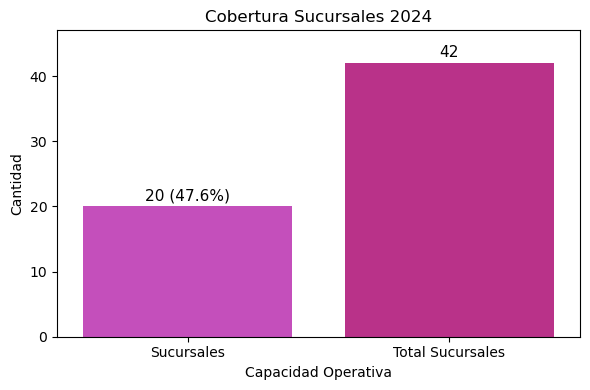

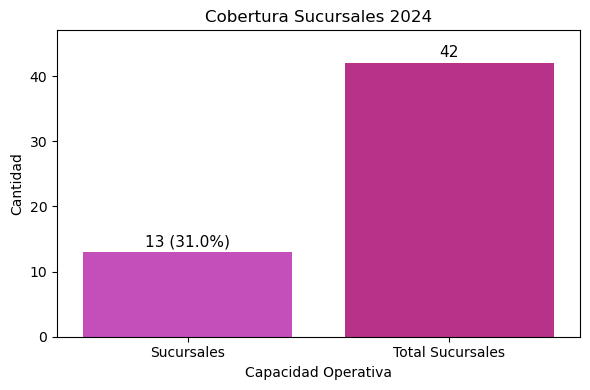

In [30]:
Cobertura_2024 = pd.read_excel("Correlativos informes 2024 (1).xlsx",
                               sheet_name="Hoja1", header=1,
                               usecols=range(1, 9),
                               index_col=0
                                )  

Cobertura_2024 = Cobertura_2024[Cobertura_2024["Tipo"] == "AT"].copy()
Cobertura_2024["Sucursales"] = Cobertura_2024["Nombre Revisión"]

n_nombre_revision = Cobertura_2024["Sucursales"].dropna().nunique() 
total_sucursales = 42  

pct = n_nombre_revision / total_sucursales if total_sucursales and total_sucursales > 0 else 0
pct_str = f"{pct*100:.1f}%"  

# construir DataFrame para graficar
Cobertura_2024 = pd.DataFrame({
    "Capacidad Operativa": ["Sucursales", "Total Sucursales"],
    "Cantidad": [int(n_nombre_revision), int(total_sucursales)]
})



plt.figure(figsize=(6,4))
sns.barplot(data=Cobertura_2024, x="Capacidad Operativa", y="Cantidad", palette=["#d83bcb","#cf1c90"])
for i, v in enumerate(Cobertura_2024["Cantidad"]):
    if Cobertura_2024.loc[i, "Capacidad Operativa"] == "Sucursales":
        label = f"{v} ({pct_str})"
    else:
        label = str(v)
    plt.text(i, v + total_sucursales*0.01, label, ha="center", va="bottom", fontsize=11)

plt.ylim(0, total_sucursales * 1.12)
plt.title("Cobertura Sucursales 2024")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

Cobertura_2025 = pd.read_excel("Avance Plan 2025.xlsx", sheet_name="Avance Plan 2025 CL Agosto", header=20, index_col=0)
Cobertura_2025 = Cobertura_2025[Cobertura_2025["Tipo"] == "Tienda"].copy()

Cobertura_2025["Sucursales"] = Cobertura_2025["Auditoría"]
Cobertura_2025.dropna(subset=["Sucursales"], inplace=True)

n_nombre_revision_2025 = Cobertura_2025["Sucursales"].dropna().nunique() 
total_sucursales = 42  

pct_2025 = n_nombre_revision_2025 / total_sucursales if total_sucursales and total_sucursales > 0 else 0
pct_str_2025 = f"{pct_2025*100:.1f}%"  

# construir DataFrame para graficar
Cobertura_2025 = pd.DataFrame({
    "Capacidad Operativa": ["Sucursales", "Total Sucursales"],
    "Cantidad": [int(n_nombre_revision_2025), int(total_sucursales)]
})



plt.figure(figsize=(6,4))
sns.barplot(data=Cobertura_2025, x="Capacidad Operativa", y="Cantidad", palette=["#d83bcb","#cf1c90"])
for i, v in enumerate(Cobertura_2025["Cantidad"]):
    # añadir porcentaje sólo junto al valor de "Sucursales"
    if Cobertura_2025.loc[i, "Capacidad Operativa"] == "Sucursales":
        label = f"{v} ({pct_str_2025})"
    else:
        label = str(v)
    plt.text(i, v + total_sucursales*0.01, label, ha="center", va="bottom", fontsize=11)

plt.ylim(0, total_sucursales * 1.12)
plt.title("Cobertura Sucursales 2024")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

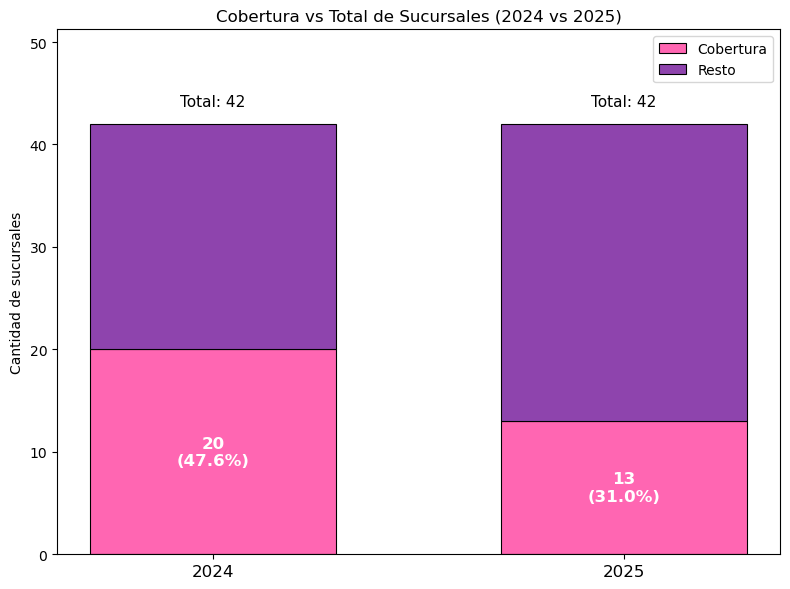

In [31]:
total_sucursales = 42

# preparar valores
covered = np.array([int(n_nombre_revision), int(n_nombre_revision_2025)])
remaining = total_sucursales - covered
years = ['2024', '2025']
x = np.arange(len(years))
width = 0.6

# colores: rosado y morado
colors = ['#ff66b2', '#8e44ad']  

fig, ax = plt.subplots(figsize=(8,6))  
# barra apilada: covered abajo, remaining arriba
bars_cov = ax.bar(x, covered, width=width, color=colors[0], edgecolor='black', linewidth=0.8, label='Cobertura')
bars_rem = ax.bar(x, remaining, width=width, bottom=covered, color=colors[1], edgecolor='black', linewidth=0.8, label='Resto')

# anotaciones: valor + % dentro de la sección 'covered' y total por encima
for i in range(len(years)):
    cov = covered[i]
    pct = cov / total_sucursales if total_sucursales>0 else 0
    pct_str = f"{pct*100:.1f}%"
    # etiqueta dentro del segmento covered (centrada)
    ax.text(x[i], cov/2, f"{cov}\n({pct_str})", ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    # total por encima de la barra (separado para que no lo tape la nomenclatura)
    ax.text(x[i], total_sucursales + total_sucursales*0.035, f"Total: {total_sucursales}", ha='center', va='bottom', fontsize=11, color='black')

ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)
ax.set_ylim(0, total_sucursales * 1.22)
ax.set_ylabel('Cantidad de sucursales')
ax.set_title('Cobertura vs Total de Sucursales (2024 vs 2025)')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


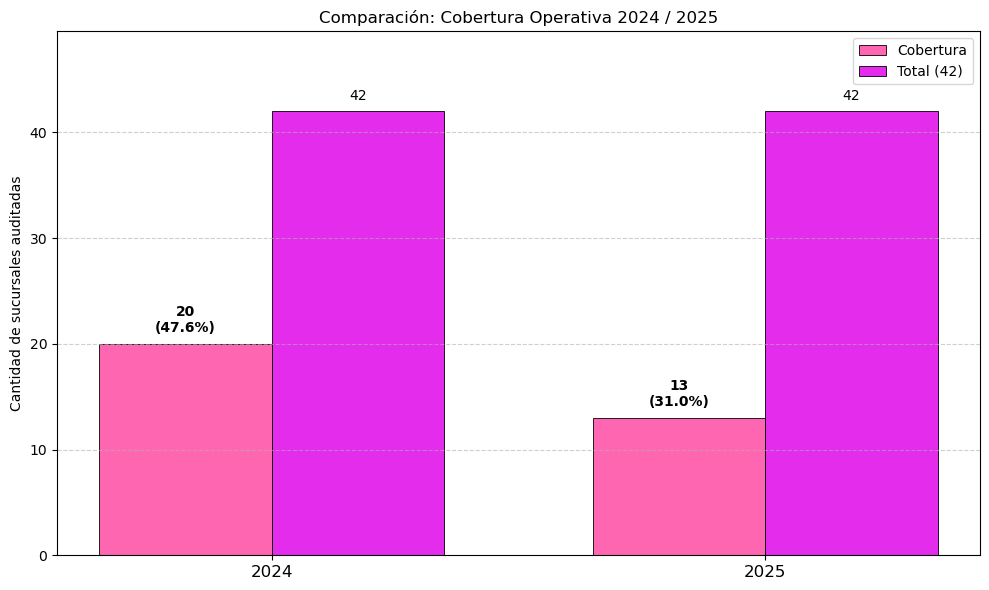

In [32]:
try:
    df = df_comparacion_cobertura.copy()
except NameError:
    try:
        cov2024 = int(n_nombre_revision)
        cov2025 = int(n_nombre_revision_2025)
        total_sucursales = int(total_sucursales)
    except NameError:
        Cob2024 = pd.read_excel("Correlativos informes 2024 (1).xlsx", sheet_name="Hoja1", header=1, usecols=range(1,9), index_col=0)
        Cob2024 = Cob2024[ Cob2024["Tipo"]=="AT" ].copy()
        cov2024 = Cob2024["Nombre Revisión"].dropna().nunique()
        Cob2025 = pd.read_excel("Avance Plan 2025.xlsx", sheet_name="Avance Plan 2025 CL Agosto", header=20, index_col=0)
        Cob2025 = Cob2025[ Cob2025["Tipo"]=="Tienda" ].copy()
        cov2025 = Cob2025["Auditoría"].dropna().nunique()
        total_sucursales = 42

    df = pd.DataFrame({
        "Año": ["2024", "2025"],
        "Cobertura": [int(cov2024), int(cov2025)],
        "Total": [int(total_sucursales), int(total_sucursales)]
    })

# Preparar datos para barras agrupadas
years = df["Año"].tolist()
cov = df["Cobertura"].values

# 'Total' puede no existir; buscar alternativas y tener un fallback razonable
if "Total" in df.columns:
    tot = np.array(df["Total"].values, dtype=float)
elif "Total_Sucursales" in df.columns:
    tot = np.array(df["Total_Sucursales"].values, dtype=float)
else:
    # si no hay columna, usar la variable total_sucursales si está disponible, o 42
    fallback_total = globals().get("total_sucursales", 42)
    tot = np.full(len(df), int(fallback_total), dtype=float)

x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

color_cov = "#ff66b2"    # rosa para cobertura
color_tot = "#e32cec"    # gris para total (constante 42)

bars_cov = ax.bar(x - width/2, cov, width, label="Cobertura", color=color_cov, edgecolor="k", linewidth=0.6)
bars_tot = ax.bar(x + width/2, tot, width, label=f"Total ({int(tot[0])})" if len(tot)>0 else "Total", color=color_tot, edgecolor="k", linewidth=0.6)

# Anotar valores: cobertura con valor + %, total solo valor
for i in range(len(years)):
    # Cobertura: mostrar valor y porcentaje relativo al total (proteger división por 0)
    pct = (cov[i] / tot[i] * 100) if (tot[i] is not None and tot[i] > 0) else 0
    ax.text(x[i] - width/2, cov[i] + 0.8, f"{int(cov[i])}\n({pct:.1f}%)", ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")
    # Total: mostrar el número total encima
    ax.text(x[i] + width/2, tot[i] + 0.8, f"{int(tot[i])}", ha="center", va="bottom", fontsize=10, color="black")

ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)

# Ajustar límite superior del eje Y según los datos disponibles (más robusto que usar sólo total_sucursales)
ymax_candidate = int(max(np.nanmax(tot), globals().get("total_sucursales", 42)))
ax.set_ylim(0, ymax_candidate * 1.18)

ax.set_ylabel("Cantidad de sucursales auditadas", fontsize=10)
ax.set_title("Comparación: Cobertura Operativa 2024 / 2025", fontsize=12)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()



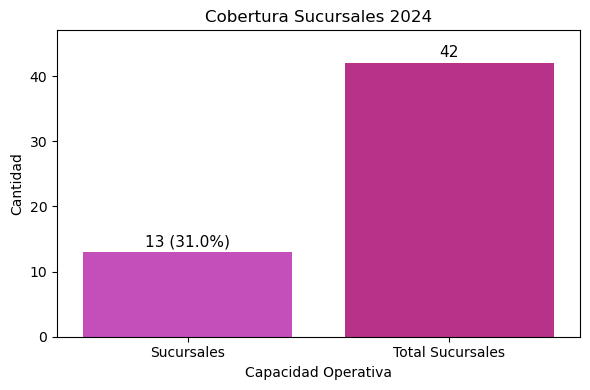

In [33]:
Cobertura_2025 = pd.read_excel("Avance Plan 2025.xlsx", sheet_name="Avance Plan 2025 CL Agosto", header=20, index_col=0)
Cobertura_2025 = Cobertura_2025[Cobertura_2025["Tipo"] == "Tienda"].copy()

Cobertura_2025["Sucursales"] = Cobertura_2025["Auditoría"]
Cobertura_2025.dropna(subset=["Sucursales"], inplace=True)

n_nombre_revision_2025 = Cobertura_2025["Sucursales"].dropna().nunique() 
total_sucursales = 42  

pct_2025 = n_nombre_revision_2025 / total_sucursales if total_sucursales and total_sucursales > 0 else 0
pct_str_2025 = f"{pct_2025*100:.1f}%"  

Cobertura_2025 = pd.DataFrame({
    "Capacidad Operativa": ["Sucursales", "Total Sucursales"],
    "Cantidad": [int(n_nombre_revision_2025), int(total_sucursales)]
})



plt.figure(figsize=(6,4))
sns.barplot(data=Cobertura_2025, x="Capacidad Operativa", y="Cantidad", palette=["#d83bcb","#cf1c90"])
for i, v in enumerate(Cobertura_2025["Cantidad"]):
    if Cobertura_2025.loc[i, "Capacidad Operativa"] == "Sucursales":
        label = f"{v} ({pct_str_2025})"
    else:
        label = str(v)
    plt.text(i, v + total_sucursales*0.01, label, ha="center", va="bottom", fontsize=11)

plt.ylim(0, total_sucursales * 1.12)
plt.title("Cobertura Sucursales 2024")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()


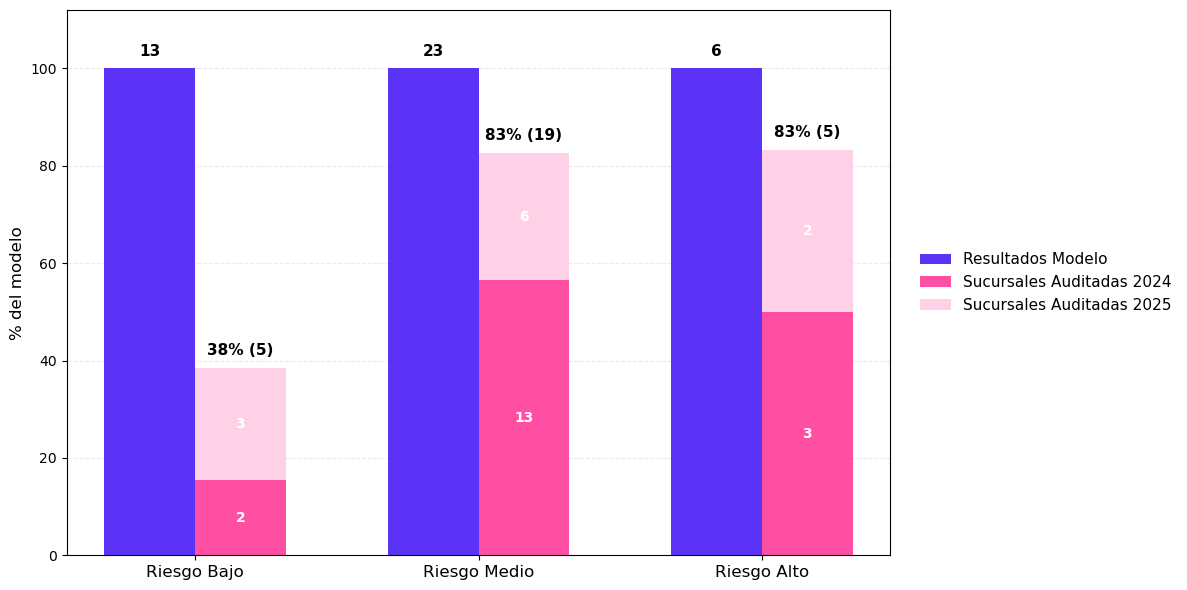

In [34]:


# --- Datos actualizados ---
cats = ["Riesgo Bajo", "Riesgo Medio", "Riesgo Alto"]

modelo_n   = np.array([13, 23, 6])
aud_2024_n = np.array([ 2, 13, 3])     
aud_2025_n = np.array([ 3,  6, 2])     

# % sobre el modelo
aud_2024_pct = np.divide(aud_2024_n, modelo_n, out=np.zeros_like(aud_2024_n, dtype=float), where=modelo_n!=0)*100
aud_2025_pct = np.divide(aud_2025_n, modelo_n, out=np.zeros_like(aud_2025_n, dtype=float), where=modelo_n!=0)*100
aud_tot_pct  = aud_2024_pct + aud_2025_pct
aud_tot_n    = aud_2024_n + aud_2025_n

# --- Estética ---
c_modelo = "#5B33F6"      
c_2024   = "#FF4FA3"      
c_2025   = "#FFD1E6"      
SHOW_PCT_TOP = True        

x = np.arange(len(cats))
w = 0.32

fig, ax = plt.subplots(figsize=(12,6))

# 1) Barra del modelo (100%)
b_model = ax.bar(x - w/2, 100, width=w, color=c_modelo, label="Resultados Modelo", zorder=2)

# 2) Barra apilada (auditadas 2024 + 2025)
b_2024 = ax.bar(x + w/2, aud_2024_pct, width=w, color=c_2024,   label="Sucursales Auditadas 2024", zorder=2)
b_2025 = ax.bar(x + w/2, aud_2025_pct, width=w, bottom=aud_2024_pct, color=c_2025,
                label="Sucursales Auditadas 2025", zorder=2)

# Etiquetas: N del modelo encima de barra violeta
for rect, n in zip(b_model, modelo_n):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, f"{n}",
            ha="center", va="bottom", fontsize=11, fontweight="bold")

# Etiquetas dentro de cada segmento (solo el número), en blanco
def label_inside(bar_container, values, bottoms=None):
    for i, rect in enumerate(bar_container):
        h = rect.get_height()
        if h <= 0: 
            continue
        y = (bottoms[i] if bottoms is not None else 0) + h/2
        ax.text(rect.get_x()+rect.get_width()/2, y, f"{int(values[i])}",
                ha="center", va="center", color="white", fontsize=10, fontweight="bold")

label_inside(b_2024, aud_2024_n)
label_inside(b_2025, aud_2025_n, bottoms=aud_2024_pct)

# % total arriba de la barra apilada
if SHOW_PCT_TOP:
    for i in range(len(cats)):
        ax.text(x[i] + w/2, aud_tot_pct[i] + 2, f"{aud_tot_pct[i]:.0f}% ({aud_tot_n[i]})",
                ha="center", va="bottom", fontsize=11, fontweight="bold")

# Ejes y leyenda
ax.set_xticks(x)
ax.set_xticklabels(cats, fontsize=12)
ax.set_ylabel("% del modelo", fontsize=12)
ax.set_ylim(0, 112)
ax.grid(axis="y", alpha=0.25, linestyle="--", zorder=1)

# Leyenda a la derecha
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=11)

plt.tight_layout()
plt.show()



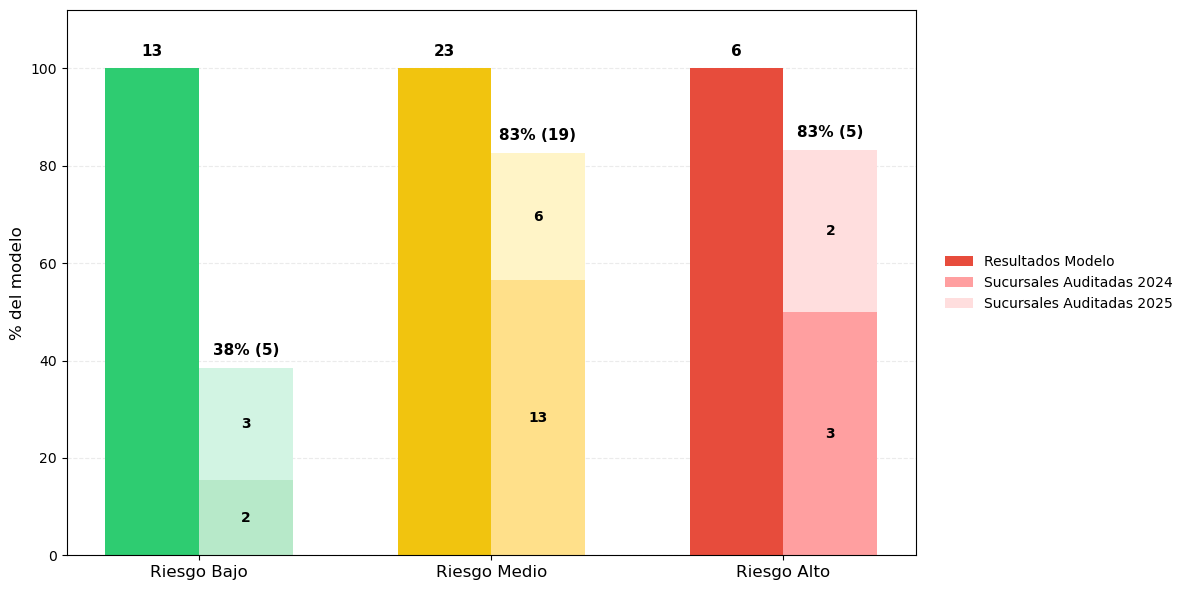

In [35]:


# --- Datos ---
cats = ["Riesgo Bajo", "Riesgo Medio", "Riesgo Alto"]

modelo_n   = np.array([13, 23, 6])     
aud_2024_n = np.array([ 2, 13, 3])     
aud_2025_n = np.array([ 3,  6, 2])     

# % sobre el modelo
aud_2024_pct = np.divide(aud_2024_n, modelo_n, out=np.zeros_like(aud_2024_n, dtype=float), where=modelo_n!=0)*100
aud_2025_pct = np.divide(aud_2025_n, modelo_n, out=np.zeros_like(aud_2025_n, dtype=float), where=modelo_n!=0)*100
aud_tot_pct  = aud_2024_pct + aud_2025_pct
aud_tot_n    = aud_2024_n + aud_2025_n

# --- Paleta por categoría ---
colors_model = np.array(["#2ECC71", "#F1C40F", "#E74C3C"])
colors_2024  = np.array(["#B7E9C9", "#FFE08A", "#FF9FA0"])
colors_2025  = np.array(["#D2F4E3", "#FFF4C7", "#FFDEDE"])

SHOW_PCT_TOP = True

x = np.arange(len(cats))
w = 0.32

fig, ax = plt.subplots(figsize=(12,6))

# 1) Barra del modelo (100%) con color por categoría
b_model = ax.bar(x - w/2, 100, width=w, color=colors_model, label="Resultados Modelo", zorder=2)

# 2) Barra apilada (auditadas) con colores por categoría
b_2024 = ax.bar(x + w/2, aud_2024_pct, width=w, color=colors_2024,  label="Sucursales Auditadas 2024", zorder=2)
b_2025 = ax.bar(x + w/2, aud_2025_pct, width=w, bottom=aud_2024_pct, color=colors_2025,
                label="Sucursales Auditadas 2025", zorder=2)

# Etiquetas: N del modelo encima de barra del modelo
for rect, n in zip(b_model, modelo_n):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+2, f"{n}",
            ha="center", va="bottom", fontsize=11, fontweight="bold")

# Etiquetas dentro de cada segmento (solo el número), en blanco
def label_inside(bar_container, values, bottoms=None):
    for i, rect in enumerate(bar_container):
        h = rect.get_height()
        if h <= 0:
            continue
        y = (bottoms[i] if bottoms is not None else 0) + h/2
        ax.text(rect.get_x()+rect.get_width()/2, y, f"{int(values[i])}",
                ha="center", va="center", color="black", fontsize=10, fontweight="bold")

label_inside(b_2024, aud_2024_n)
label_inside(b_2025, aud_2025_n, bottoms=aud_2024_pct)

# % total arriba del apilado
if SHOW_PCT_TOP:
    for i in range(len(cats)):
        ax.text(x[i] + w/2, aud_tot_pct[i] + 2, f"{aud_tot_pct[i]:.0f}% ({aud_tot_n[i]})",
                ha="center", va="bottom", fontsize=11, fontweight="bold")

# Ejes y leyenda
ax.set_xticks(x)
ax.set_xticklabels(cats, fontsize=12)
ax.set_ylabel("% del modelo", fontsize=12)
ax.set_ylim(0, 112)
ax.grid(axis="y", alpha=0.25, linestyle="--", zorder=1)



# ...existing code...-# Leyenda a la derecha
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=11)
# Leyenda a la derecha (cuadros de color personalizados)
import matplotlib.patches as mpatches
# intentar usar el color real de la barra del modelo; fallback a variable conocida
try:
    modelo_color = b_model[0].get_facecolor()
except Exception:
    modelo_color = globals().get("c_modelo", "#5B33F6")
# Usar "#FF9FA0" para ambas barras auditadas 2024 y 2025 según tu pedido
handles = [
    mpatches.Patch(facecolor=modelo_color, edgecolor='none', label="Resultados Modelo"),
    mpatches.Patch(facecolor="#FF9FA0",   edgecolor='none', label="Sucursales Auditadas 2024"),
    mpatches.Patch(facecolor="#FF9FA0",   edgecolor='none', label="Sucursales Auditadas 2025"),
]
ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=11)

ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=10)
import matplotlib.patches as mpatches
try:
    modelo_color = b_model[0].get_facecolor()
except Exception:
    modelo_color = (colors_model[0] if 'colors_model' in globals() else "#2ECC71")
handles = [
    mpatches.Patch(facecolor="#E74C3C", edgecolor='none', label="Resultados Modelo"),
    mpatches.Patch(facecolor="#FF9FA0",   edgecolor='none', label="Sucursales Auditadas 2024"),
    mpatches.Patch(facecolor="#FFDEDE",   edgecolor='none', label="Sucursales Auditadas 2025"),
]
ax.legend(handles=handles, loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False, fontsize=10)

plt.tight_layout()
plt.show()


INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS / Mts. 2 2025

--- Análisis Descriptivo de 'Ventas / Mts. 2' ---
Count: 42
Mean: $1,373,546
Std: $602,685
Min: $333,133
25%: $942,044
50% (Median): $1,252,473
75%: $1,608,021
Max: $3,279,030

Top 5 Sucursales por Ventas / Mts. 2:
                Nombre_Sucursal  Ventas / Mts. 2
16              Mall Concepción     3.279030e+06
18                Marina Arauco     2.811005e+06
30  Portal Temuco (Mall Temuco)     2.525564e+06
37                       Temuco     2.372861e+06
6              Costanera Center     2.339279e+06

Bottom 5 Sucursales por Ventas / Mts. 2:
   Nombre_Sucursal  Ventas / Mts. 2
15   Los Dominicos    333132.576355
39      Valparaíso    667221.271082
35    San Fernando    764967.296654
10  Florida Center    776096.259400
5         Coquimbo    793497.222490

--- Detección de Outliers (Ventas / Mts. 2) ---
  Q1: $942,044.15
  Q3: $1,608,021.39
  IQR: $665,977.24
  Límite Inferior: $-56,921.72
  Límite Superior: $2,606,987.25
  Outl

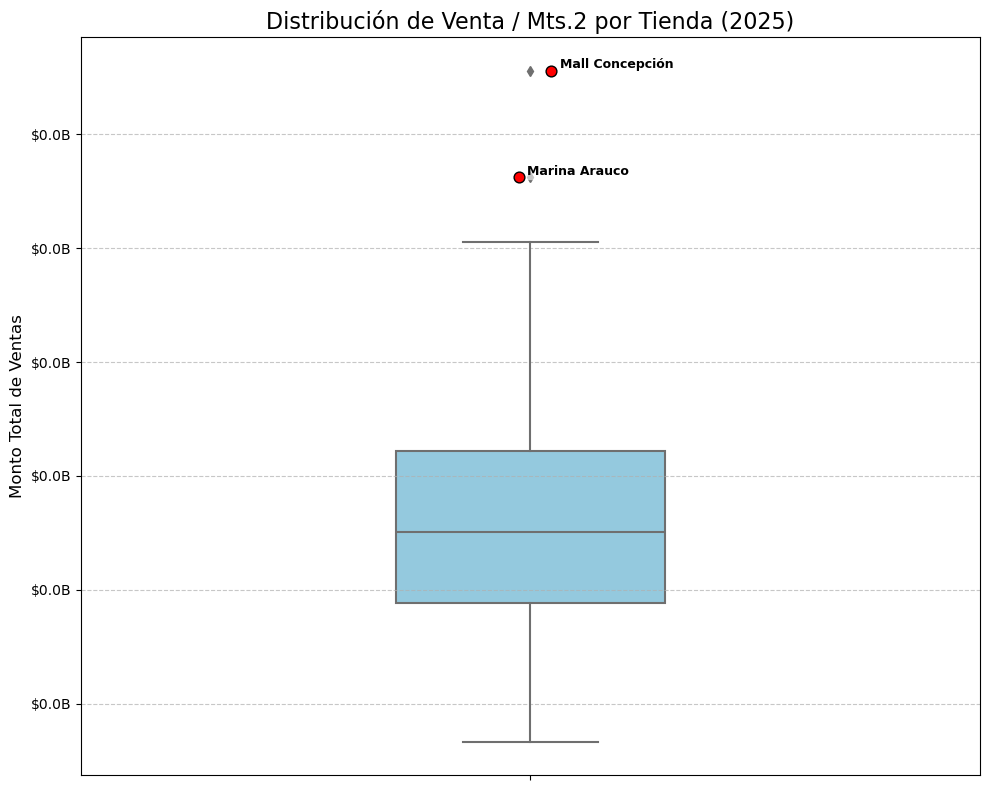

In [36]:
columnas_a_sumar_venta_mts2 = ['Ventas / Mts. 2'] 
    
Ventas_Mts2_2025 = Df_Kmeans.groupby('Nombre_Sucursal')[columnas_a_sumar_venta_mts2].sum().reset_index()

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS / Mts. 2 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar_venta_mts2 = 'Ventas / Mts. 2'
    columna_nombre_sucursal = 'Nombre_Sucursal'

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar_venta_mts2}' ---")
    desc_ventas_mts2 = Ventas_Mts2_2025[variable_a_analizar_venta_mts2].describe()
    print(f"Count: {desc_ventas_mts2['count']:.0f}")
    print(f"Mean: ${desc_ventas_mts2['mean']:,.0f}")
    print(f"Std: ${desc_ventas_mts2['std']:,.0f}")
    print(f"Min: ${desc_ventas_mts2['min']:,.0f}")
    print(f"25%: ${desc_ventas_mts2['25%']:,.0f}")
    print(f"50% (Median): ${desc_ventas_mts2['50%']:,.0f}")
    print(f"75%: ${desc_ventas_mts2['75%']:,.0f}")
    print(f"Max: ${desc_ventas_mts2['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar_venta_mts2}:")
    print(format_numeric_columns_for_display_ventas(Ventas_Mts2_2025.nlargest(5, variable_a_analizar_venta_mts2)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar_venta_mts2}:")
    print(format_numeric_columns_for_display_ventas(Ventas_Mts2_2025.nsmallest(5, variable_a_analizar_venta_mts2)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar_venta_mts2}) ---")
    Q1_ventas_mts2 = desc_ventas_mts2['25%']
    Q3_ventas_mts2 = desc_ventas_mts2['75%']
    IQR_ventas_mts2 = Q3_ventas_mts2 - Q1_ventas_mts2
    lower_ventas_mts2 = Q1_ventas_mts2 - 1.5 * IQR_ventas_mts2
    upper_ventas_mts2 = Q3_ventas_mts2 + 1.5 * IQR_ventas_mts2
    outliers_ventas_mts2 = Ventas_Mts2_2025[(Ventas_Mts2_2025[variable_a_analizar_venta_mts2] < lower_ventas_mts2) | (Ventas_Mts2_2025[variable_a_analizar_venta_mts2] > upper_ventas_mts2)]

    print(f"  Q1: ${Q1_ventas_mts2:,.2f}")
    print(f"  Q3: ${Q3_ventas_mts2:,.2f}")
    print(f"  IQR: ${IQR_ventas_mts2:,.2f}")
    print(f"  Límite Inferior: ${lower_ventas_mts2:,.2f}")
    print(f"  Límite Superior: ${upper_ventas_mts2:,.2f}")

    if not outliers_ventas_mts2.empty:
        print(f"  Outliers detectados ({len(outliers_ventas_mts2)}):")
        print(format_numeric_columns_for_display_ventas(outliers_ventas_mts2))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Ventas_Mts2_2025[variable_a_analizar_venta_mts2], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de Venta / Mts.2 por Tienda (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    try:
        if not outliers_ventas_mts2.empty:
            y_vals = outliers_ventas_mts2[variable_a_analizar_venta_mts2].values
            x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
            ax.scatter(x_jitter, y_vals, color='red', zorder=5, s=60, edgecolor='black')
            for xi, yi, lbl in zip(x_jitter, y_vals, outliers_ventas_mts2.get('Nombre_Sucursal', outliers_ventas_mts2.index).astype(str)):
                ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                            fontsize=9, weight='bold', color='black', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.6))
    except NameError:
        pass
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")



ANÁLISIS DESCRIPTIVO: 'NC / Ventas'

--- Estadísticas de 'NC / Ventas' ---
Count: 43
Mean: 3.18%
Std: 1.08%
Min: 1.30%
25%: 2.32%
50% (Median): 3.01%
75%: 3.76%
Max: 6.06%

Top 5 por 'NC / Ventas':
Nombre_Sucursal NC / Ventas
  Los Dominicos       6.06%
        Crillón       5.76%
   Arauco Maipú       5.40%
        Quilpué       4.93%
    Plaza Egaña       4.64%

Bottom 5 por 'NC / Ventas':
    Nombre_Sucursal NC / Ventas
       Puerto Montt       1.30%
       Punta Arenas       1.79%
Costanera Pto Montt       1.88%
           Valdivia       1.94%
           Coquimbo       2.04%

  Q1: 2.32%
  Q3: 3.76%
  IQR: 1.44%
  Límite Inferior: 0.15%
  Límite Superior: 5.93%
  Outliers detectados (1):
Nombre_Sucursal NC / Ventas
  Los Dominicos       6.06%


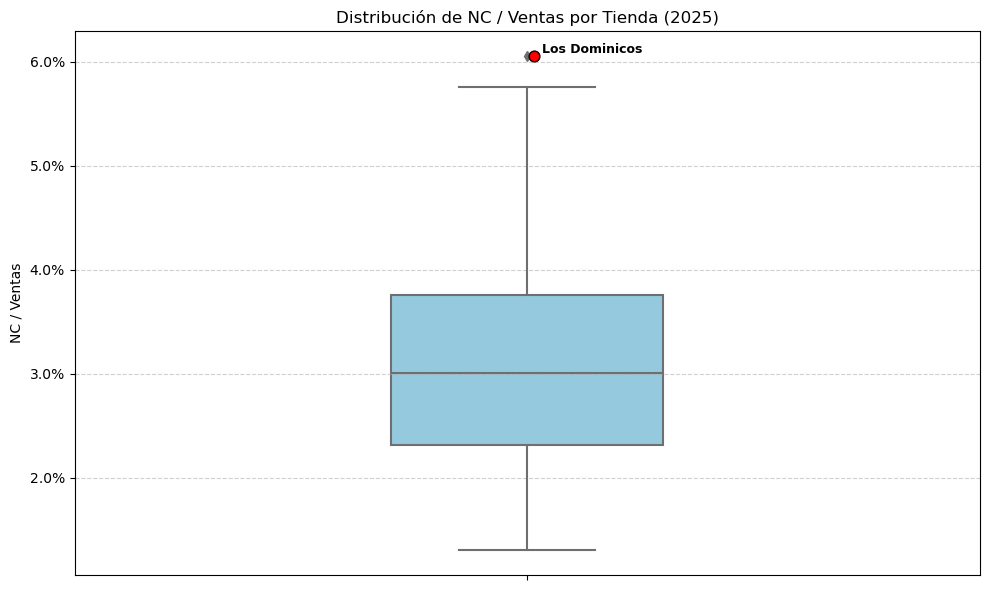

In [37]:
print("\n" + "="*60)
print("ANÁLISIS DESCRIPTIVO: 'NC / Ventas'")
print("="*60)

try:
    variable_a_analizar = 'NC / Ventas'
    columna_sucursal = 'Nombre_Sucursal'

    if variable_a_analizar not in Df_Kmeans.columns:
        raise KeyError(variable_a_analizar)

    # Formateo para porcentaje
    def format_percent_df(df, col):
        dfc = df.copy()
        dfc[col] = dfc[col].apply(lambda x: f"{x:.2%}" if pd.notna(x) else "NaN")
        return dfc

    # Estadísticas descriptivas
    desc = Df_Kmeans[variable_a_analizar].describe()
    print(f"\n--- Estadísticas de '{variable_a_analizar}' ---")
    print(f"Count: {desc['count']:.0f}")
    print(f"Mean: {desc['mean']:.2%}")
    print(f"Std: {desc['std']:.2%}")
    print(f"Min: {desc['min']:.2%}")
    print(f"25%: {desc['25%']:.2%}")
    print(f"50% (Median): {desc['50%']:.2%}")
    print(f"75%: {desc['75%']:.2%}")
    print(f"Max: {desc['max']:.2%}")

    print(f"\nTop 5 por '{variable_a_analizar}':")
    print(format_percent_df(Df_Kmeans.nlargest(5, variable_a_analizar)[[columna_sucursal, variable_a_analizar]], variable_a_analizar).to_string(index=False))

    print(f"\nBottom 5 por '{variable_a_analizar}':")
    print(format_percent_df(Df_Kmeans.nsmallest(5, variable_a_analizar)[[columna_sucursal, variable_a_analizar]], variable_a_analizar).to_string(index=False))

    # Detección de outliers por IQR
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Df_Kmeans[(Df_Kmeans[variable_a_analizar] < lower) | (Df_Kmeans[variable_a_analizar] > upper)].copy()

    print(f"\n  Q1: {Q1:.2%}")
    print(f"  Q3: {Q3:.2%}")
    print(f"  IQR: {IQR:.2%}")
    print(f"  Límite Inferior: {lower:.2%}")
    print(f"  Límite Superior: {upper:.2%}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_percent_df(outliers[[columna_sucursal, variable_a_analizar]], variable_a_analizar).to_string(index=False))
    else:
        print("  No se detectaron outliers.")

    # Boxplot y etiquetado de outliers
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(y=Df_Kmeans[variable_a_analizar], color='skyblue', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax.set_title(f'Distribución de {variable_a_analizar} por Tienda (2025)')
    ax.set_ylabel('NC / Ventas')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    if not outliers.empty:
        y_vals = outliers[variable_a_analizar].values
        x_jitter = np.random.normal(loc=0.0, scale=0.04, size=len(y_vals))
        ax.scatter(x_jitter, y_vals, color='red', zorder=5, s=60, edgecolor='black')
        for xi, yi, lbl in zip(x_jitter, y_vals, outliers[columna_sucursal].astype(str)):
            ax.annotate(lbl, (xi, yi), xytext=(6, 2), textcoords='offset points',
                        fontsize=9, weight='bold', color='black',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'. Verifica que exista en Df_Kmeans.")
except NameError:
    print("\n❌ ERROR: El DataFrame 'Df_Kmeans' no fue encontrado. Ejecuta la celda que lo construye primero.")
# ...existing code...

#### Ya habiendo concolidado el DataFrame Final con el que vamos a trabajamor Seleccionaremos las variables numericas relevantes que utilizaremos para el K-Means 

In [38]:
Variables_Modelo = [
    "Ventas / Mts. 2", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad",
    "Rot_2025", "Juicios_Laborales",
]
X = Df_Kmeans[Variables_Modelo].copy()

In [39]:
X

Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
0      1.349293e+06            270155106               5   
1      1.194372e+06            445783370               9   
2      8.586518e+05            105243768               8   
3      1.550556e+06            172889639               2   
4      1.466200e+06            339615984               9   
5      7.934972e+05            107344679               3   
6      2.339279e+06            825562038              20   
7      1.550607e+06            252833031               5   
8      1.077174e+06            397330525               4   
9      1.847191e+06            623194259              12   
10     7.760963e+05            340174311              15   
11     1.059302e+06            225665038               2   
12     9.793743e+05            175858890               5   
13     1.639960e+06            219646341               6   
14     1.824647e+06            169140999               1   
15     3.331326e+05            223462124               3   
16     1.639515e+06            325670717               3   
17     1.639515e+06            325670717               3   
18     1.067271e+06            213480050               9   
19     2.811005e+06            769998237              12   
20     1.391431e+06            780554108              30   
21     8.739017e+05            165484967               4   
22     1.014014e+06            126621871               1   
23     9.195600e+05            142817154               8   
24     1.076443e+06            461447898              13   
25     1.627159e+06            330571116               5   
26     1.233967e+06            364078495              12   
27     1.208104e+06            511947995              37   
28     1.332286e+06            246321980              20   
29     1.118887e+06            314668324               9   
30     1.537226e+06            520237390              17   
31     2.525564e+06            475135408              16   
32     8.544144e+05            309042407               9   
33     9.296008e+05             64929345               6   
34     1.354183e+06            152621142               1   
35     8.392785e+05            187080055               5   
36     7.649673e+05            170563437               2   
37     1.880876e+06            455789074              21   
38     2.372861e+06            284786686              20   
39     1.667072e+06            187416787               5   
40     6.672213e+05            199670168              42   
41     1.432299e+06            437088247              40   
42     1.270979e+06            208515803               5   

    Desviacion_Meta_Merma  Costo_Merma_Destruccion  N° Accidentes  \
0                  0.0037             -52372551.33             16   
1                 -0.0001             -26815074.52             40   
2                  0.0007              -4336070.00              8   
3                 -0.0031             -18814280.81              8   
4                  0.0006             -24601240.38             10   
5                  0.0004              -8896265.51             14   
6                 -0.0015             -54187124.15             25   
7                 -0.0009             -39446847.04             37   
8                  0.0026             -21050946.70             21   
9                 -0.0026             -54624213.53             46   
10                 0.0007             -35806378.11             13   
11                 0.0049             -15215180.84             12   
12                 0.0010             -14861200.97             14   
13                -0.0016             -21732869.67             20   
14                 0.0029             -16305945.99             13   
15                 0.0020              -6721316.42              7   
16                -0.0007             -40452275.03             24   
17                -0.0007             -40452275.03             24   
18                -0.0010             -14354435.82  

#### Escalamos la informacion

In [40]:
# ============================================
# Pre-modelo K-Means: ingeniería, tests y métricas
# ============================================

# (Opcional) Para KMO y Bartlett (PCA parcial): intenta instalar si no está
try:
    from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
    _fa_ok = True
except Exception:
    _fa_ok = False


# --- 3) Selección de features para el espacio de modelado / pruebas
#     (Ajusta esta lista si tu diccionario cambió)
feature_cols = [
    "Ventas / Mts. 2", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad",
    "Rot_2025", "Juicios_Laborales",
]

# --- 4) Escalado Min-Max (para Hopkins y métricas internas)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- 5) Test de tendencia a clúster: HOPKINS (con bootstrap)
def hopkins_stat(X_array, m=None, seed=42):
    """
    Calcula la estadística de Hopkins.
    X_array: np.array en espacio continuo (ya escalado).
    m: número de puntos muestreados (por defecto, 30% del total, mínimo 10 y máximo 20).
    """
    rng = np.random.default_rng(seed)
    n, d = X_array.shape
    if m is None:
        m = int(max(10, min(0.3 * n, 20)))
    # Muestreo de puntos reales
    idx = rng.choice(n, size=m, replace=False)
    X_m = X_array[idx]
    # Puntos aleatorios uniformes en el hiper-rectángulo de X
    min_ = X_array.min(axis=0)
    max_ = X_array.max(axis=0)
    U = rng.random(size=(m, d)) * (max_ - min_) + min_
    # Distancias al vecino más cercano
    nbrs = NearestNeighbors(n_neighbors=2).fit(X_array)
    # Para puntos reales: distancia al vecino real más cercano (excluyendo sí mismo)
    dist_u, ind_u = nbrs.kneighbors(X_m)
    u = dist_u[:, 1]  # segunda columna: excluye el punto idéntico
    # Para puntos aleatorios: distancia al vecino real más cercano
    dist_w, _ = nbrs.kneighbors(U, n_neighbors=1)
    w = dist_w[:, 0]
    H = w.sum() / (w.sum() + u.sum() + 1e-12)
    return H

# Bootstrap de Hopkins
def hopkins_bootstrap(X_array, B=200, seed=123):
    rng = np.random.default_rng(seed)
    vals = [hopkins_stat(X_array, seed=int(s)) for s in rng.integers(0, 10_000, size=B)]
    vals = np.array(vals)
    return vals.mean(), np.quantile(vals, [0.025, 0.975]), vals

H_mean, H_ci, H_vals = hopkins_bootstrap(X_scaled, B=200)
print(f"[Hopkins] H̄ = {H_mean:.3f}  (IC95%: {H_ci[0]:.3f} – {H_ci[1]:.3f})")
print("Interpretación: ~0.5 aleatorio; ≥0.7 tendencia clara a clúster.")



[Hopkins] H̄ = 0.628  (IC95%: 0.587 – 0.671)
Interpretación: ~0.5 aleatorio; ≥0.7 tendencia clara a clúster.


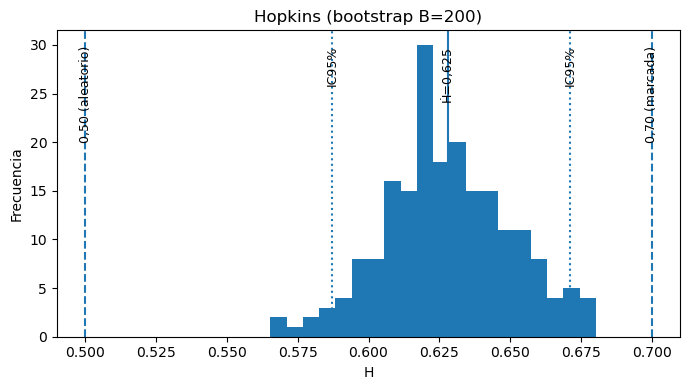

In [ ]:
# Suponiendo que ya tienes H_vals, H_mean, H_ci
plt.figure(figsize=(7,4))
plt.hist(H_vals, bins=20)
for x, ls, lab in [(0.50,'--','0,50 (aleatorio)'),
                   (H_ci[0],':','IC95%'),
                   (H_mean,'-','Ḣ=0,625'),
                   (H_ci[1],':','IC95%'),
                   (0.70,'--','0,70 (marcada)')]:
    plt.axvline(x, linestyle=ls)
    plt.text(x, plt.ylim()[1]*0.95, lab, ha='center', va='top', fontsize=9, rotation=90)
plt.title("Hopkins (bootstrap B=200)")
plt.xlabel("H"); plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [42]:
Scaler_Standar = StandardScaler()
X_scaled = Scaler_Standar.fit_transform(X)
Scaler_MinMax = MinMaxScaler()
X_scaled_MinMax = Scaler_MinMax.fit_transform(X)

#### Aplicamos Metodo del Codo para determinar el numero optimo de Clusters

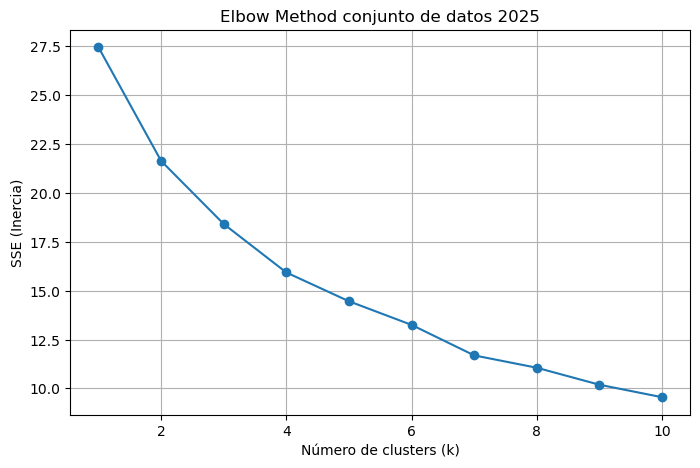

In [43]:
# Calcular SSE para varios valores de K
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state= 100, n_init= 50)
    kmeans.fit(X_scaled_MinMax)
    sse.append(kmeans.inertia_)

# Plot del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Inercia)')
plt.title('Elbow Method conjunto de datos 2025')
plt.grid(True)
plt.show()


#### Comenzaremos a ejecutar los Modelos K Means que utilizaremos para ello comenzamos :
#### Primera Propuesta: Modelo Clustering K-Means Simple


--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---
                 Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Cluster_Sin_PCA                                                         
0                     1921256.34         4.361084e+08           13.50   
1                     1112170.50         1.949441e+08            4.45   
2                     1126404.33         4.085388e+08           19.36   

                 Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Cluster_Sin_PCA                                                   
0                                  0.0             -41884667.49   
1                                  0.0             -15201567.20   
2                                 -0.0             -27411431.47   

                 N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Cluster_Sin_PCA                                                          
0                        28.58                  34709069.50       1.42   
1         

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


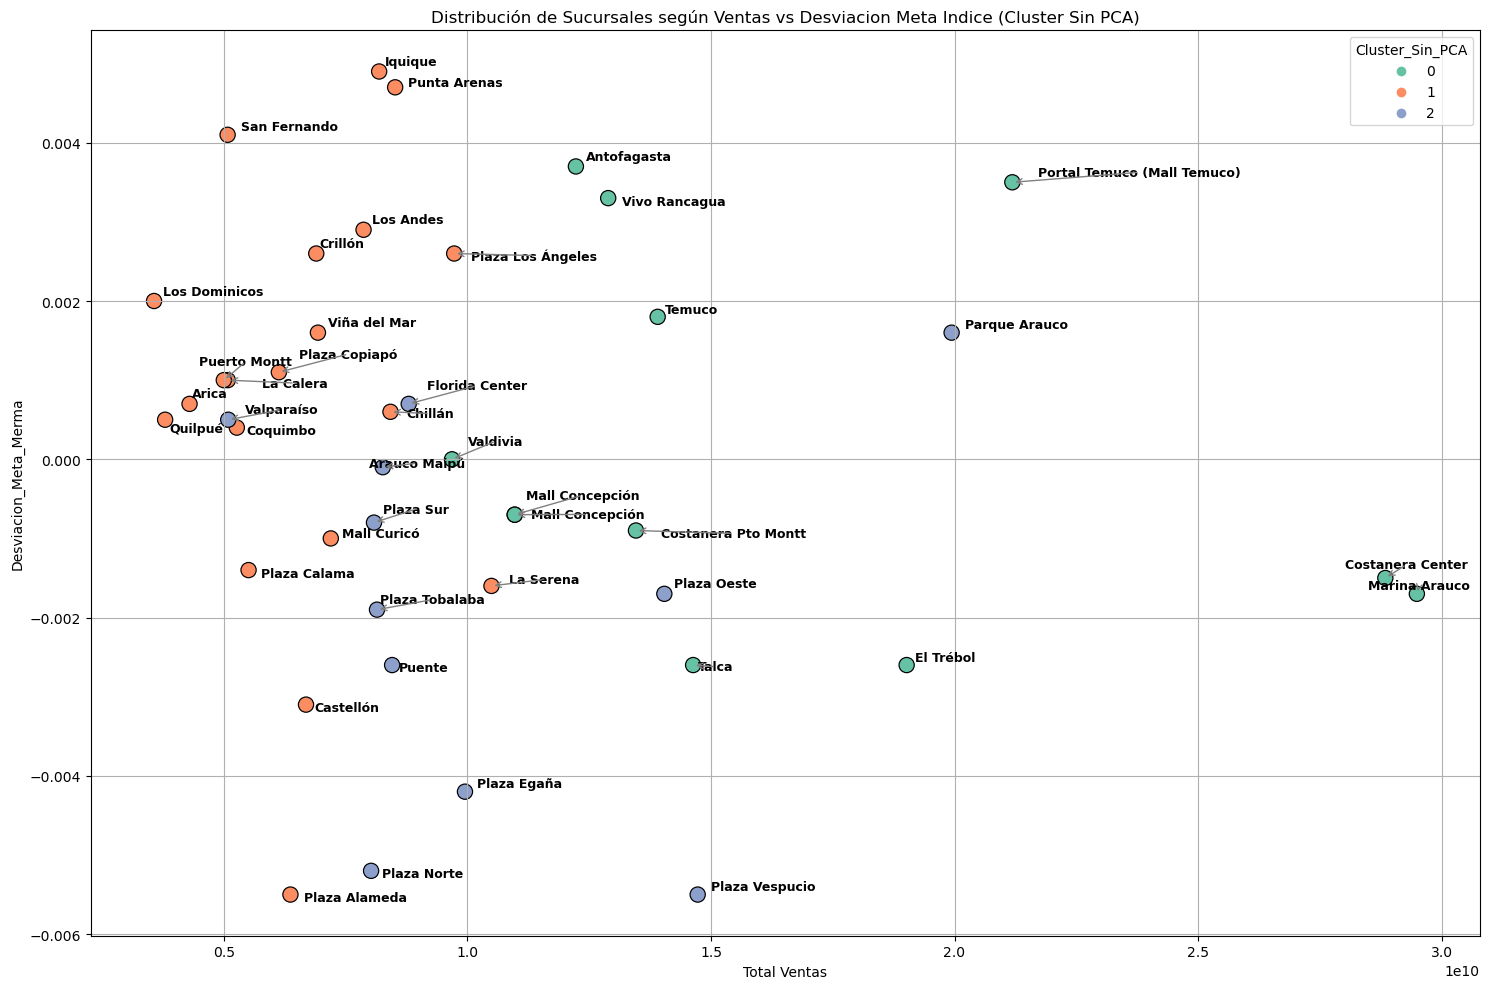

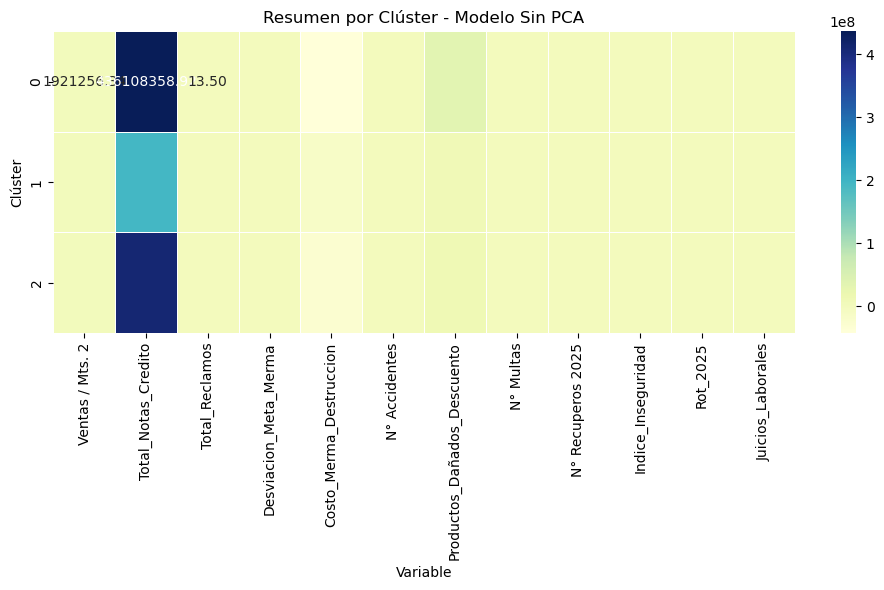


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Cluster_Sin_PCA                                                         
0                     1921256.34         4.361084e+08           13.50   
1                     1112170.50         1.949441e+08            4.45   
2                     1126404.33         4.085388e+08           19.36   

                 Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Cluster_Sin_PCA                                                   
0                                  0.0             -41884667.49   
1                                  0.0             -15201567.20   
2                                 -0.0             -27411431.47   

                 N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Cluster_Sin_PCA                                                          
0                        28.58                  34709069.50       1.42   
1                        15.35                   9334248.90       0.80   
2                        22.00                  12552857.27       0.45   

                 N° Recuperos 2025  Indice_Inseguridad  Rot_2025  \
Cluster_Sin_PCA                                                    
0                           201.33                0.65      0.22   
1                           122.20                0.58      0.24   
2                           472.91                0.25      0.28   

                 Juicios_Laborales  
Cluster_Sin_PCA                     
0                             3.17  
1                             2.45  
2                             6.64

In [44]:
### Ejecutamos K Means con un Clustering Simple 
K_optimo = 3
Modelo_KMeans = KMeans(n_clusters=K_optimo, random_state=100, n_init=50)
Clusters = Modelo_KMeans.fit_predict(X_scaled)
## Añadimos Columna al DataFrame Original
Df_Kmeans['Cluster_Sin_PCA'] = Clusters
### Generamos un resumen por Cluster segun las variables de Interes
Resumen_Cluster_Sin_PCA = Df_Kmeans.groupby('Cluster_Sin_PCA')[Variables_Modelo].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---")
print(Resumen_Cluster_Sin_PCA)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Cluster_Sin_PCA",
    palette='Set2',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Cluster Sin PCA)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_Sin_PCA, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo Sin PCA')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_Sin_PCA.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_Sin_PCA)




In [45]:
### Realizamos un mapping a los CLusters para asiganarles Riesgo Alto, Medio o Bajo ### 
Ventas_Cluster_Propuesta_1 = Df_Kmeans.groupby('Cluster_Sin_PCA')['Total_Ventas'].mean().sort_values(ascending=False)
Orden_riesgo = Ventas_Cluster_Propuesta_1.index.tolist()  # [cluster_alto, cluster_medio, cluster_bajo]

### Creamos las etiquetas de Riesgo
etiquetas = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo']
mapping_riesgo = {cluster: etiqueta for cluster, etiqueta in zip(Orden_riesgo, etiquetas)}

print("Asignación automática de clusters según ventas promedio:", mapping_riesgo)

# --- 3. Asignar etiquetas en ambos modelos ---
Df_Kmeans['Riesgo_Propuesta_1'] = Df_Kmeans['Cluster_Sin_PCA'].map(mapping_riesgo)


Asignación automática de clusters según ventas promedio: {0: 'Riesgo Alto', 2: 'Riesgo Medio', 1: 'Riesgo Bajo'}


In [46]:
Score_Propuesta_1 = silhouette_score(X_scaled, Clusters)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_1:.4f}")


Silhouette Score para Clusters_Weighted: 0.1714


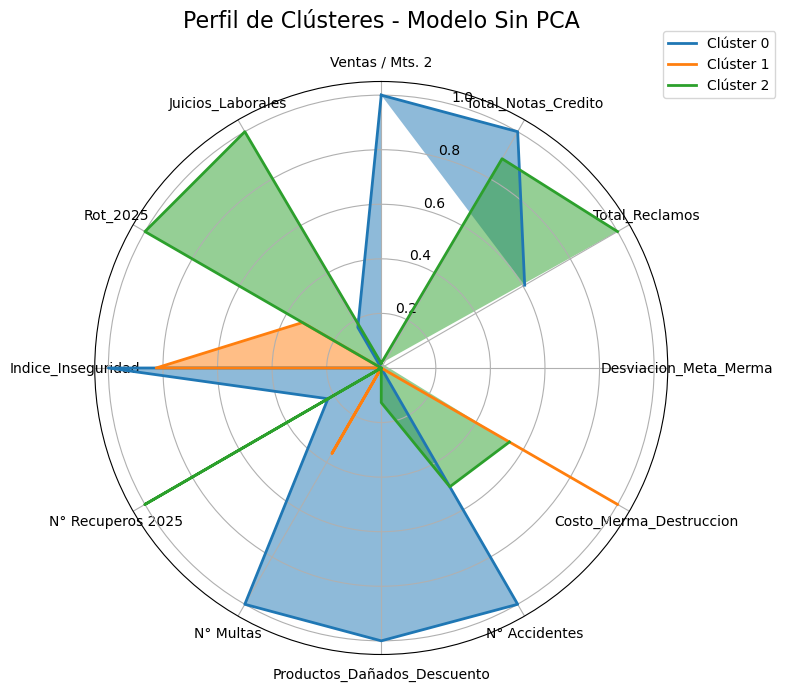

In [47]:
# Grafico de Araña (Opcional)
Resumen_Cluster_Sin_PCA.index = Resumen_Cluster_Sin_PCA.index.astype(str)

# Normalizar los datos por columna para hacerlos comparables (0 a 1)
Resumen_normalizado = (Resumen_Cluster_Sin_PCA - Resumen_Cluster_Sin_PCA.min()) / (Resumen_Cluster_Sin_PCA.max() - Resumen_Cluster_Sin_PCA.min())

# Preparar el radar chart
labels = list(Resumen_normalizado.columns)
num_vars = len(labels)

# Calcular ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores distintos para cada clúster
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotear cada clúster
for idx, fila in Resumen_normalizado.iterrows():
    valores = fila.tolist()
    valores += valores[:1]  # Cerrar el círculo
    ax.plot(angles, valores, label=f'Clúster {idx}', linewidth=2)
    ax.fill(angles, valores, alpha=0.5)

# Personalizar el gráfico
ax.set_title('Perfil de Clústeres - Modelo Sin PCA', size=16, pad=20)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(180 / num_vars)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

##### Analisis de las Caracteristicas de los Clusters segun Propuesta 1
Cluster 1 : Tiendas con un Volumen de ventas y Notas de Credito bajo con una baj actividad financiera, lo que se traduce a su vez en un sucursales que son propensas a cumplir con las metas de su inventario, a su vez de que su costo de merma de destruccion se mantiene entre los mas bajos a su vez con su numero de reclamos, unico punto a resalar es el hecho de su Descuento en productos Dañados que no sigue la misma tendencia siendo el segundo clusters con mayor descuentos incurridos en estos articulos, con 26 sucursales

Clusters 2: Tiendas con un riesgo que podemos catalogar como medio, dado que manejan un volumen de ventas y Notas de credito muy cercano al promedio, distanciandose de la magnitud financiera de las sucursales mas grandes, pero algo interesante es que a pesar de su magnitud promedio, posee las sucursales con caracteristicas similares en terminos de NO CUMPLIR con las metas de inventario, lo que tenemos son 11 sucursales

Cluster 3: Tiendas que poseen el mayor peso financiero dentro de las sucursales, las cuales poseen el mayor volumen tanto de ventas, como de notas de credito, su costo asociado a la merma de destruccion y mayor volumen de descuento producido por productos dañados, una observacion a levantar es que a pesar de que posean mayor magnitud financiera su numero de reclamos y su desviacion en relacion a la meta y indice de la merma inventario se mantienen en un promedio lo que es relevante a analizar

#### Segunda Propuesta: Modelo Clustering K-Means con PCA

16 [-0.59795431 -0.09736027]
17 [ 0.95591499 -0.34626569]


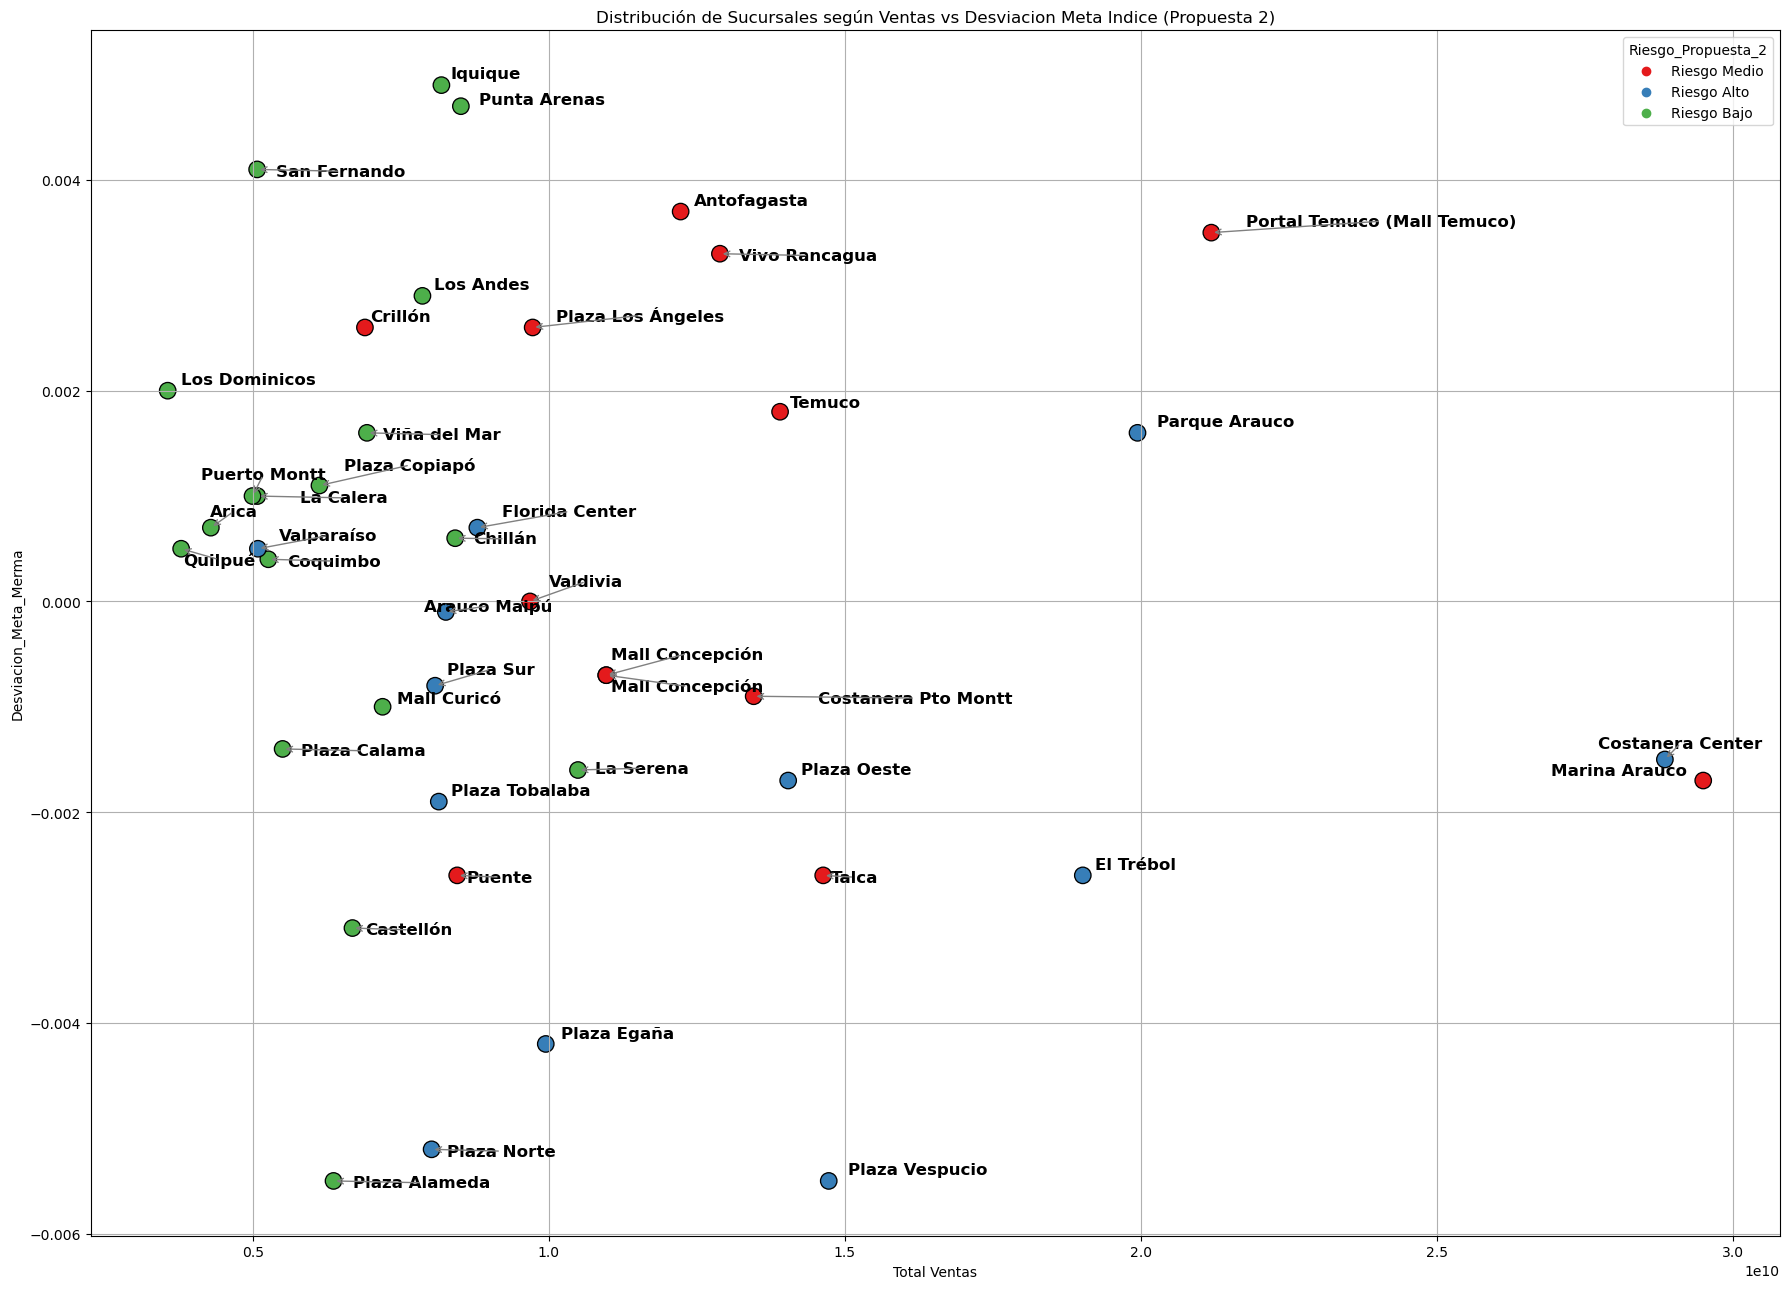


✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:


Variable  p-valor  Significativo
0               Ventas / Mts. 2   0.0017           True
1           Total_Notas_Credito   0.0000           True
2                Total_Reclamos   0.0001           True
3         Desviacion_Meta_Merma   0.0235           True
4       Costo_Merma_Destruccion   0.0000           True
5                 N° Accidentes   0.0022           True
6   Productos_Dañados_Descuento   0.0009           True
7                     N° Multas   0.2136          False
8             N° Recuperos 2025   0.0004           True
9            Indice_Inseguridad   0.0000           True
10                     Rot_2025   0.2370          False
11            Juicios_Laborales   0.0088           True

In [48]:
from sklearn.decomposition import PCA
MinMax_Scaler = MinMaxScaler()
X_Scaled_MinMax = MinMax_Scaler.fit_transform(X)

PCA = PCA(n_components=2, random_state=100)
X_PCA = PCA.fit_transform(X_Scaled_MinMax)

X_PCA_Df = pd.DataFrame(X_PCA, columns=['PCA1', 'PCA2'])

Kmeans_PCA_Parcial = KMeans(n_clusters=3, random_state=100, n_init= 50)
Clusters_PCA_Parcial = Kmeans_PCA_Parcial.fit_predict(X_PCA_Df)

Df_Kmeans['Propuesta_2'] = Clusters_PCA_Parcial
Df_Kmeans["Riesgo_Propuesta_2"] = Df_Kmeans["Propuesta_2"].map(mapping_riesgo)

plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_2",
    palette='Set1',
    s=140,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=12, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.35)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Propuesta 2)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()
Resumen_Cluster_PCA_Total = Df_Kmeans.groupby('Riesgo_Propuesta_2')[Variables_Modelo].mean()

Resultados_Anova_Propuesta_2 = {}
for var in Variables_Modelo:
    grupos = [grupo[var].values for _, grupo in Df_Kmeans.groupby('Riesgo_Propuesta_2')]
    stat, p_value = f_oneway(*grupos)
    Resultados_Anova_Propuesta_2[var] = round(p_value, 4)

Df_Anova_PCA_Total = pd.DataFrame.from_dict(Resultados_Anova_Propuesta_2, orient='index', columns=['p-valor'])
Df_Anova_PCA_Total['Significativo'] = Df_Anova_PCA_Total['p-valor'] < 0.05
Df_Anova_PCA_Total.index.name = 'Variable'
Df_Anova_PCA_Total.reset_index(inplace=True)

print("\n✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:")
display(Df_Anova_PCA_Total)



In [49]:
Score_Propuesta_2 = silhouette_score(X_PCA_Df, Clusters_PCA_Parcial)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_2:.4f}")


Silhouette Score para Clusters_Weighted: 0.4138


##### Propuesta 3 PCA con variables externas

--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---
--- Aplicamos K-Means al modelo hibrido ---

--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---
                      Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Clusters_Propuesta_3                                                         
0                        1.025679e+06         2.123942e+08        8.000000   
1                        1.528845e+06         2.998634e+08       10.058824   
2                        1.744383e+06         6.418488e+08       20.142857   

                      Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Clusters_Propuesta_3                                                   
0                                  0.000289            -1.657221e+07   
1                                  0.000624            -2.820430e+07   
2                                 -0.002229            -4.483257e+07 

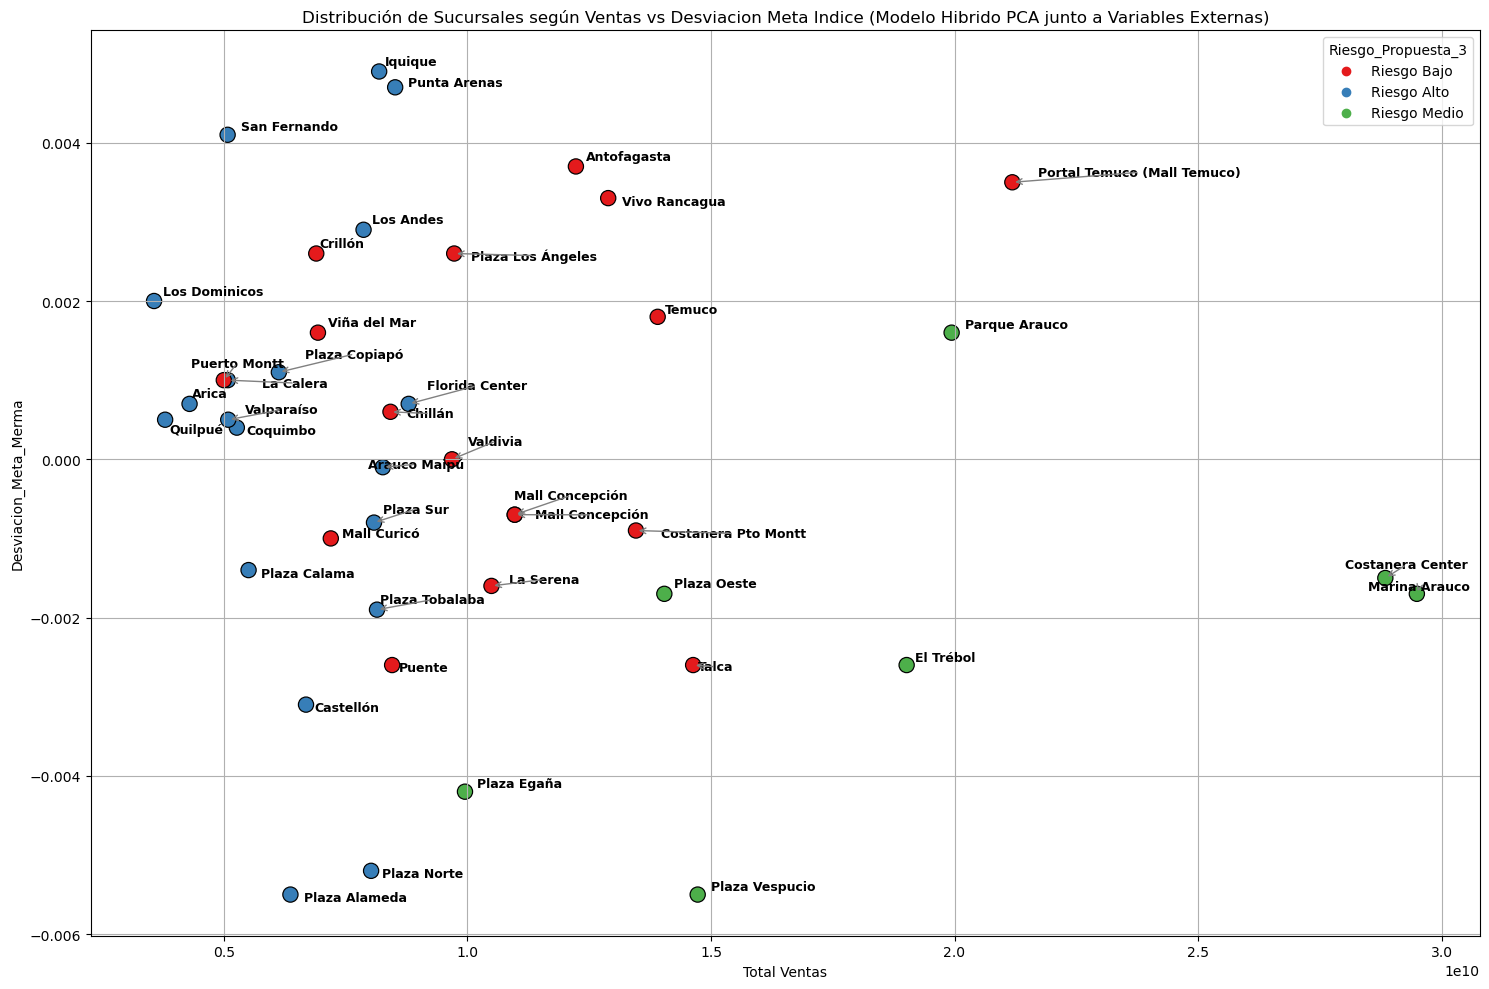

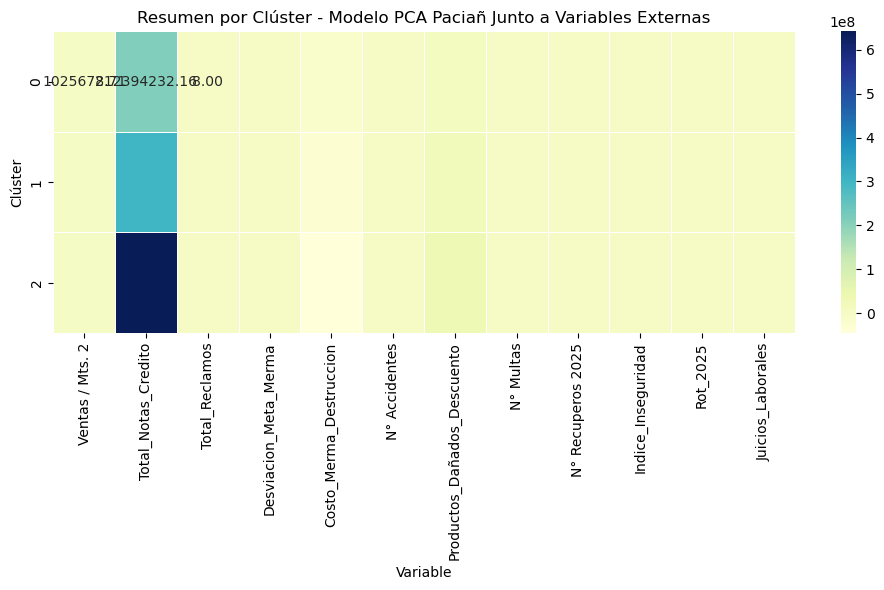


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Clusters_Propuesta_3                                                         
0                          1025678.71         2.123942e+08            8.00   
1                          1528844.69         2.998634e+08           10.06   
2                          1744382.66         6.418488e+08           20.14   

                      Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Clusters_Propuesta_3                                                   
0                                   0.00029             -16572210.28   
1                                   0.00062             -28204302.07   
2                                  -0.00223             -44832567.08   

                      N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Clusters_Propuesta_3                                                          
0                             16.95                   9509080.63       0.37   
1                             22.53                  20387721.47       1.59   
2                             26.71                  30573063.57       0.57   

                      N° Recuperos 2025  Indice_Inseguridad  Rot_2025  \
Clusters_Propuesta_3                                                    
0                                170.95                0.37      0.26   
1                                161.53                0.79      0.22   
2                                581.14                0.24      0.28   

                      Juicios_Laborales  
Clusters_Propuesta_3                     
0                                  2.89  
1                                  3.88  
2                                  5.57

In [50]:
from sklearn.decomposition import PCA

Variables_PCA_correlacionadas = ["Total_Ventas", 'Total_Notas_Credito']
Variables_externas = ["Total_Reclamos", "Desviacion_Meta_Merma", "Costo_Merma_Destruccion", "N° Accidentes", "Productos_Dañados_Descuento", "N° Multas", "N° Recuperos 2025", "Indice Seguridad"]

print("--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---")
X_PCA_Variables_Correlaciones = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_PCA_correlacionadas])
X_Variables_Externas = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_externas])
PCA_Variables_Correlaciones = PCA(n_components=1, random_state=100)

X_PCA_Ventas_NC = PCA_Variables_Correlaciones.fit_transform(X_PCA_Variables_Correlaciones)
Df_PCA_NC = pd.DataFrame(X_PCA_Ventas_NC, columns=['PCA_Ventas_Notas_Credito'])

Df_Kmeans_Hibrido = pd.concat([Df_PCA_NC, pd.DataFrame(X_Variables_Externas, columns=Variables_externas)], axis=1)

print("--- Aplicamos K-Means al modelo hibrido ---")
Clusters_PCA_Hibrido = KMeans(n_clusters=K_optimo, random_state=100, n_init=50)
Clusters_PCA_Hibrido = Clusters_PCA_Hibrido.fit_predict(Df_Kmeans_Hibrido)          
Df_Kmeans['Clusters_Propuesta_3'] = Clusters_PCA_Hibrido 

mapping_riesgo_Propuesta_3 = {
    0: "Riesgo Alto",
    1: "Riesgo Bajo",
    2: "Riesgo Medio"
}
Df_Kmeans["Riesgo_Propuesta_3"] = Df_Kmeans["Clusters_Propuesta_3"].map(mapping_riesgo_Propuesta_3)

Resumen_Cluster_PCA_Hibrido = Df_Kmeans.groupby('Clusters_Propuesta_3')[Variables_Modelo].mean()

print("\n--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---")
print(Resumen_Cluster_PCA_Hibrido)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_3",
    palette='Set1',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Modelo Hibrido PCA junto a Variables Externas)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_PCA_Hibrido, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo PCA Paciañ Junto a Variables Externas')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_PCA_Hibrido.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_PCA_Hibrido)





In [51]:
Score_Propuesta_3 = silhouette_score(Df_Kmeans_Hibrido, Clusters_PCA_Hibrido)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_3:.4f}")

Silhouette Score para Clusters_Weighted: 0.1864


#### Propuesat 4 Modelo Cluserting K Means con Weights asignados


--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---
                    Ventas / Mts. 2  Total_Notas_Credito  \
Riesgo_Propuesta_4                                         
Riesgo Alto              1325198.83         3.156587e+08   
Riesgo Bajo              2070489.82         5.361463e+08   
Riesgo Medio             1136880.74         2.521517e+08   

                    Desviacion_Meta_Merma  Productos_Dañados_Descuento  \
Riesgo_Propuesta_4                                                       
Riesgo Alto                          -0.0                  14559399.71   
Riesgo Bajo                           0.0                  47753699.00   
Riesgo Medio                          0.0                  10362162.65   

                    Costo_Merma_Destruccion  N° Accidentes  Total_Reclamos  \
Riesgo_Propuesta_4                                                           
Riesgo Alto                    -25474985.82          20.35           10.59   
Riesgo Bajo             

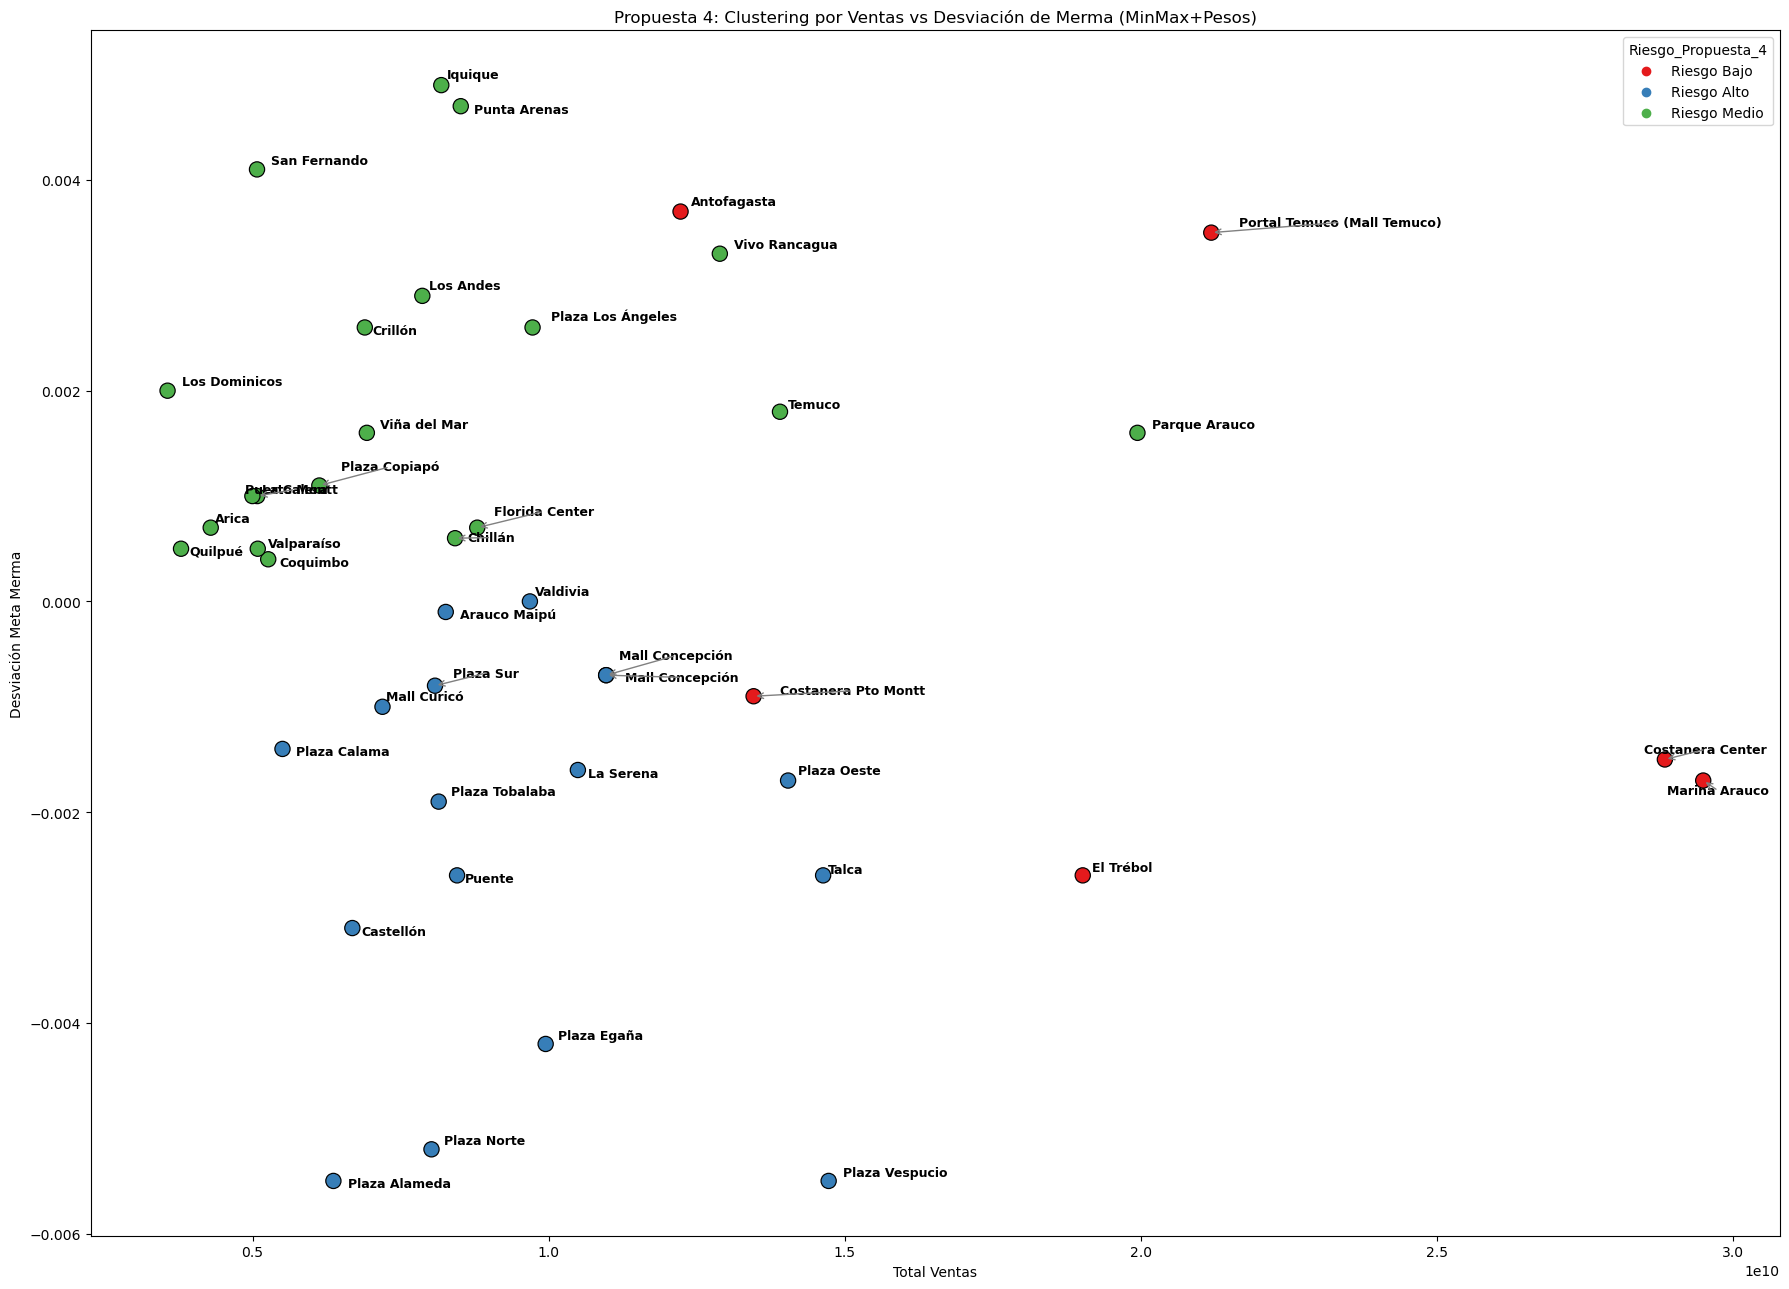


Sucursales en Cluster Riesgo Alto:
['Arauco Maipú', 'Castellón', 'La Serena', 'Mall Concepción', 'Mall Concepción', 'Mall Curicó', 'Plaza Alameda', 'Plaza Calama', 'Plaza Egaña', 'Plaza Norte', 'Plaza Oeste', 'Plaza Sur', 'Plaza Tobalaba', 'Plaza Vespucio', 'Puente', 'Talca', 'Valdivia']

Sucursales en Cluster Riesgo Bajo:
['Antofagasta', 'Costanera Center', 'Costanera Pto Montt', 'El Trébol', 'Marina Arauco', 'Portal Temuco (Mall Temuco)']

Sucursales en Cluster Riesgo Medio:
['Arica', 'Chillán', 'Coquimbo', 'Crillón', 'Florida Center', 'Iquique', 'La Calera', 'Los Andes', 'Los Dominicos', 'Parque Arauco', 'Plaza Copiapó', 'Plaza Los Ángeles', 'Puerto Montt', 'Punta Arenas', 'Quilpué', 'San Fernando', 'Temuco', 'Valparaíso', 'Vivo Rancagua', 'Viña del Mar']


In [52]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score


Weights = {
    'Ventas / Mts. 2': 0.140,
    'Total_Notas_Credito': 0.085,
    'Desviacion_Meta_Merma': 0.18,
    'Productos_Dañados_Descuento': 0.140,
    'Costo_Merma_Destruccion': 0.18,
    'N° Accidentes': 0.0725,
    'Total_Reclamos': 0.0725,
    "N° Multas": 0.0325,
    "N° Recuperos 2025": 0.0425,
    "Indice_Inseguridad": 0.015,
    "Dañados_sobre_Ventas": 0.040
}
Variables_Modelo_Weights = list(Weights.keys())

# --- 3. Limpiar posibles columnas duplicadas ---
Df_Kmeans = Df_Kmeans.loc[:, ~Df_Kmeans.columns.duplicated()]
if 'Cluster_MixMax_Weighted' in Df_Kmeans.columns:
    Df_Kmeans = Df_Kmeans.drop(columns=['Cluster_MixMax_Weighted'])

# --- 4. Escalamiento MinMax y aplicación de pesos ---
MinMax_Scaler = MinMaxScaler()
X_Scaled_MinMax = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_Modelo_Weights])

# Aplicar los pesos a cada columna
X_Weighted_MinMax = X_Scaled_MinMax * [Weights[col] for col in Variables_Modelo_Weights]

# --- 5. KMeans Clustering ---
kmeans_Weighted = KMeans(n_clusters=3, random_state=100, n_init=17,  init='k-means++', max_iter=500, tol=0.00002, algorithm='lloyd')
Clusters_Weighted = kmeans_Weighted.fit_predict(X_Weighted_MinMax)

# --- 6. Añadir columna de cluster  ---
Df_Kmeans['Cluster_MixMax_Weighted'] = Clusters_Weighted
Df_Kmeans["Riesgo_Propuesta_4"] = Df_Kmeans["Cluster_MixMax_Weighted"].map(
    {
        0: "Riesgo Bajo",
        1: "Riesgo Medio",
        2: "Riesgo Alto"
    }
)

# --- 7. Resumen de clústeres ---
Resumen_Cluster_Propuesta_3 = Df_Kmeans.groupby('Riesgo_Propuesta_4')[Variables_Modelo_Weights].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---")
print(Resumen_Cluster_Propuesta_3)

# --- 8. Visualización básica (ventas vs desviación de merma, por cluster) ---
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_4',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 4: Clustering por Ventas vs Desviación de Merma (MinMax+Pesos)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(Df_Kmeans['Riesgo_Propuesta_4'].unique()):
    nombres = Df_Kmeans[Df_Kmeans['Riesgo_Propuesta_4'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)


In [53]:
Score_Propuesta_4 = silhouette_score(X_Weighted_MinMax, Clusters_Weighted)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_4:.4f}")

Silhouette Score para Clusters_Weighted: 0.2354


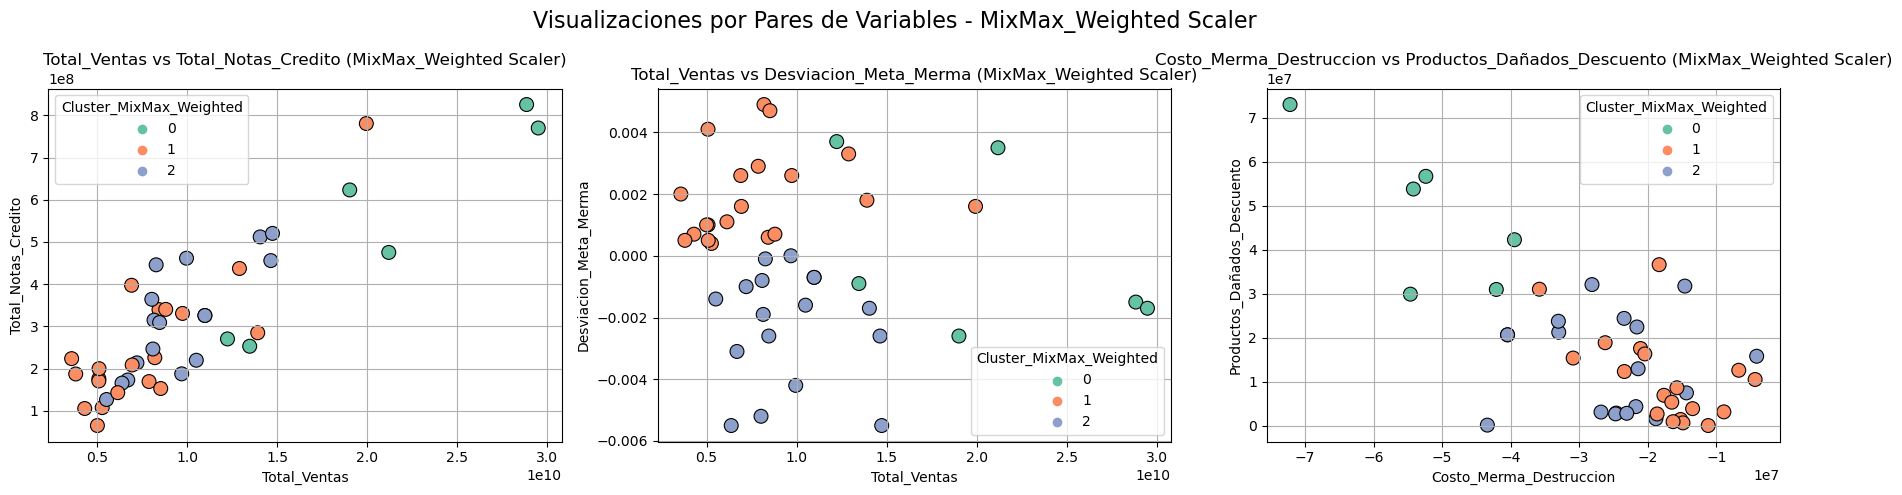

In [ ]:
### Opcional


# Variables con mayor peso primero (ordenadas)
top_variables = [
    ('Total_Ventas', 'Total_Notas_Credito'),
    ('Total_Ventas', 'Desviacion_Meta_Merma'),
    ('Costo_Merma_Destruccion', 'Productos_Dañados_Descuento')
]

# Crear visualizaciones por escalador
for scaler in ['MixMax_Weighted']:
    plt.figure(figsize=(18, 5))
    for i, (x_var, y_var) in enumerate(top_variables):
        plt.subplot(1, 3, i+1)
        sns.scatterplot(
            data=Df_Kmeans,
            x=x_var,
            y=y_var,
            hue=f'Cluster_{scaler}',
            palette='Set2',
            s=100,
            edgecolor='black'
        )
        plt.title(f'{x_var} vs {y_var} ({scaler} Scaler)')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.grid(True)

    plt.suptitle(f'Visualizaciones por Pares de Variables - {scaler} Scaler', fontsize=16)
    plt.tight_layout()
    plt.show()


In [55]:
Df_Kmeans.to_excel("Resumen_Cluster_Propuestas_2025.xlsx", index=False)

##### Realizamos el Grafico pero ahora con Codigos Proporcionados con el fin de una mejora en la visualizacion 

In [56]:
###  Total_Ventas                 0.158
#Total_Notas_Credito          0.106
#Total_Reclamos               0.095
#Desviacion_Meta_Merma        0.098
#Costo_Merma_Destruccion      0.153
#N° Accidentes                0.098
#Productos_Dañados_Descuento  0.166
#N° Multas                    0.020
#N° Recuperos 2025            0.030
#Indice_Inseguridad           0.077


#Weights = {
    #'Total_Ventas': 0.158,
    #'Total_Notas_Credito': 0.106,
    #'Desviacion_Meta_Merma': 0.130,
    #'Productos_Dañados_Descuento': 0.160,
    #'Costo_Merma_Destruccion': 0.153,
    #'N° Accidentes': 0.098,
    #'Total_Reclamos': 0.095,
    #"N° Multas": 0.02,
    #"N° Recuperos 2025": 0.03,
    #"Indice_Inseguridad": 0.05

#}

#Weights = {
    #'Total_Ventas': 0.140,
    #'Total_Notas_Credito': 0.100,
    #'Desviacion_Meta_Merma': 0.145,
    #'Productos_Dañados_Descuento': 0.205,
    #'Costo_Merma_Destruccion': 0.180,
    #'N° Accidentes': 0.070,
    #'Total_Reclamos': 0.070,
    #"N° Multas": 0.030,
    #"N° Recuperos 2025": 0.06,
    #"Indice_Inseguridad": 0.010
#}




In [57]:
# ================== Configuración del modelo ==================
Variables_Modelo = [
    "Ventas / Mts. 2", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad",
    "Rot_2025", "Juicios_Laborales",
    "Total_Ventas", "Indice Merma de Destruccion"
]

Weights = {
    'Ventas / Mts. 2': 0.13,
    'Total_Notas_Credito': 0.10,
    'Desviacion_Meta_Merma': 0.155,
    'Productos_Dañados_Descuento': 0.145,
    'Costo_Merma_Destruccion': 0.14,
    'N° Accidentes': 0.070,
    'Total_Reclamos': 0.070,
    "N° Multas": 0.03,
    "N° Recuperos 2025": 0.050,
    "Indice_Inseguridad": 0.010,
    "Rot_2025": 0.03,
    "Juicios_Laborales": 0.03,
    "Total_Ventas": 0.00, 
    "Indice Merma de Destruccion": 0.00
}

# Detecta columna de sucursal para imprimir/reportar
cand_cols_v8 = [c for c in Df_Kmeans.columns if c.lower() in
                ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
col_sucursal_v8 = cand_cols_v8[0] if cand_cols_v8 else None

# ===== 1) Escalado MinMax y ponderación geométrica (sqrt peso) =====
X_Kmeans_2025 = Df_Kmeans[Variables_Modelo].astype(float).copy()
MinMax_Scaler = MinMaxScaler()
X_MinMax_Scaled = pd.DataFrame(
    MinMax_Scaler.fit_transform(X_Kmeans_2025),
    index=Df_Kmeans.index,
    columns=Variables_Modelo
)

vec_pesos = np.array([Weights[v] for v in Variables_Modelo], dtype=float)
X_weighted = X_MinMax_Scaled.values * np.sqrt(vec_pesos)

# ===== 2) K-Means (k=3 por decisión de negocio) =====
kmeans = KMeans(n_clusters=3, random_state=100, n_init=50, init="k-means++", algorithm="lloyd")
labels = kmeans.fit_predict(X_weighted)
Df_Kmeans['Cluster_MixMax_Weighted_2025'] = labels

# ===== 3) Risk score lineal (usa pesos, no sqrt) =====
mat_risk = X_MinMax_Scaled.copy()
for col, w in Weights.items():
    if col in mat_risk.columns:
        mat_risk[col] = mat_risk[col] * w
Score_Risk = mat_risk.sum(axis=1)

# ===== 4) Etiquetas de riesgo por promedio de score del cluster =====
tmp = pd.DataFrame({"Cluster_id": labels, "Risk": Score_Risk})
promedio_cluster = tmp.groupby("Cluster_id")["Risk"].mean().sort_values()  # bajo→alto
rank_map = {cid: rank for rank, cid in enumerate(promedio_cluster.index)}
nombre_riesgo = {0:"Riesgo Bajo", 1:"Riesgo Medio", 2:"Riesgo Alto", 3:"Riesgo Muy Alto"}

cluster_ordenado = tmp["Cluster_id"].map(rank_map)
etiqueta_base = cluster_ordenado.map(nombre_riesgo)

# ===== 5) Reporte base del modelo =====
Reporte_Columnas = [col_sucursal_v8] if col_sucursal_v8 else []
Reporte_Propuesta_6 = pd.concat([
    Df_Kmeans[Reporte_Columnas],
    pd.DataFrame({
        "Cluster_P3_MinMax_Pesos": labels,
        "Riesgo_P3_MinMax_Pesos": etiqueta_base.values,
        "RiskScore_P3": Score_Risk.values
    }, index=Df_Kmeans.index),
    X_Kmeans_2025
], axis=1)

# ===== 6) Ajuste 1 — Dañados (sube Bajo→Medio si >= p85) =====
p85_dan = pd.to_numeric(Reporte_Propuesta_6['Productos_Dañados_Descuento'], errors='coerce').quantile(0.85)
Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos']
mask_dan = (
    (Reporte_Propuesta_6['Riesgo_final'] == 'Riesgo Bajo') &
    (pd.to_numeric(Reporte_Propuesta_6['Productos_Dañados_Descuento'], errors='coerce') >= p85_dan)
)
Reporte_Propuesta_6.loc[mask_dan, 'Riesgo_final'] = 'Riesgo Medio'

# ===== 7) Ajuste 2 — NC/Ventas (sube Bajo→Medio si ratio >= max(4%, p90) con ventas >= 1M) =====
VENTAS_MIN = 1e6
ABS_THR    = 0.04
PERC_Q     = 0.90

vt = pd.to_numeric(Reporte_Propuesta_6['Total_Ventas'], errors='coerce')
nc = pd.to_numeric(Reporte_Propuesta_6['Total_Notas_Credito'], errors='coerce')
ratio = nc / vt.replace(0, np.nan)
ratio[vt < VENTAS_MIN] = np.nan

p90 = ratio.dropna().quantile(PERC_Q) if ratio.notna().any() else ABS_THR
thr = max(ABS_THR, float(p90) if pd.notna(p90) else ABS_THR)

Reporte_Propuesta_6['NC / Ventas'] = ratio
mask_nc = (Reporte_Propuesta_6['Riesgo_final'] == 'Riesgo Bajo') & (Reporte_Propuesta_6['NC / Ventas'] >= thr)
Reporte_Propuesta_6.loc[mask_nc, 'Riesgo_final'] = 'Riesgo Medio'

# Orden categórico y traspaso a Df_Kmeans (para trazabilidad aguas abajo)
orden_riesgo = pd.CategoricalDtype(['Riesgo Bajo','Riesgo Medio','Riesgo Alto','Riesgo Muy Alto'], ordered=True)
Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_final'].astype(orden_riesgo)

if len(Df_Kmeans) == len(Reporte_Propuesta_6):
    Df_Kmeans['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_final'].astype(str).values
    Df_Kmeans['NC / Ventas']  = Reporte_Propuesta_6['NC / Ventas'].values

# ===== 8) Perfil por nivel de riesgo (usa Riesgo_final) =====
Perfil_Cluster_Propuesta_6 = (Reporte_Propuesta_6
    .groupby("Riesgo_final")[Variables_Modelo]
    .mean())

for c in Perfil_Cluster_Propuesta_6.columns:
    Perfil_Cluster_Propuesta_6[c] = Perfil_Cluster_Propuesta_6[c].round(5 if c == "Desviacion_Meta_Merma" else 2)

# ===== 9) Top 10 para auditoría dentro del mayor riesgo disponible =====
nivel_top = "Riesgo Muy Alto" if (Reporte_Propuesta_6["Riesgo_final"] == "Riesgo Muy Alto").any() else "Riesgo Alto"
Top_Sucursales_Propuesta_6 = (Reporte_Propuesta_6.loc[Reporte_Propuesta_6["Riesgo_final"] == nivel_top]
    .sort_values("RiskScore_P3", ascending=False)
    .head(10))

# ===== 10) Prints de control =====
print("\n=== Propuesta 6 — MinMax + Pesos ===")
print(f"Umbral NC/Ventas usado: {thr:.2%} (max(4%, p90={p90:.2%})).")
print("\n-- Perfil por nivel de riesgo (Riesgo_final) --")
print(Perfil_Cluster_Propuesta_6)

if col_sucursal_v8:
    print("\n-- Top 10 sucursales para auditoría (mayor riesgo disponible) --")
    print(Top_Sucursales_Propuesta_6[[col_sucursal_v8, "Riesgo_final", "RiskScore_P3"]].to_string(index=False))
else:
    print("\n(Nota) No se detectó columna de sucursal; se listan índices.")
    print(Top_Sucursales_Propuesta_6[["Riesgo_final", "RiskScore_P3"]].to_string(index=False))


=== Propuesta 6 — MinMax + Pesos ===
Umbral NC/Ventas usado: 4.62% (max(4%, p90=4.62%)).

-- Perfil por nivel de riesgo (Riesgo_final) --
                 Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Riesgo_final                                                            
Riesgo Bajo           1147337.94         1.851052e+08            4.92   
Riesgo Medio          1264608.40         3.334527e+08           13.75   
Riesgo Alto           2070489.82         5.361463e+08           11.67   
Riesgo Muy Alto              NaN                  NaN             NaN   

                 Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Riesgo_final                                                      
Riesgo Bajo                    0.00189             -15282905.64   
Riesgo Medio                  -0.00103             -24774663.80   
Riesgo Alto                    0.00008             -52483899.28   
Riesgo Muy Alto                    NaN                      NaN   

                 N°

Listo: 'mapa_riesgo_convexhull.png'


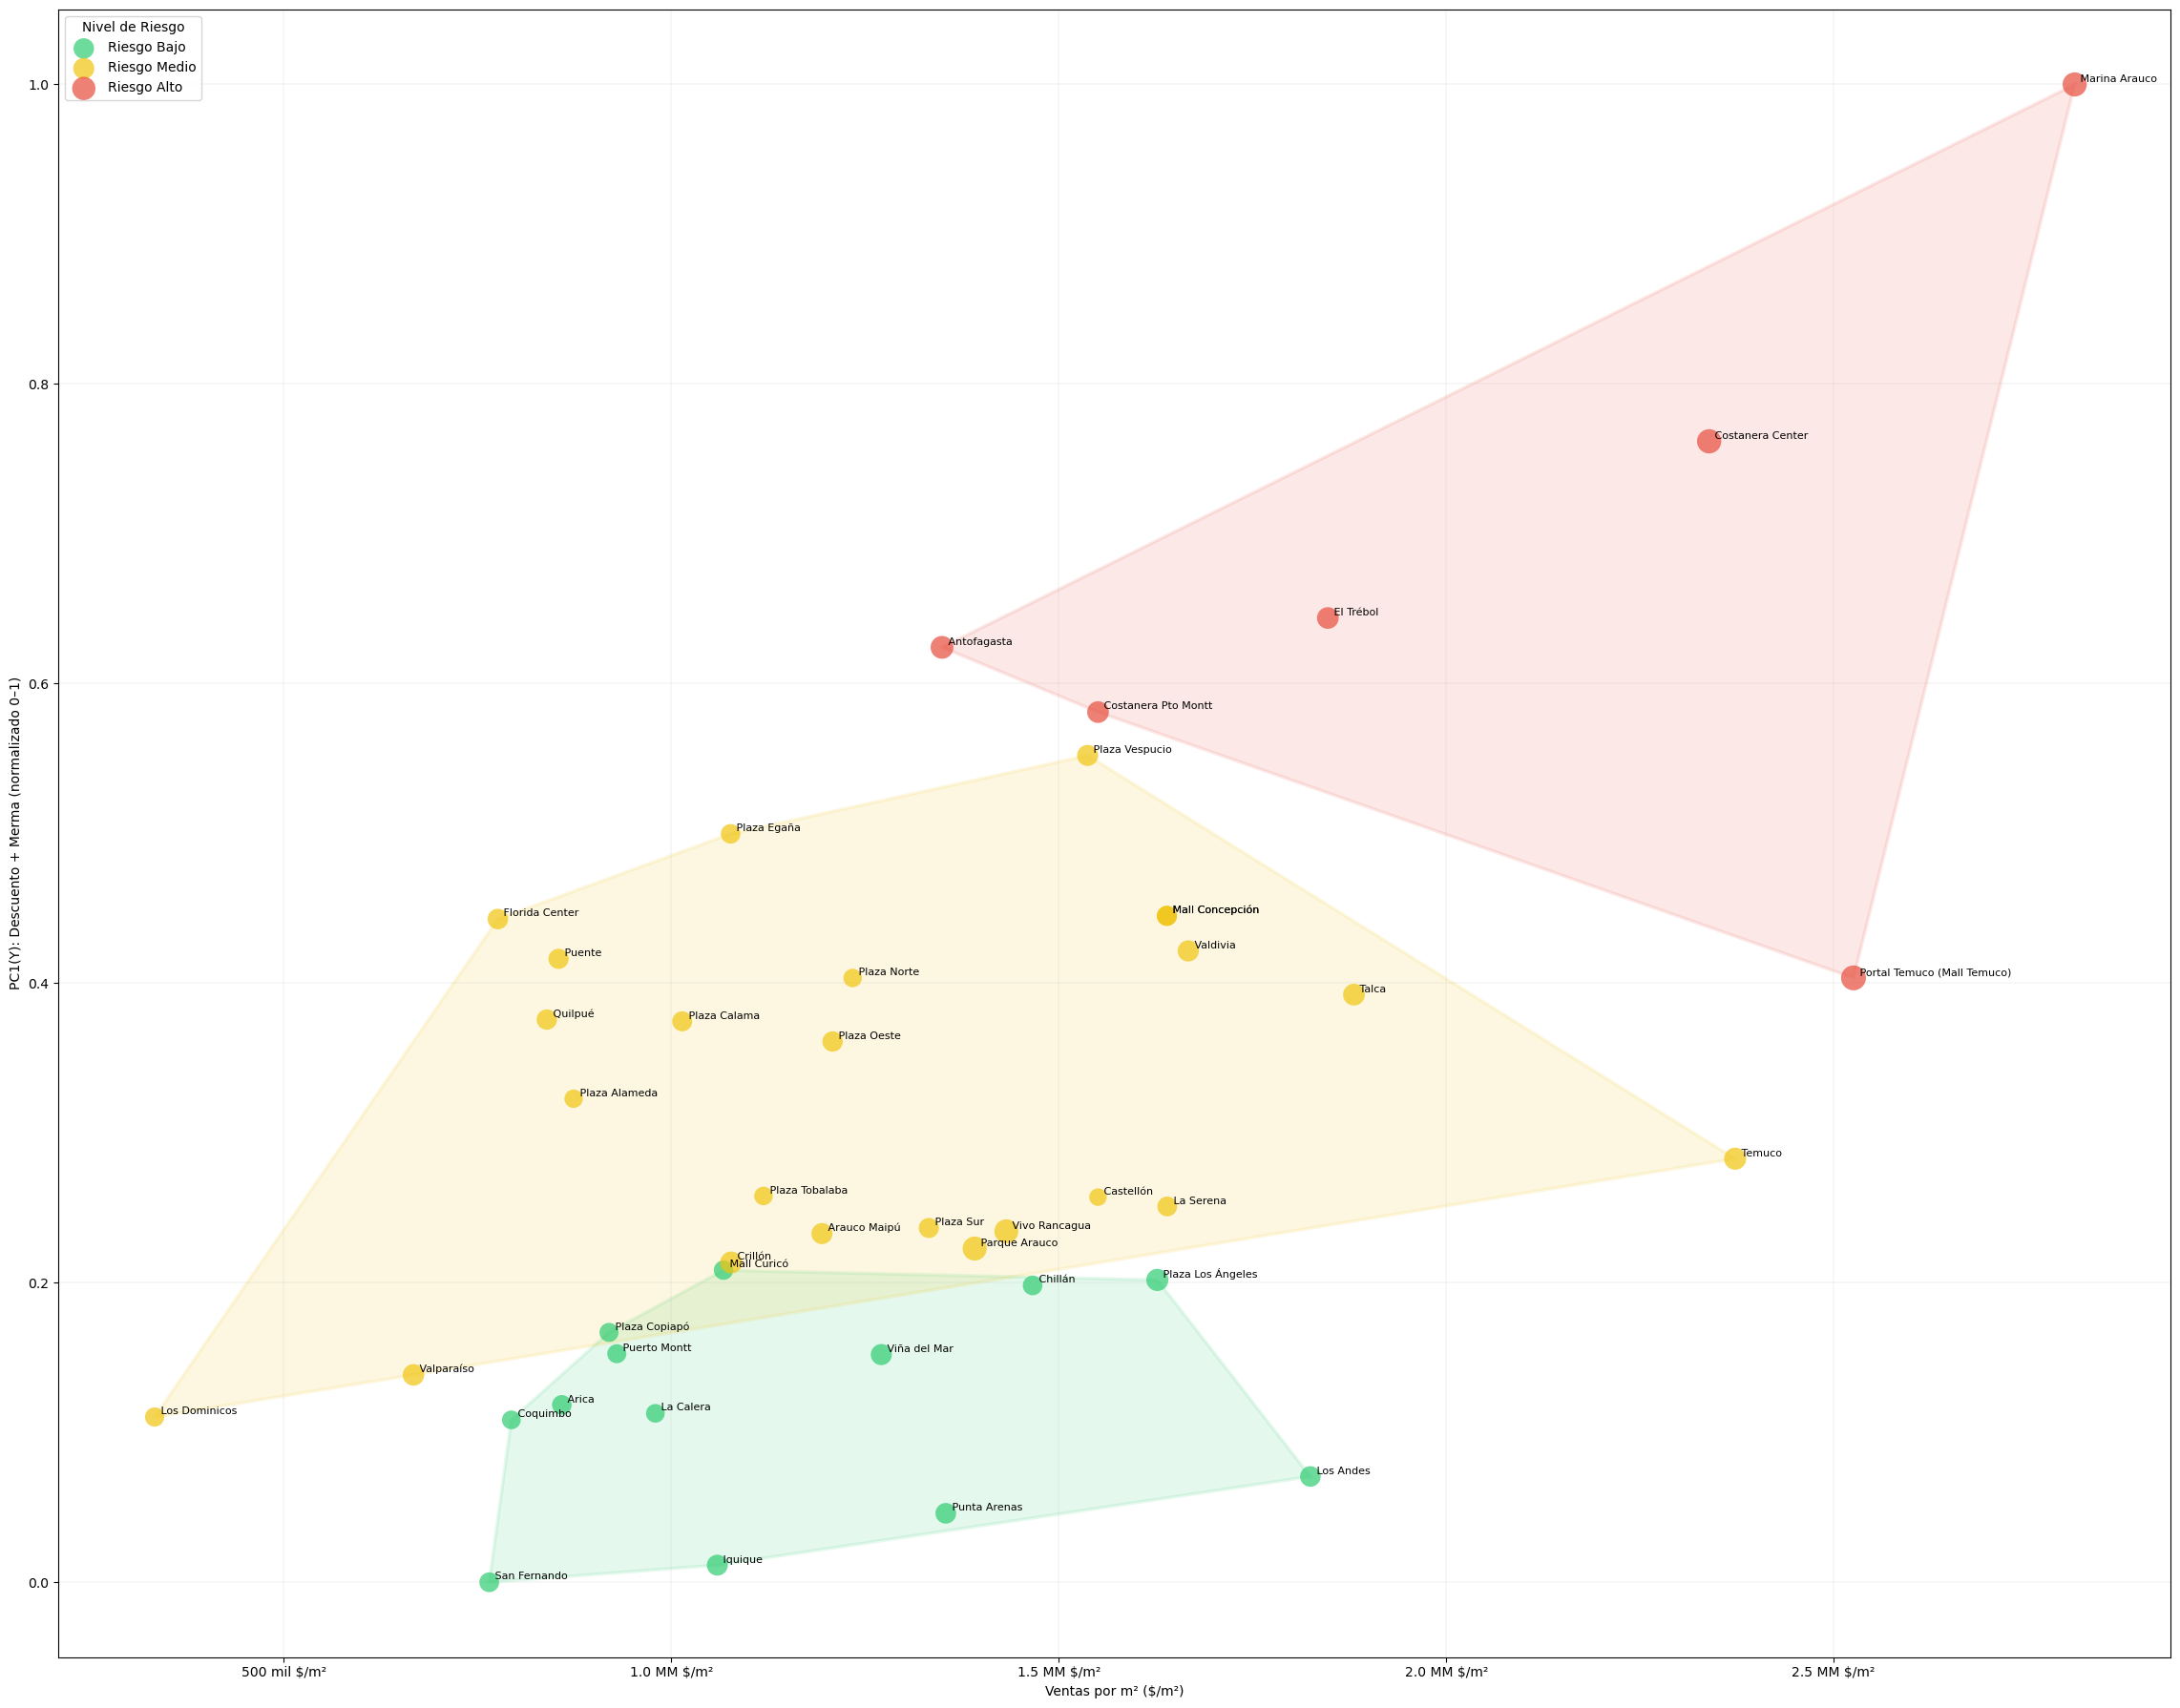

In [58]:
# ======================================= Mapa Clustering K Means =======================================
# ---------- 0) Data de entrada ----------
df = Reporte_Propuesta_6.copy()

# Columna de sucursal (busca la mejor disponible)
CAND_NOMBRE = ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']
store_col = next((c for c in CAND_NOMBRE if c in df.columns), None)

# Etiqueta de riesgo final (cae al cluster si aún no existe)
risk_col = 'Riesgo_final' if 'Riesgo_final' in df.columns else 'Riesgo_P3_MinMax_Pesos'
niveles = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]
color_map = {"Riesgo Bajo":"#2ecc71", "Riesgo Medio":"#f1c40f", "Riesgo Alto":"#e74c3c"}

# Tamaño de burbuja: usa RiskScore_P3 si existe; si no, constante
bubble_size = (df['RiskScore_P3']*600 + 20) if 'RiskScore_P3' in df.columns else pd.Series(120, index=df.index)

# ---------- 1) Coordenadas del gráfico ----------
# X = Ventas por m² en pesos (valor real)
x = pd.to_numeric(df["Ventas / Mts. 2"], errors='coerce').values
x_min, x_max = float(np.nanmin(x)), float(np.nanmax(x))

# Y = PC1(Productos_Dañados_Descuento, Costo_Merma_Destruccion, Desviacion_Meta_Merma) orientado al riesgo y normalizado 0–1
risk_vars = [v for v in ['Productos_Dañados_Descuento','Costo_Merma_Destruccion','Desviacion_Meta_Merma'] if v in X_MinMax_Scaled.columns]
if len(risk_vars) < 2:
    # Fallback simple si faltaran columnas: usa Desviacion_Meta_Merma escalada 0–1
    y_raw = pd.to_numeric(df.get('Desviacion_Meta_Merma', 0), errors='coerce').values
    y_min, y_max = float(np.nanmin(y_raw)), float(np.nanmax(y_raw))
    y = (y_raw - y_min) / (y_max - y_min + 1e-12)
else:
    pca = PCA(n_components=1, random_state=100)
    pc1 = pca.fit_transform(X_MinMax_Scaled[risk_vars].values).ravel()
    # orienta PC1 para que suba con el riesgo (si tienes RiskScore_P3 ayuda a orientar)
    if 'RiskScore_P3' in df.columns:
        if np.corrcoef(pc1, df['RiskScore_P3'].values)[0,1] < 0:
            pc1 = -pc1
    y_min, y_max = float(pc1.min()), float(pc1.max())
    y = (pc1 - y_min) / (y_max - y_min + 1e-12)

# ---------- 2) Helper: Convex Hull (cadena monotónica) ----------
def convex_hull_xy(xv, yv):
    pts = np.column_stack([xv, yv]).astype(float)
    pts = pts[~np.isnan(pts).any(axis=1)]
    if len(pts) < 3:
        return None
    pts = pts[np.lexsort((pts[:,1], pts[:,0]))]  # orden lexicográfico

    def cross(o,a,b):  # producto cruzado
        return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])

    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(tuple(p))
    upper = []
    for p in pts[::-1]:
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(tuple(p))
    hull = np.array(lower[:-1] + upper[:-1], dtype=float)
    return hull

# ---------- 3) Formateo del eje X ($/m²) ----------
def fmt_pesos_m2(val, pos):
    if val >= 1e6:  return f"{val/1e6:,.1f} MM $/m²"
    if val >= 1e3:  return f"{val/1e3:,.0f} mil $/m²"
    return f"{val:,.0f} $/m²"

# ---------- 4) Plot ----------
fig, ax = plt.subplots(figsize=(23,18))

# Puntos por nivel de riesgo
labels_riesgo = df[risk_col].astype(str).values
for lvl in niveles:
    m = (labels_riesgo == lvl)
    if m.any():
        ax.scatter(x[m], y[m],
                   s=bubble_size[m],
                   c=color_map[lvl],
                   alpha=0.70,
                   edgecolors='none',
                   label=lvl,
                   zorder=2)

# Polígonos por nivel (Convex Hull)
for lvl in niveles:
    m = (labels_riesgo == lvl)
    xv, yv = x[m], y[m]
    if m.sum() >= 3:
        poly = convex_hull_xy(xv, yv)
        if poly is not None:
            ax.add_patch(Polygon(poly, closed=True,
                                 facecolor=color_map[lvl],
                                 edgecolor=color_map[lvl],
                                 alpha=0.12, lw=2.6, zorder=1))
    elif m.sum() == 2:
        p = np.column_stack([xv, yv])
        c = p.mean(axis=0); d = (p[1]-p[0])*0.05
        rh = np.array([c+d, c+[d[0],-d[1]], c-d, c+[-d[0],d[1]]])
        ax.add_patch(Polygon(rh, closed=True,
                             facecolor=color_map[lvl],
                             edgecolor=color_map[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif m.sum() == 1:
        ax.scatter(xv, yv, s=900, c=color_map[lvl], alpha=0.10, edgecolors='none', zorder=1)

# Etiquetas de sucursal
if store_col:
    for xi, yi, txt in zip(x, y, df[store_col].astype(str).values):
        ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                    textcoords="offset points", fontsize=8)

# Ejes y estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(fmt_pesos_m2))
ax.set_xlabel("Ventas por m² ($/m²)")
ax.set_ylabel("PC1(Y): Descuento + Merma (normalizado 0–1)")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')

plt.tight_layout()
plt.savefig("mapa_riesgo_convexhull.png", dpi=300, bbox_inches='tight')
print("Listo: 'mapa_riesgo_convexhull.png'")

In [59]:
Reporte_Propuesta_6.to_excel("Reporte_Propuesta_6_Indice Merma de Destruccion.xlsx", index=False)

In [60]:
def _construir_conclusiones__ripley(reporte_base, X_minmax, pesos_dict, reporte_final, top_n=3):
    """
    Reglas actualizadas:
      - Excluir 'Ventas / Mts. 2' e 'Indice_Inseguridad'.
      - 'Desviacion_Meta_Merma' solo si es NEGATIVA; mostrar con 6 decimales (no %).
      - 'NC / Ventas': incluir p95 en el texto; añadir si ≥ p95 o si lo disparó la regla.
      - 'Costo_Merma_Destruccion':
            * usar MAGNITUD ABSOLUTA para decidir si aparece (distancia a 0),
            * por contribución: exigir |valor| >= p60(|x|),
            * por outlier: promover si |valor| >= p95(|x|),
            * si |valor| es el MÁXIMO absoluto del conjunto, forzar su inclusión al inicio.
      - 'Productos_Dañados_Descuento':
            * por contribución: exigir valor >= p60,
            * por outlier: promover si ≥ p95,
            * forzar inclusión si Motivo_Regla lo indica o si valor ≥ p85.
      - 'N° Recuperos 2025' y 'Reclamos_Cantidad_2025': promover desde p90 (y si es máximo).
      - Riesgo Alto: 4 drivers; Riesgo Medio: 3 drivers.
    """
    import pandas as pd
    import numpy as np

    # --- Config solicitada ---
    _EXCLUIR = {'Ventas / Mts. 2', 'Indice_Inseguridad'}
    _SOLO_NEGATIVO = {'Desviacion_Meta_Merma', 'Desviacion Meta Merme'}
    _PRIORIDAD_OUTLIERS = [
        'N° Accidentes',
        'Total_Notas_Credito',
        'Reclamos_Cantidad_2025',
        'N° Recuperos 2025',
        'Juicios_Laborales',
        'N° Multas',
        'Costo_Merma_Destruccion',
        'Productos_Dañados_Descuento',
        'Rot_2025',
        'Desviacion_Meta_Merma', 'Desviacion Meta Merme',
    ]
    _UMBRAL_ESPECIFICO_Q = {       # umbrales de promoción por outlier
        'N° Recuperos 2025': 0.90,
        'Reclamos_Cantidad_2025': 0.90,
        # resto usa 0.95
    }
    _FILTRAR_ALTO_CONTRIB_Q = {    # exigir “alto” por contribución
        'Productos_Dañados_Descuento': 0.60,
        # 'Costo_Merma_Destruccion' se maneja con ABS más abajo
    }
    _FORZAR_SI_GE_Q = {            # forzar inclusión si supera este percentil
        'Productos_Dañados_Descuento': 0.85,
    }
    _ABS_MAG_COLS = {'Costo_Merma_Destruccion'}  # columnas que se evalúan por |valor|

    # Pesos y contribuciones coherentes con tu score
    w = pd.Series(pesos_dict).reindex(X_minmax.columns).fillna(0.0)
    contrib = X_minmax.mul(w, axis=1)

    # Estadísticos por columna (raw y absolutos cuando aplique)
    def _stats(s):
        s = pd.to_numeric(s, errors='coerce')
        if not s.notna().any():
            return {
                'max': np.nan, 'q95': np.nan, 'q90': np.nan, 'q85': np.nan, 'q60': np.nan, 'q50': np.nan, 'q05': np.nan,
                'abs_max': np.nan, 'abs_q95': np.nan, 'abs_q90': np.nan, 'abs_q60': np.nan
            }
        s_abs = s.abs()
        return {
            'max': s.max(skipna=True),
            'q95': s.quantile(0.95),
            'q90': s.quantile(0.90),
            'q85': s.quantile(0.85),
            'q60': s.quantile(0.60),
            'q50': s.quantile(0.50),
            'q05': s.quantile(0.05),
            'abs_max': s_abs.max(skipna=True),
            'abs_q95': s_abs.quantile(0.95),
            'abs_q90': s_abs.quantile(0.90),
            'abs_q60': s_abs.quantile(0.60),
        }

    stats = {}
    cols_stats = set(_PRIORIDAD_OUTLIERS) | set(_FILTRAR_ALTO_CONTRIB_Q) | set(_FORZAR_SI_GE_Q) | _ABS_MAG_COLS
    for col in cols_stats:
        if col in reporte_base.columns:
            stats[col] = _stats(reporte_base[col])

    # p95 para NC/Ventas (vive en reporte_final)
    p95_ncv = np.nan
    if 'NC / Ventas' in reporte_final.columns:
        ncv_series = pd.to_numeric(reporte_final['NC / Ventas'], errors='coerce')
        if ncv_series.notna().any():
            p95_ncv = ncv_series.quantile(0.95)

    def _es_negativo(col, v):
        try:
            return (col in _SOLO_NEGATIVO) and (float(pd.to_numeric(v, errors='coerce')) < 0)
        except Exception:
            return False

    def _valor_tal_cual(col, raw_val):
        # Desviación: 6 decimales, sin % ni formato
        if col in _SOLO_NEGATIVO:
            try:
                fv = float(pd.to_numeric(raw_val, errors='coerce'))
                return f"{fv:.6f}"
            except Exception:
                return str(raw_val)
        # Resto con formateo estándar
        return _fmt_val__ripley(col, raw_val)

    def _detallar_outlier(col, v):
        """Añade tags por outlier; para NC/Ventas agrega p95 y marca ≥p95.
           Para Costo_Merma_Destruccion usa umbrales de |valor|."""
        if col == 'NC / Ventas':
            if v is None or pd.isna(v):
                return ""
            tag_p95 = f" (p95={_fmt_pct__ripley(p95_ncv)})" if pd.notna(p95_ncv) else ""
            try:
                ge = (pd.notna(p95_ncv) and float(v) >= float(p95_ncv))
            except Exception:
                ge = False
            return (" (≥p95)" if ge else "") + tag_p95

        if col not in stats or v is None or pd.isna(v):
            return ""
        st = stats[col]
        try:
            fv = float(pd.to_numeric(v, errors='coerce'))
        except Exception:
            return ""

        # Desviación: solo negativa; destacar si ≤ p5
        if col in _SOLO_NEGATIVO:
            if fv < 0 and pd.notna(st['q05']) and fv <= st['q05']:
                return " (≤p5 del conjunto)"
            return ""

        # Costo Merma por |valor|
        if col in _ABS_MAG_COLS:
            fav = abs(fv)
            if pd.notna(st['abs_max']) and fav == st['abs_max']:
                return " (mayor |valor| del conjunto)"
            if pd.notna(st['abs_q95']) and fav >= st['abs_q95']:
                return " (|valor| ≥ p95 del conjunto)"
            return ""

        # Resto: outlier alto por valor (no absoluto)
        q_key = 'q95'
        if col in _UMBRAL_ESPECIFICO_Q:
            q_key = 'q90'
        qv = st.get(q_key, np.nan)
        if pd.notna(st['max']) and fv == st['max']:
            return " (mayor del conjunto)"
        if pd.notna(qv) and fv >= qv:
            return f" (≥p{int(float(q_key[1:]))} del conjunto)"
        return ""

    textos = []
    for i in reporte_base.index:
        riesgo = reporte_final.loc[i, 'Riesgo_final'] if 'Riesgo_final' in reporte_final.columns else reporte_base.loc[i, 'Cluster_Riesgo']
        top_n_row = 4 if str(riesgo) == 'Riesgo Alto' else 3
        if riesgo not in ('Riesgo Medio', 'Riesgo Alto'):
            textos.append("—")
            continue

        # Ranking por contribución (aplicando filtros y excluidos)
        c_sorted = contrib.loc[i].sort_values(ascending=False)
        cand_contrib = []
        for col in c_sorted.index:
            if w.get(col, 0) <= 0 or col in _EXCLUIR:
                continue
            # Desviación: solo negativa
            if col in _SOLO_NEGATIVO:
                val = reporte_base.loc[i, col] if col in reporte_base.columns else None
                if not _es_negativo(col, val):
                    continue
            # Dañados: exigir valor >= p60
            if col in _FILTRAR_ALTO_CONTRIB_Q and col in reporte_base.columns:
                st = stats.get(col, {})
                vraw = pd.to_numeric(reporte_base.loc[i, col], errors='coerce')
                if pd.isna(vraw) or pd.isna(st.get('q60')) or float(vraw) < float(st['q60']):
                    continue
            # Merma destrucción: exigir |valor| >= p60(|x|)
            if col in _ABS_MAG_COLS and col in reporte_base.columns:
                st = stats.get(col, {})
                vraw = pd.to_numeric(reporte_base.loc[i, col], errors='coerce')
                if pd.isna(vraw) or pd.isna(st.get('abs_q60')) or abs(float(vraw)) < float(st['abs_q60']):
                    continue
            cand_contrib.append(col)

        # Promoción de outliers (accidentes, NC, recuperos, etc.)
        cand_out = []
        for col in _PRIORIDAD_OUTLIERS:
            if col not in reporte_base.columns or col in _EXCLUIR:
                continue
            val = pd.to_numeric(reporte_base.loc[i, col], errors='coerce')
            if pd.isna(val):
                continue

            if col in _SOLO_NEGATIVO:
                if _es_negativo(col, val):
                    cand_out.append(col)
            elif col in _ABS_MAG_COLS:
                st = stats.get(col, {})
                fav = abs(float(val))
                # outlier por |valor| (abs)
                if (pd.notna(st.get('abs_max')) and fav == st['abs_max']) or (pd.notna(st.get('abs_q95')) and fav >= st['abs_q95']):
                    cand_out.append(col)
            else:
                st = stats.get(col, {})
                q_key = 'q95'
                if col in _UMBRAL_ESPECIFICO_Q:
                    q_key = 'q90'
                qv = st.get(q_key, np.nan)
                if (pd.notna(st.get('max')) and float(val) == st['max']) or (pd.notna(qv) and float(val) >= qv):
                    cand_out.append(col)

        # NC/Ventas como driver si ≥ p95 o si lo disparó la regla
        incluir_ncv = False
        if 'NC / Ventas' in reporte_final.columns:
            ncv_val = pd.to_numeric(reporte_final.loc[i, 'NC / Ventas'], errors='coerce')
            if pd.notna(p95_ncv) and pd.notna(ncv_val) and float(ncv_val) >= float(p95_ncv):
                incluir_ncv = True

        # Forzar Dañados por regla o valor ≥ p85
        mot = str(reporte_final.loc[i, 'Motivo_Regla']) if 'Motivo_Regla' in reporte_final.columns and pd.notna(reporte_final.loc[i, 'Motivo_Regla']) else ""
        forzar_dan = False
        if 'Productos_Dañados_Descuento' in reporte_base.columns:
            st_dan = stats.get('Productos_Dañados_Descuento', {})
            val_dan = pd.to_numeric(reporte_base.loc[i, 'Productos_Dañados_Descuento'], errors='coerce')
            thr85 = st_dan.get('q85', np.nan)
            if ('Dañados' in mot) or (pd.notna(val_dan) and pd.notna(thr85) and float(val_dan) >= float(thr85)):
                forzar_dan = True

        # Unión ordenada: primero extremos, luego contribución
        seen, union = set(), []
        for col in (cand_out + cand_contrib):
            if col not in seen:
                union.append(col); seen.add(col)

        # Inserciones forzadas
        if incluir_ncv and 'NC / Ventas' not in union:
            union.insert(0, 'NC / Ventas')
        if forzar_dan:
            if 'Productos_Dañados_Descuento' in union:
                union.remove('Productos_Dañados_Descuento')
            union.insert(0, 'Productos_Dañados_Descuento')

        # Si esta tienda tiene el mayor |valor| en Merma de destrucción, forzamos su aparición al inicio
        if 'Costo_Merma_Destruccion' in reporte_base.columns and 'Costo_Merma_Destruccion' in stats:
            v_merma = pd.to_numeric(reporte_base.loc[i, 'Costo_Merma_Destruccion'], errors='coerce')
            st_merma = stats['Costo_Merma_Destruccion']
            if pd.notna(v_merma) and pd.notna(st_merma.get('abs_max')) and abs(float(v_merma)) == float(st_merma['abs_max']):
                if 'Costo_Merma_Destruccion' in union:
                    union.remove('Costo_Merma_Destruccion')
                union.insert(0, 'Costo_Merma_Destruccion')

        top = union[:top_n_row]

        # Construcción de frases
        frases = []
        for col in top:
            if col == 'NC / Ventas':
                v = reporte_final.loc[i, 'NC / Ventas'] if 'NC / Ventas' in reporte_final.columns else np.nan
                detalle = _detallar_outlier('NC / Ventas', v)
                frases.append(f"NC/Ventas {_fmt_pct__ripley(v)}{detalle}")
                continue
            alias = _ALIAS_TXT__RIPLEY.get(col, col)
            val_raw = reporte_base.loc[i, col] if col in reporte_base.columns else None
            detalle = _detallar_outlier(col, val_raw)
            frases.append(f"{alias} {_valor_tal_cual(col, val_raw)}{detalle}")

        # Regla post (si existe)
        detalle_regla = ""
        if mot.strip():
            if 'NC / Ventas' in reporte_final.columns and pd.notna(reporte_final.loc[i,'NC / Ventas']):
                extra_p95 = f", p95={_fmt_pct__ripley(p95_ncv)}" if pd.notna(p95_ncv) else ""
                detalle_regla = f"; ajuste por regla ({mot}, NC/Ventas={_fmt_pct__ripley(reporte_final.loc[i,'NC / Ventas'])}{extra_p95})"
            else:
                detalle_regla = f"; ajuste por regla ({mot})"

        if len(frases) == 0:
            txt = "Catalogada por: sin drivers destacados (ver regla si aplica)"
        elif len(frases) == 1:
            txt = f"Catalogada por: {frases[0]}"
        else:
            txt = "Catalogada por: " + ", ".join(frases[:-1]) + " y " + frases[-1]

        textos.append(txt + detalle_regla)

    return pd.Series(textos, index=reporte_base.index)

In [61]:
# === PRUEBA AISLADA SOBRE TU EXCEL ACTUAL (OPCIONAL) ===
import pandas as _pd, numpy as _np

_ruta_in  = "Resultados_Clustering_Modelo 2.xlsx"
_ruta_out = "Resultados_Clustering_Modelo 2_con_conclusiones.xlsx"
_pesos_loc = {
    'Ventas / Mts. 2': 0.13, 'Total_Notas_Credito': 0.100, 'Desviacion_Meta_Merma': 0.155,
    'Productos_Dañados_Descuento': 0.145, 'Costo_Merma_Destruccion': 0.14,
    'N° Accidentes': 0.070, 'Reclamos_Cantidad_2025': 0.070, "N° Multas": 0.03,
    "N° Recuperos 2025": 0.050, "Indice_Inseguridad": 0.010, "Rot_2025": 0.03,
    "Juicios_Laborales": 0.03, "Total_Ventas": 0.0
}

_rep_in = _pd.read_excel(_ruta_in, sheet_name="Reporte")
_cols = [c for c in _pesos_loc if c in _rep_in.columns]
_X = _rep_in[_cols].astype(float).fillna(0.0).copy()
_min = _X.min(); _max = _X.max(); _den = (_max - _min).replace(0, _np.nan)
_Xmm = ((_X - _min) / _den).fillna(0.0)

# “Motivo_Regla” no existe en tu Excel; lo creamos vacío para que el helper no falle
if "Motivo_Regla" not in _rep_in.columns:
    _rep_in["Motivo_Regla"] = ""

_rep_out = _rep_in.copy()
_rep_out["Conclusiones"] = _construir_conclusiones__ripley(_rep_in, _Xmm, _pesos_loc, _rep_in, top_n=3)

with _pd.ExcelWriter(_ruta_out, engine="xlsxwriter") as _w:
    _rep_out.to_excel(_w, sheet_name="Reporte", index=False)
print("Archivo generado:", _ruta_out)

NameError: name '_ALIAS_TXT__RIPLEY' is not defined

### Convertir DataFrame y Resultados a Mapa para presentacion

In [65]:
import pandas as pd, numpy as np, re, unicodedata
import plotly.express as px, plotly.io as pio
from itertools import combinations

pio.renderers.default = "notebook_connected"  # o "vscode"/"browser"

# ---------------- 0) Fuente de datos ----------------
if 'Reporte_Propuesta_6' in globals() and isinstance(Reporte_Propuesta_6, pd.DataFrame):
    base = Reporte_Propuesta_6.copy()
elif 'Df_Kmeans' in globals() and isinstance(Df_Kmeans, pd.DataFrame):
    base = Df_Kmeans.copy()
else:
    raise RuntimeError("No encuentro Reporte_Propuesta_6 ni Df_Kmeans para graficar.")

# columna de nombre (flexible)
CAND_NAME = ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal','Sucursal']
name_col = next((c for c in CAND_NAME if c in base.columns), None)
if not name_col:
    raise KeyError("No encuentro columna de nombre de sucursal.")

# columna de riesgo (flexible)
CAND_RISK = ['Riesgo_final','Cluster_Riesgo','Riesgo_P3_MinMax_Pesos']
RIESGO_COL = next((c for c in CAND_RISK if c in base.columns), None)
if not RIESGO_COL:
    raise KeyError("No encuentro columna de riesgo (Riesgo_final / Cluster_Riesgo / Riesgo_P3_MinMax_Pesos).")

# estándar de nombres
df_plot = base.rename(columns={name_col:'Nombre_Sucursal'}).copy()

# ---------------- 1) Normalizador ----------------
def _norm(s: str) -> str:
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = re.sub(r"\s+", " ", s)
    return s

df_plot["__key"] = df_plot["Nombre_Sucursal"].map(_norm)

# ---------------- 2) Coordenadas directas por sucursal ----------------
coords = {
    "antofagasta": (-23.6500, -70.4000),
    "arauco maipu": (-33.5021, -70.7561),  # Maipú
    "arica": (-18.4783, -70.3126),
    "castellon": (-36.82699, -73.04977),   # Concepcion centro
    "chillan": (-36.6066, -72.1034),
    "coquimbo": (-29.9533, -71.3436),
    "costanera center": (-33.4179, -70.6066),  # Providencia
    "costanera pto montt": (-41.4693, -72.9424),
    "crillon": (-33.4410, -70.6480),       # Santiago centro
    "el trebol": (-36.7901, -73.0867),     # Talcahuano
    "florida center": (-33.5014, -70.5989),
    "iquique": (-20.2133, -70.1517),
    "la calera": (-32.7870, -71.1950),
    "la serena": (-29.9027, -71.2519),
    "los andes": (-32.8330, -70.5980),
    "los dominicos": (-33.4085, -70.5515),
    "mall concepcion": (-36.82698, -73.04955),
    "mall curico": (-34.9837, -71.2384),
    "marina arauco": (-33.0245, -71.5516), # Viña del Mar
    "parque arauco": (-33.4019, -70.5724),
    "plaza alameda": (-33.4564, -70.6636),
    "plaza calama": (-22.4563, -68.9235),
    "plaza copiapo": (-27.3668, -70.3311),
    "plaza egana": (-33.4562, -70.5652),
    "plaza los angeles": (-37.4697, -72.3537),
    "plaza norte": (-33.3664, -70.6581),   # Huechuraba
    "plaza oeste": (-33.4957, -70.7078),   # Cerrillos/Maipú
    "plaza sur": (-33.5923, -70.7041),     # San Bernardo
    "plaza tobalaba": (-33.5129, -70.5791),
    "plaza vespucio": (-33.5229, -70.5977),
    "portal temuco (mall temuco)": (-38.7393, -72.5987),
    "portal temuco": (-38.7393, -72.5987),
    "puente": (-33.6073, -70.5758),        # Puente Alto (ajustado)
    "puerto montt": (-41.4689, -72.9411),
    "punta arenas": (-53.1638, -70.9171),
    "quilpue": (-33.0450, -71.4429),
    "san fernando": (-34.5861, -70.9859),
    "talca": (-35.4290, -71.6618),
    "temuco": (-38.7359, -72.5904),
    "valdivia": (-39.8196, -73.2452),
    "valparaiso": (-33.0472, -71.6127),
    "vina del mar": (-33.0245, -71.5518),
    "vivo rancagua": (-34.1701, -70.7441),
}

df_plot["lat"] = df_plot["__key"].map(lambda k: coords.get(k, (np.nan,np.nan))[0])
df_plot["lon"] = df_plot["__key"].map(lambda k: coords.get(k, (np.nan,np.nan))[1])

# avisos
missing = df_plot["lat"].isna() | df_plot["lon"].isna()
if missing.any():
    print("⚠ Falta asignar coordenadas a estas sucursales (agrega la clave a coords):")
    print(df_plot.loc[missing, ["Nombre_Sucursal","__key"]].to_string(index=False))

# quedarnos con coords válidas
df_plot = df_plot.loc[~missing].copy()
df_plot["lat"] = pd.to_numeric(df_plot["lat"], errors="coerce")
df_plot["lon"] = pd.to_numeric(df_plot["lon"], errors="coerce")

# ---------------- 3) Riesgo + formateos + Detalle ----------------
df_plot["Riesgo"] = df_plot[RIESGO_COL].astype(str)
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
colores = {"Riesgo Alto": "#e74c3c", "Riesgo Medio": "#f1c40f", "Riesgo Bajo": "#2ecc71"}
presentes = [r for r in orden_riesgo if r in df_plot["Riesgo"].unique()]

if "Productos_Dañados_Descuento" in df_plot.columns:
    df_plot["Prod_Danados_fmt"] = pd.to_numeric(df_plot["Productos_Dañados_Descuento"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Prod_Danados_fmt"] = np.nan

if "Total_Notas_Credito" in df_plot.columns:
    df_plot["Total_NC_fmt"] = pd.to_numeric(df_plot["Total_Notas_Credito"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Total_NC_fmt"] = np.nan

if "Desviacion_Meta_Merma" in df_plot.columns:
    df_plot["Desv_Meta_Merma_fmt"] = pd.to_numeric(df_plot["Desviacion_Meta_Merma"], errors="coerce") \
                                     .map(lambda v: f"{v:.4f}" if pd.notna(v) else "n/d")
else:
    df_plot["Desv_Meta_Merma_fmt"] = np.nan

if "Costo_Merma_Destruccion" in df_plot.columns:
    df_plot["Costo_Merma_fmt"] = pd.to_numeric(df_plot["Costo_Merma_Destruccion"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Costo_Merma_fmt"] = np.nan

if "N° Multas" in df_plot.columns:
    df_plot["N_Multas_fmt"] = pd.to_numeric(df_plot["N° Multas"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Multas_fmt"] = np.nan

if "Total_Reclamos" in df_plot.columns:
    df_plot["Total_Reclamos_fmt"] = pd.to_numeric(df_plot["Total_Reclamos"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["Total_Reclamos_fmt"] = np.nan

if "N° Accidentes" in df_plot.columns:
    df_plot["N_Accidentes_fmt"] = pd.to_numeric(df_plot["N° Accidentes"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Accidentes_fmt"] = np.nan

if "N° Recuperos 2025" in df_plot.columns:
    df_plot["N_Recuperos_fmt"] = pd.to_numeric(df_plot["N° Recuperos 2025"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Recuperos_fmt"] = np.nan

# Detalle (masks por __key)
df_plot["Detalle"] = np.nan
mask_plaza_calama        = df_plot["__key"] == "plaza calama"
mask_plaza_arauco_maipu  = df_plot["__key"] == "arauco maipu"
mask_castellon           = df_plot["__key"] == "castellon"
mask_florida_center      = df_plot["__key"] == "florida center"
mask_la_serena           = df_plot["__key"] == "la serena"
mask_mall_concepcion     = df_plot["__key"] == "mall concepcion"
mask_parque_arauco       = df_plot["__key"] == "parque arauco"
mask_plaza_alameda       = df_plot["__key"] == "plaza alameda"
mask_plaza_egana         = df_plot["__key"] == "plaza egana"
mask_plaza_norte         = df_plot["__key"] == "plaza norte"
mask_plaza_sur           = df_plot["__key"] == "plaza sur"
mask_plaza_oeste         = df_plot["__key"] == "plaza oeste"
mask_plaza_tobalaba      = df_plot["__key"] == "plaza tobalaba"
mask_plaza_vespucio      = df_plot["__key"] == "plaza vespucio"
mask_puente              = df_plot["__key"] == "puente"
mask_quilpue             = df_plot["__key"] == "quilpue"
mask_talca               = df_plot["__key"] == "talca"
mask_temuco              = df_plot["__key"] == "temuco"
mask_valdivia            = df_plot["__key"] == "valdivia"
mask_valparaiso          = df_plot["__key"] == "valparaiso"
mask_rancagua            = df_plot["__key"] == "vivo rancagua"
mask_antofagasta         = df_plot["__key"] == "antofagasta"
mask_costanera_center    = df_plot["__key"] == "costanera center"
mask_costanera_pto_montt = df_plot["__key"] == "costanera pto montt"
mask_marina_arauco       = df_plot["__key"] == "marina arauco"
mask_trebol              = df_plot["__key"] == "el trebol"
mask_portal_temuco       = df_plot["__key"] == "portal temuco (mall temuco)"
mask_los_dominicos      = df_plot["__key"] == "los dominicos"
mask_crillon            = df_plot["__key"] == "crillon"


df_plot.loc[mask_antofagasta, "Detalle"] = (
    "sucursal catalogada por su descuento en productos dañados = "
    + df_plot.loc[mask_antofagasta, "Prod_Danados_fmt"].astype(str)
    + " por su costo en merma de destruccion = "
    + df_plot.loc[mask_antofagasta, "Costo_Merma_fmt"].astype(str)
    + "y por su numero de multas = "
    + df_plot.loc[mask_antofagasta, "N_Multas_fmt"].astype(str)
)

df_plot.loc[mask_costanera_center, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_costanera_center, "Total_NC_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_costanera_center, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_costanera_center, "Prod_Danados_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_costanera_center, "Costo_Merma_fmt"].astype(str)
    + "por su numero de recuperos = "
    + df_plot.loc[mask_costanera_center, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_costanera_pto_montt, "Detalle"] = (
    "sucursal catalogada por su costo en merma de destruccion = "
    + df_plot.loc[mask_costanera_pto_montt, "Costo_Merma_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_costanera_pto_montt, "Prod_Danados_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_costanera_pto_montt, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su numero de accidentes = "
    + df_plot.loc[mask_costanera_pto_montt, "N_Accidentes_fmt"].astype(str)
    + " y por su numero de recuperos = "
    + df_plot.loc[mask_costanera_pto_montt, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_marina_arauco, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_marina_arauco, "Total_NC_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_marina_arauco, "Prod_Danados_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_marina_arauco, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_marina_arauco, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_trebol, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_trebol, "Total_NC_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_trebol, "Prod_Danados_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_trebol, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_trebol, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_portal_temuco, "Detalle"] = (
    " Sucursal catalogada por su descuento en productos dañados = "
    + df_plot.loc[mask_portal_temuco, "Prod_Danados_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_portal_temuco, "Total_Reclamos_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_portal_temuco, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de multas = "
    + df_plot.loc[mask_portal_temuco, "N_Multas_fmt"].astype(str)
)

df_plot.loc[mask_valparaiso, "Detalle"] = (
    "sucursal catalogada por su numero de reclamos = "
    + df_plot.loc[mask_valparaiso, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_valparaiso, "N_Accidentes_fmt"].astype(str)
)

df_plot.loc[mask_rancagua, "Detalle"] = (
    "sucursal catalogada por su costo de merma destruccion = "
    + df_plot.loc[mask_rancagua, "Costo_Merma_fmt"].astype(str)
    + " por su numero de descuento en productos dañados = "
    + df_plot.loc[mask_rancagua, "Prod_Danados_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_rancagua, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_rancagua, "N_Accidentes_fmt"].astype(str)
)

df_plot.loc[mask_valdivia, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_valdivia, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su costo en merma de destruccion = "
    + df_plot.loc[mask_valdivia, "Costo_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_valdivia, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_temuco, "Detalle"] = (
    "sucursal catalogada por su costo de merma de destruccion = "
    + df_plot.loc[mask_temuco, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de reclamos = "
    + df_plot.loc[mask_temuco, "Total_Reclamos_fmt"].astype(str)
)

df_plot.loc[mask_talca, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_talca, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su descuento de productos dañados = "
    + df_plot.loc[mask_talca, "Prod_Danados_fmt"].astype(str)
    + "por su numero de accidentes = "
    + df_plot.loc[mask_talca, "N_Accidentes_fmt"].astype(str)
    + " y por su numero de reclamos = "
    + df_plot.loc[mask_talca, "Total_Reclamos_fmt"].astype(str)
)

df_plot.loc[mask_quilpue, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_quilpue, "Desv_Meta_Merma_fmt"].astype(str)
)

df_plot.loc[mask_puente, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_puente, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_puente, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_plaza_vespucio, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_vespucio, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su monto de merma destruccion = "
    + df_plot.loc[mask_plaza_vespucio, "Costo_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_plaza_vespucio, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_plaza_tobalaba, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_tobalaba, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de articulos recuperados = "
    + df_plot.loc[mask_plaza_tobalaba, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_plaza_oeste, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_oeste, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su monto de merma destruccion = "
    + df_plot.loc[mask_plaza_oeste, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de recuperos = "
    + df_plot.loc[mask_plaza_oeste, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_plaza_sur, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_sur, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_plaza_sur, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_plaza_sur, "N_Accidentes_fmt"].astype(str)
)

df_plot.loc[mask_plaza_norte, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_norte, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de NC = "
    + df_plot.loc[mask_plaza_norte, "Total_NC_fmt"].astype(str)
)

df_plot.loc[mask_plaza_calama, "Detalle"] = (
    "sucursal catalogada por Descuento_Productos_Dañados = "
    + df_plot.loc[mask_plaza_calama, "Prod_Danados_fmt"].astype(str)
)
df_plot.loc[mask_plaza_arauco_maipu, "Detalle"] = (
    "sucursal catalogada por Descuento_Productos_Dañados = "
    + df_plot.loc[mask_plaza_arauco_maipu, "Total_NC_fmt"].astype(str)
)
df_plot.loc[mask_castellon, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_castellon, "Desv_Meta_Merma_fmt"].astype(str)
)
df_plot.loc[mask_florida_center, "Detalle"] = (
    "sucursal catalogada por Costo_Merma_Destruccion = "
    + df_plot.loc[mask_florida_center, "Costo_Merma_fmt"].astype(str)
)
df_plot.loc[mask_la_serena, "Detalle"] = (
    "sucursal catalogada por N°_Multas="
    + df_plot.loc[mask_la_serena, "N_Multas_fmt"].astype(str)
    + " y no cumplir la meta de inventario = "
    + df_plot.loc[mask_la_serena, "Desv_Meta_Merma_fmt"].astype(str)
)
df_plot.loc[mask_mall_concepcion, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_mall_concepcion, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su elevado monto de merma de destruccion = "
    + df_plot.loc[mask_mall_concepcion, "Costo_Merma_fmt"].astype(str)
)
df_plot.loc[mask_parque_arauco, "Detalle"] = (
    "sucursal catalogada por sus NC="
    + df_plot.loc[mask_parque_arauco, "Total_NC_fmt"].astype(str)
    + " por su numero de reclamos="
    + df_plot.loc[mask_parque_arauco, "Total_Reclamos_fmt"].astype(str)
    + " por su elevado numero de accidentes = "
    + df_plot.loc[mask_parque_arauco, "N_Accidentes_fmt"].astype(str)
    + " y por su numero de multas = "
    + df_plot.loc[mask_parque_arauco, "N_Multas_fmt"].astype(str)
)
df_plot.loc[mask_plaza_alameda, "Detalle"] = (
    "sucursal catalogada por incumplir su meta de inventario="
    + df_plot.loc[mask_plaza_alameda, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de recuperos = "
    + df_plot.loc[mask_plaza_alameda, "N_Recuperos_fmt"].astype(str)
)
df_plot.loc[mask_plaza_egana, "Detalle"] = (
    "sucursal catalogada por su numero de NC="
    + df_plot.loc[mask_plaza_egana, "Total_NC_fmt"].astype(str)
    + " por incumplir la merma de inventario = "
    + df_plot.loc[mask_plaza_egana, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su monto de costo merma destruccion = "
    + df_plot.loc[mask_plaza_egana, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_los_dominicos, "Detalle"] = (
    "sucursal catalogada por su numero de NC="
    + df_plot.loc[mask_los_dominicos, "Total_NC_fmt"].astype(str)
)

df_plot.loc[mask_crillon, "Detalle"] = (
    "sucursal catalogada por su numero de NC="
    + df_plot.loc[mask_crillon, "Total_NC_fmt"].astype(str)
)


# ---------------- 4) Gráfico con dropdown (como tu celda 10) ----------------
hover_cols = {"Riesgo": True, "Detalle": True, "lat": False, "lon": False}

fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo",
    hover_name="Nombre_Sucursal",
    hover_data=hover_cols,
    category_orders={"Riesgo": presentes},
    mapbox_style="carto-positron",
    zoom=4.8, center={"lat": -35.5, "lon": -71.5},
    color_discrete_map=colores,
    height=760
)
fig.update_traces(marker=dict(size=8, opacity=0.9))

# Dropdown de combinaciones
n_traces = len(fig.data)
trace_names = [str(t.name) for t in fig.data]

def vis_for_levels(selected_levels):
    if selected_levels == "Todos":
        return [True] * n_traces
    sel_low = [s.lower() for s in selected_levels]
    return [any(sl in tn.lower() for sl in sel_low) for tn in trace_names]

buttons = [dict(label="Todos", method="update",
                args=[{"visible": vis_for_levels("Todos")},
                      {"title": "Todos los niveles de riesgo"}])]
for r in range(1, len(presentes)+1):
    for combo in combinations(presentes, r):
        buttons.append(dict(
            label=" & ".join(combo) if r > 1 else combo[0],
            method="update",
            args=[{"visible": vis_for_levels(combo)},
                  {"title": f"Sucursales - {' & '.join(combo)}"}]
        ))

CONFIG = dict(
    scrollZoom=True,
    displaylogo=False,
    modeBarButtonsToRemove=["select2d","lasso2d","autoScale2d","toggleSpikelines"]
)

fig.update_layout(
    dragmode="zoom", uirevision="keep",
    mapbox=dict(center={"lat": -35.5, "lon": -71.5}, zoom=4.8, style="carto-positron"),
    legend=dict(title=dict(text="Nivel de Riesgo"), x=0, y=1, xanchor="left", yanchor="top"),
    margin=dict(l=12, r=12, t=60, b=12),
    updatemenus=[dict(
        buttons=buttons, direction="down",
        pad={"r":4,"t":4,"b":4,"l":4}, showactive=True,
        x=0.99, xanchor="right", y=0.99, yanchor="top",
        bgcolor="rgba(255,255,255,0.9)", borderwidth=1,
        font=dict(size=10), active=0, type="dropdown"
    )]
)

print("Puntos en el mapa:", len(df_plot))
fig.show(config=CONFIG)
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn", config=CONFIG)
print("✅ Mapa generado: mapa_ripley.html")


Puntos en el mapa: 43


✅ Mapa generado: mapa_ripley.html


El bueno

In [ ]:
import os

out_dir = "Reporte_Propuesta_6_NC"
os.makedirs(out_dir, exist_ok=True)
outfile = os.path.join(out_dir, "Ventas_Post.xlsx")
Reporte_Propuesta_6.to_excel(outfile, index=False)
print(f"Saved: {outfile}")

Saved: Reporte_Propuesta_6_NC/Ventas_Post.xlsx


In [ ]:
Reporte_Propuesta_6.to_excel("Resultados_Modelo_2025.xlsx", index=False)